In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt   # plotting
import seaborn as sns

shap_values_mimic_ca_95=pd.read_csv("shap_values_mimic_95.csv",header=None)

print(shap_values_mimic_ca_95.shape)
print(shap_values_mimic_ca_95[0:])

(95, 144)
        0         1         2         3         4         5         6    7    \
0   0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
1   0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
2   0.00000  0.000000 -0.002576 -0.001180  0.000000 -0.000255  0.000000  0.0   
3   0.00000  0.000889  0.000000  0.000000  0.000000  0.001100  0.000000  0.0   
4   0.00000  0.000000  0.000000 -0.004272  0.000000  0.000000  0.000000  0.0   
..      ...       ...       ...       ...       ...       ...       ...  ...   
90  0.00097  0.001253  0.001518  0.000000  0.000907  0.000000 -0.002523  0.0   
91  0.00000  0.000000  0.000000  0.000000  0.001281  0.000000  0.001298  0.0   
92  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.001925  0.0   
93  0.00000 -0.001369  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
94  0.00000  0.000000  0.000000  0.000000  0.000466  0.000000  0.000000  0.0   

         8        9    ...   

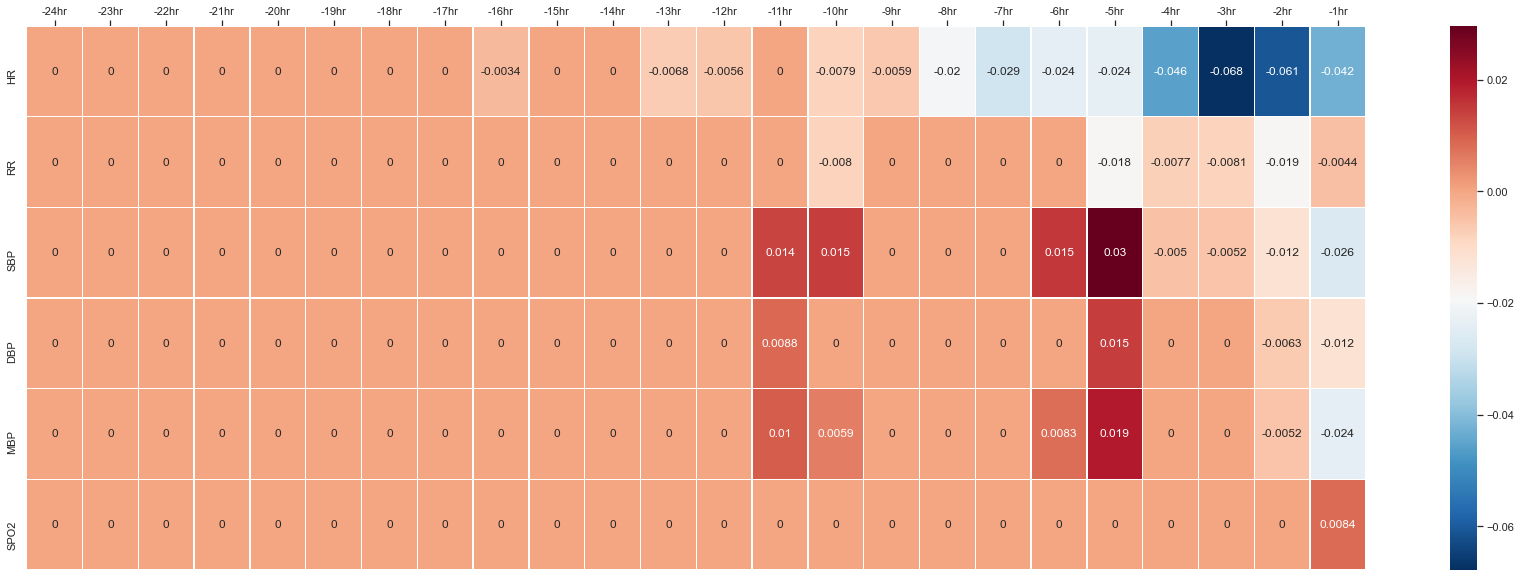

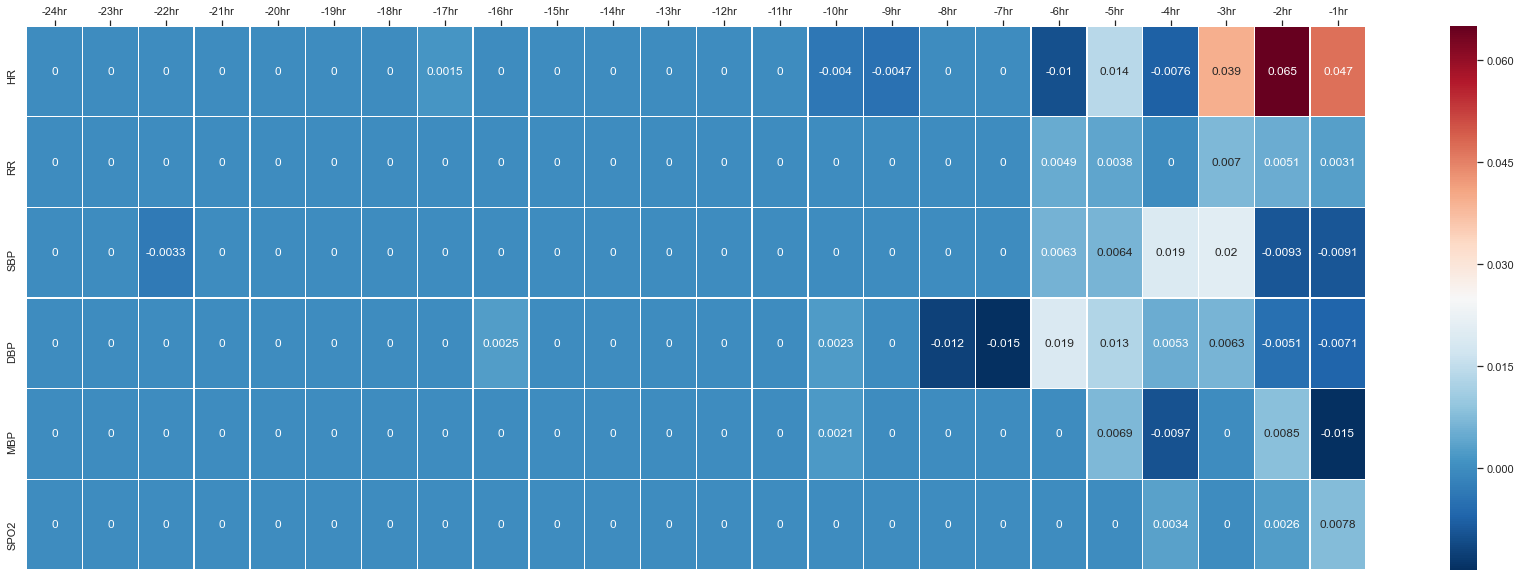

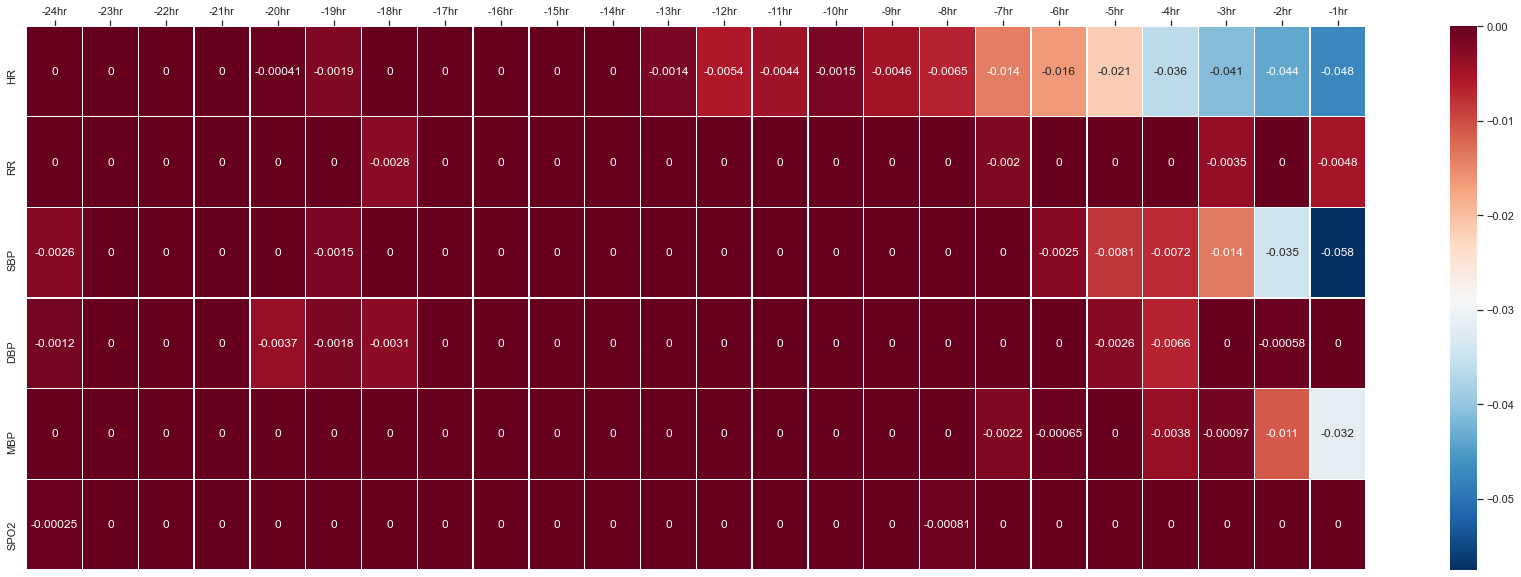

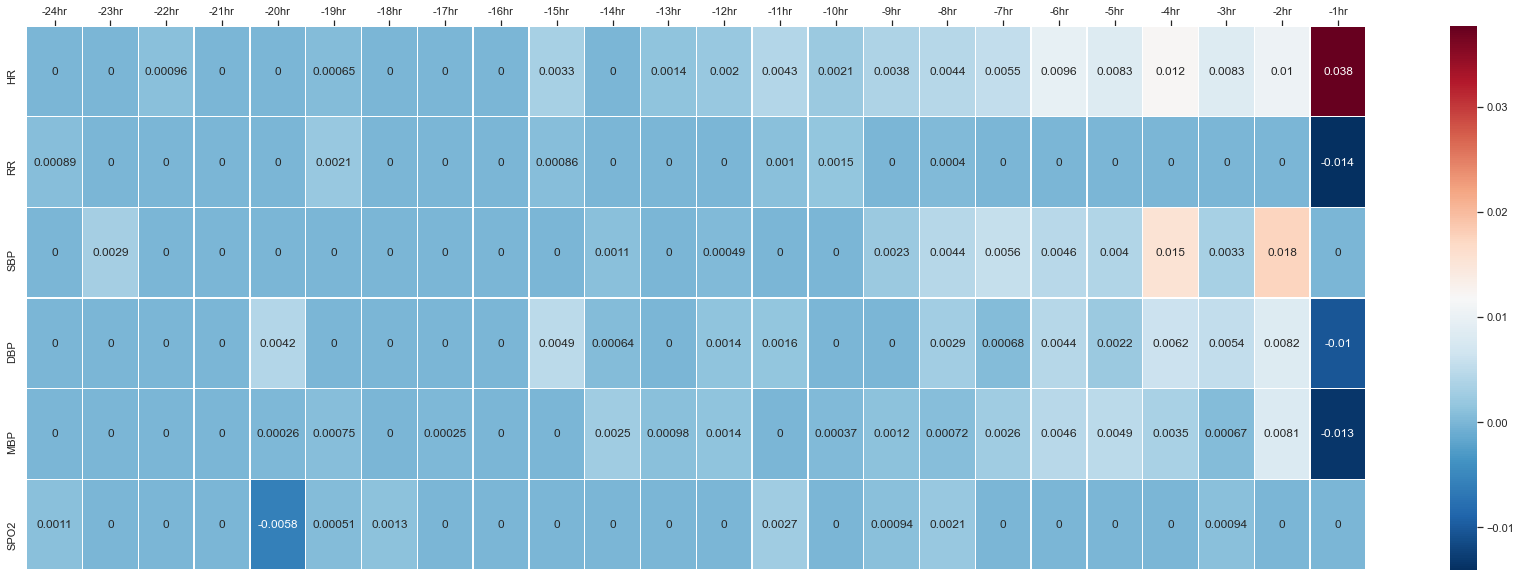

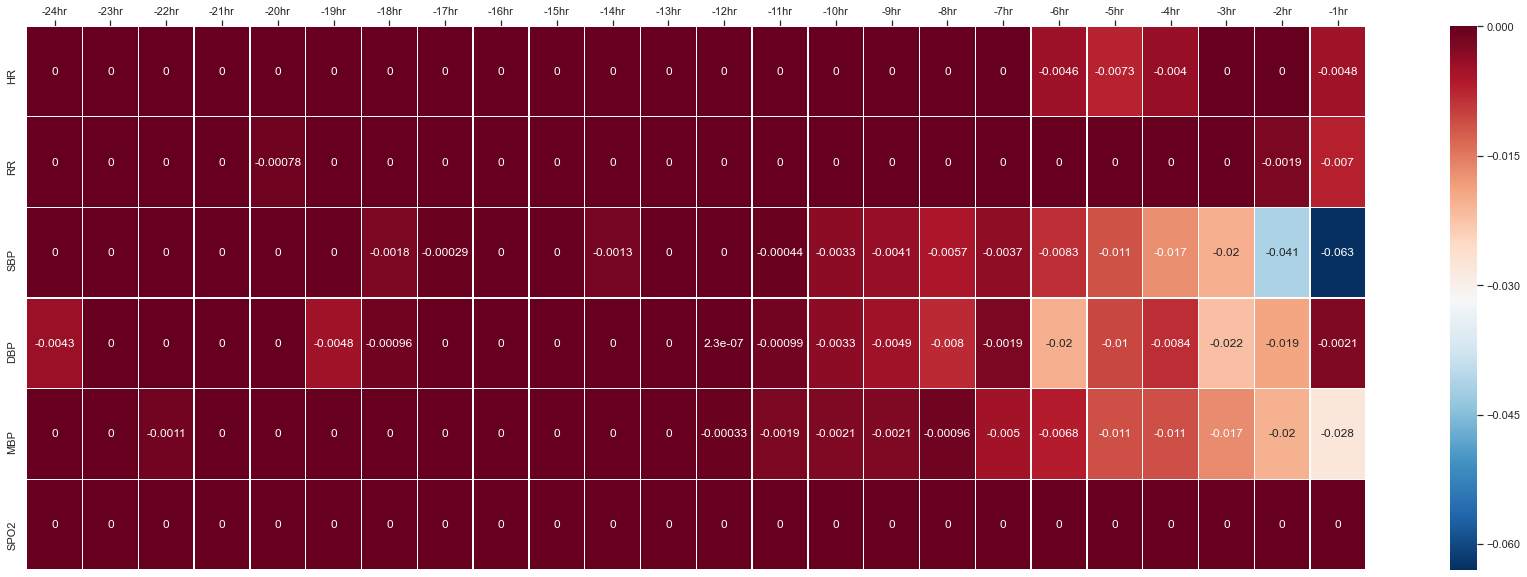

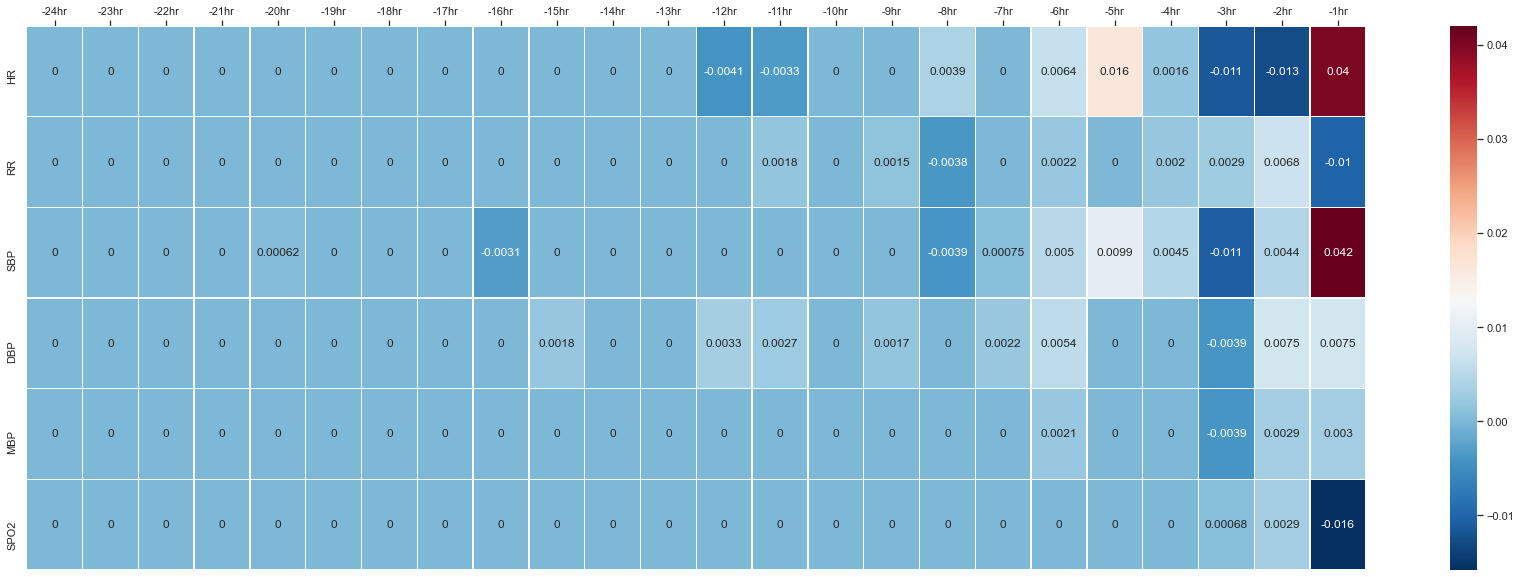

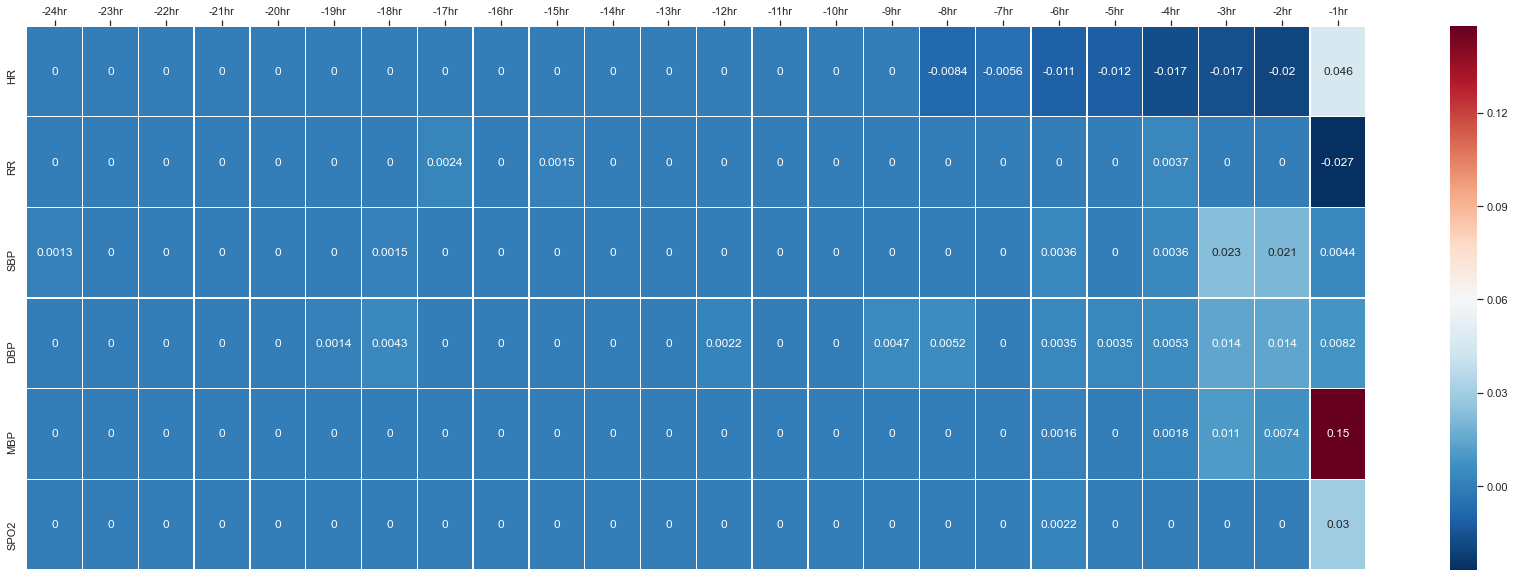

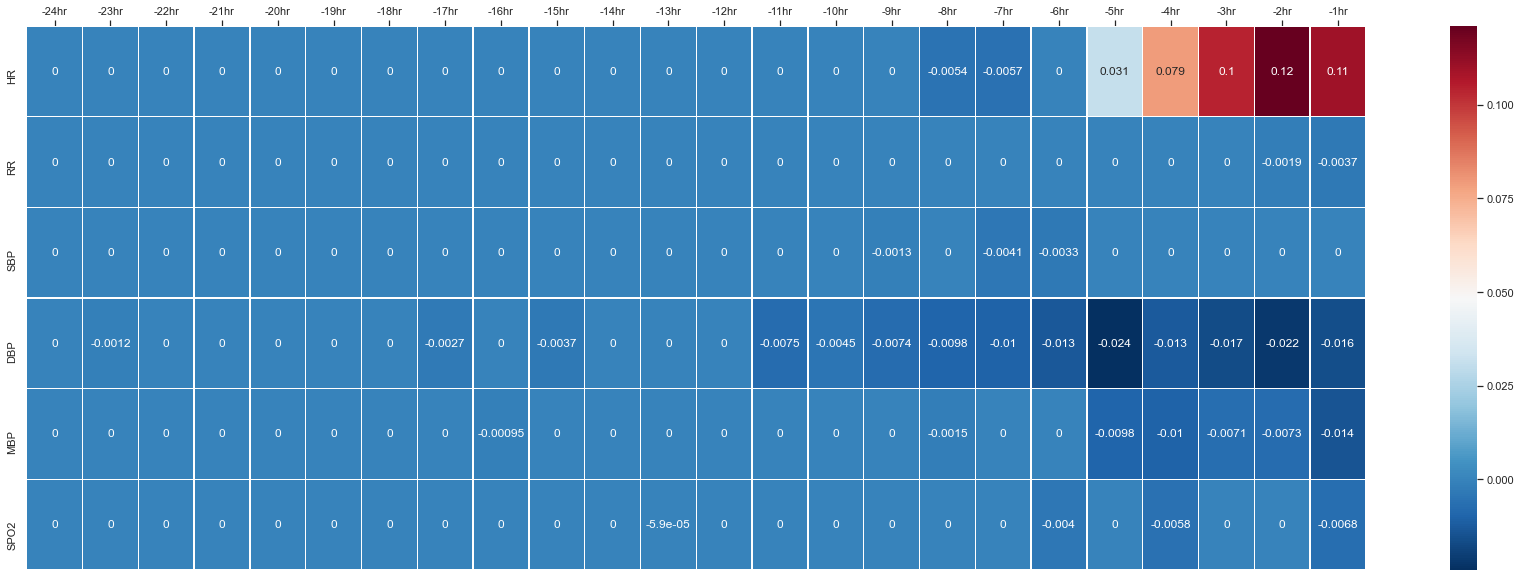

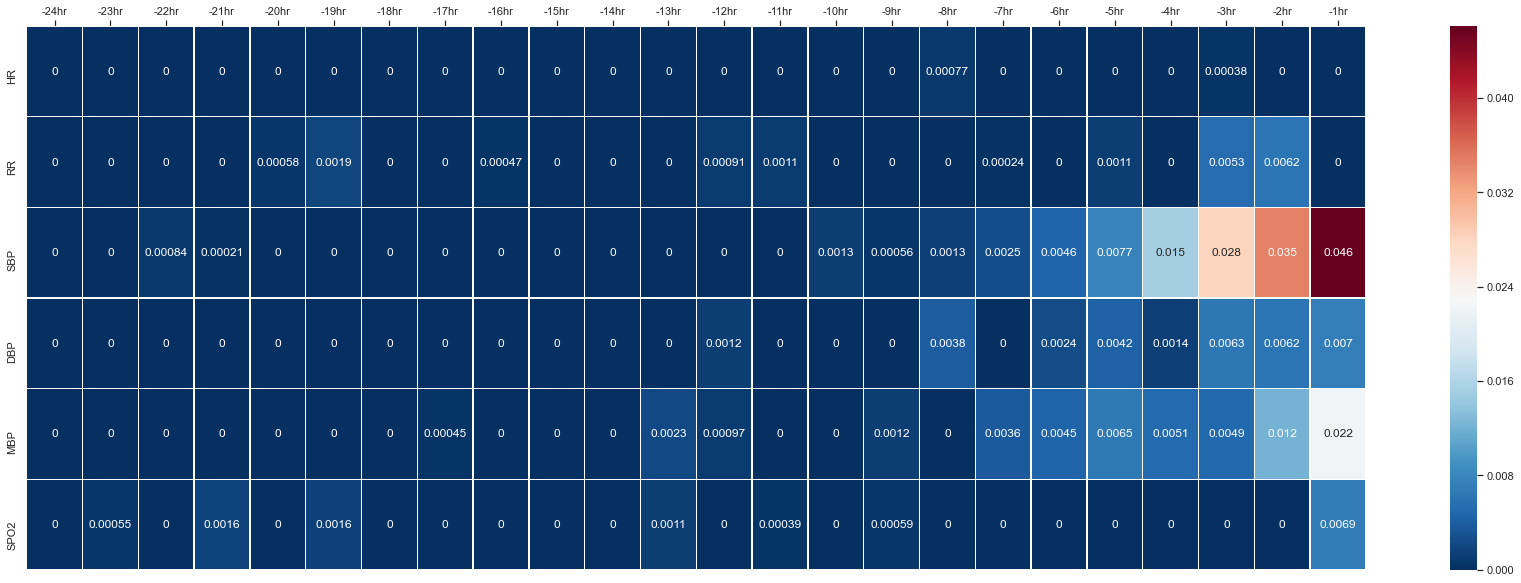

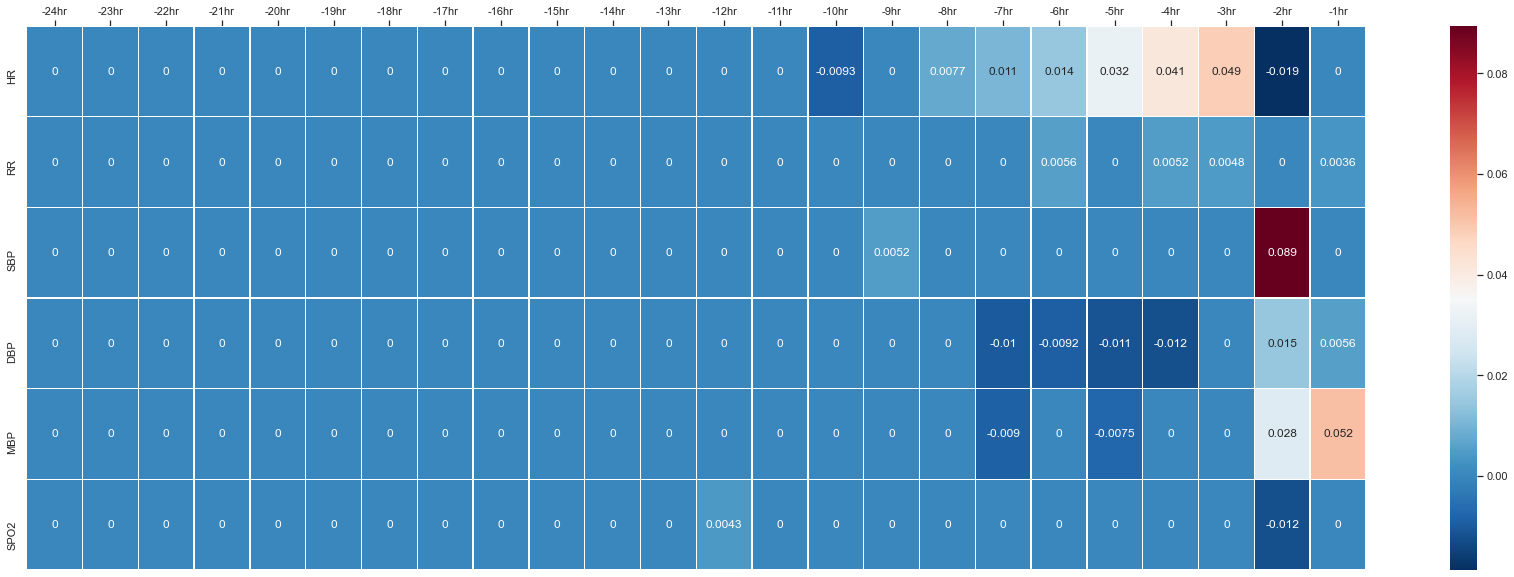

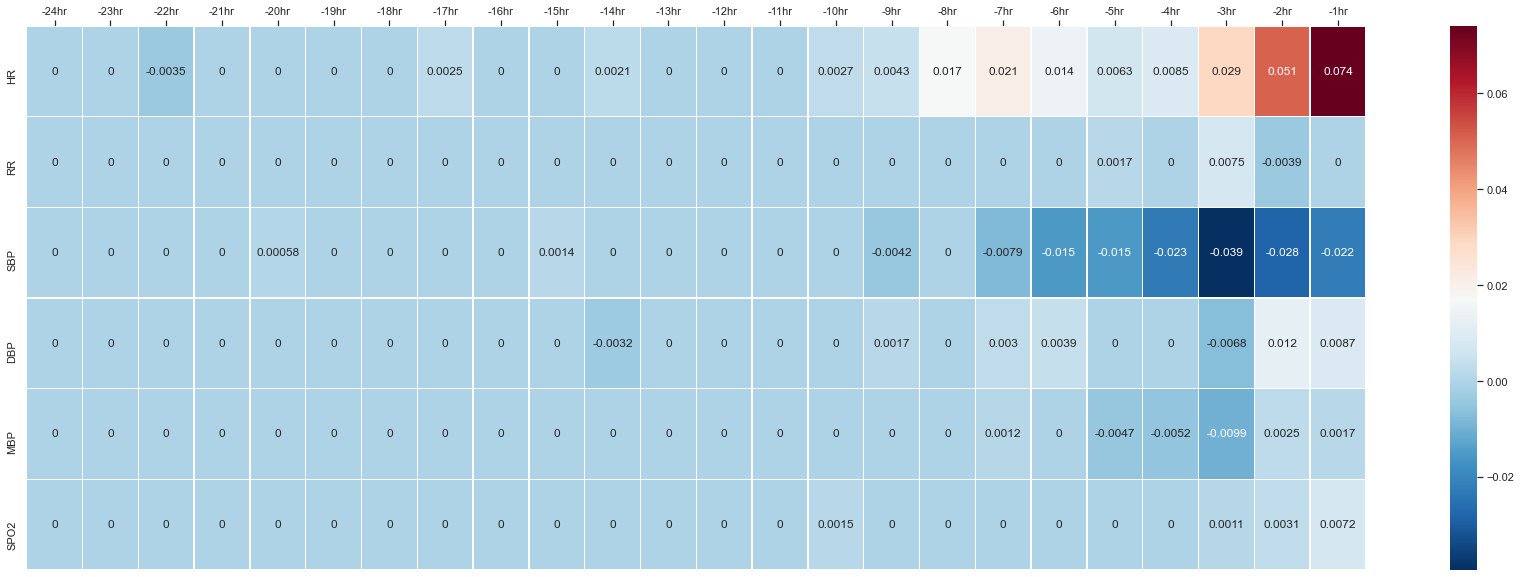

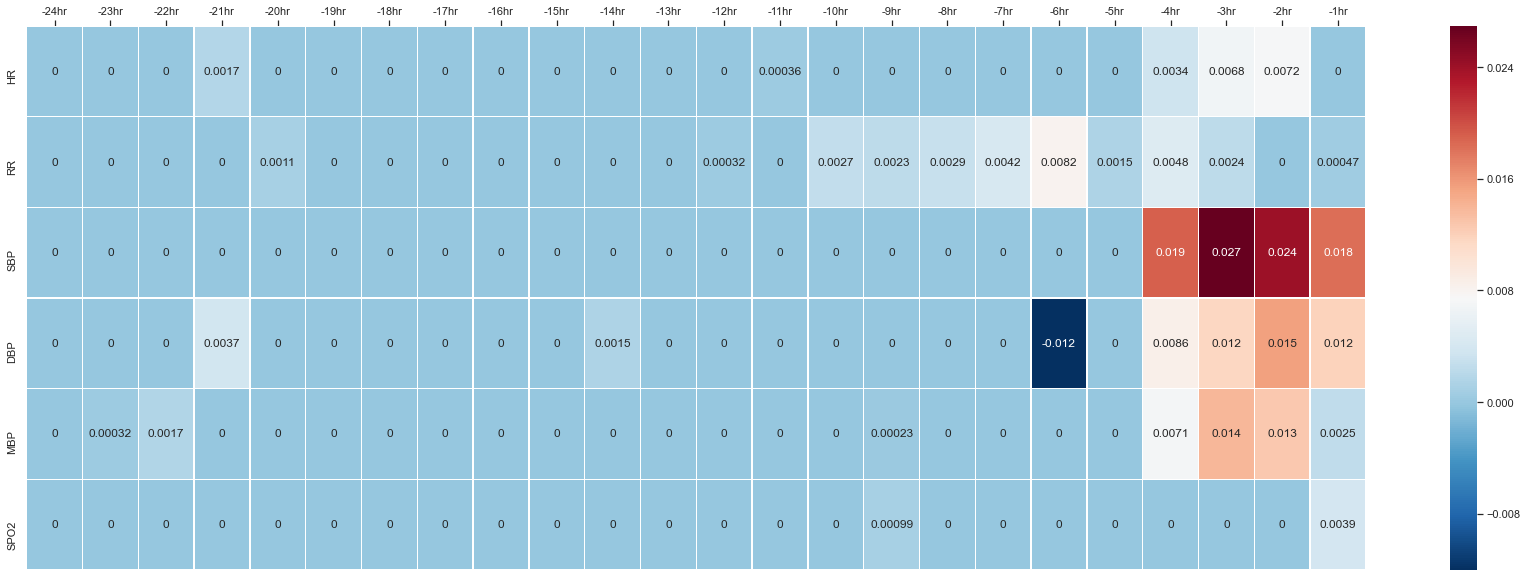

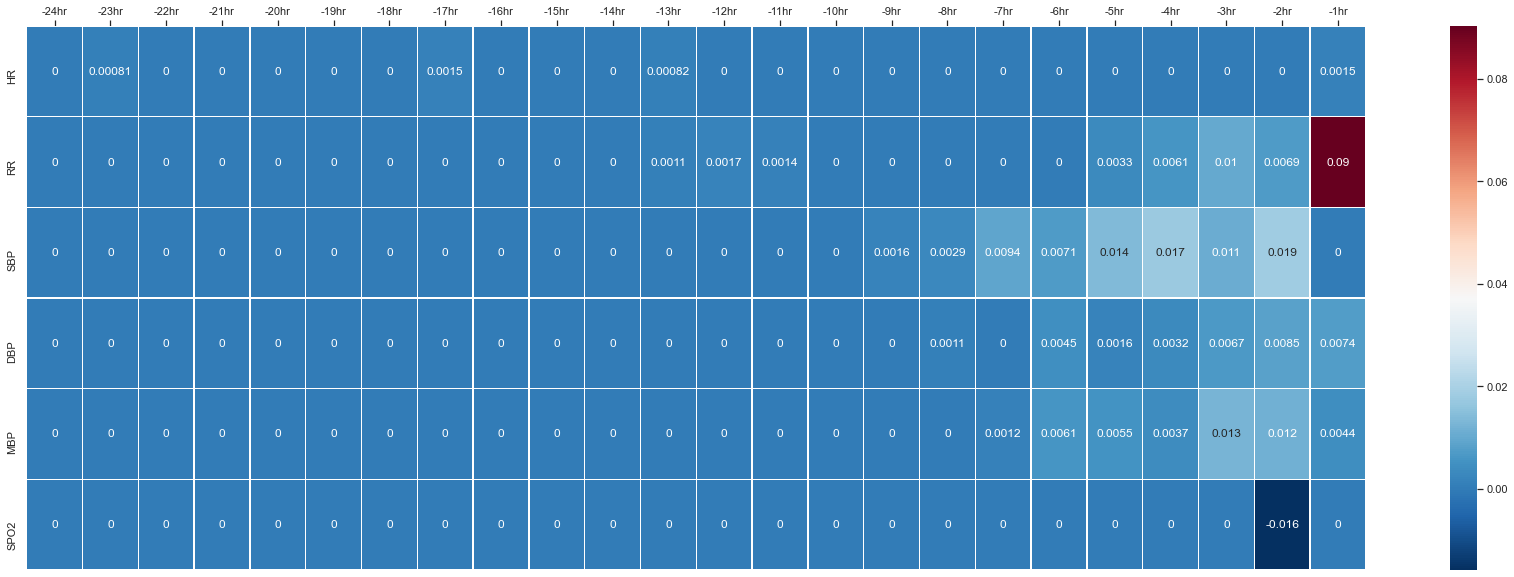

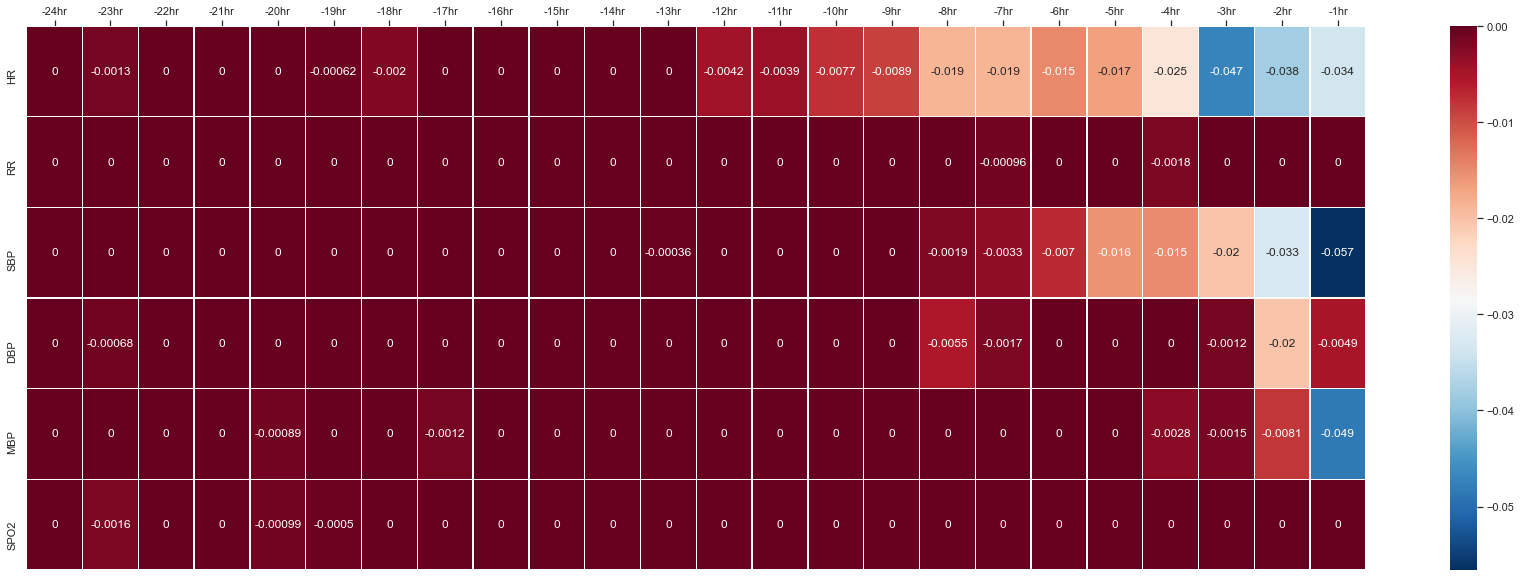

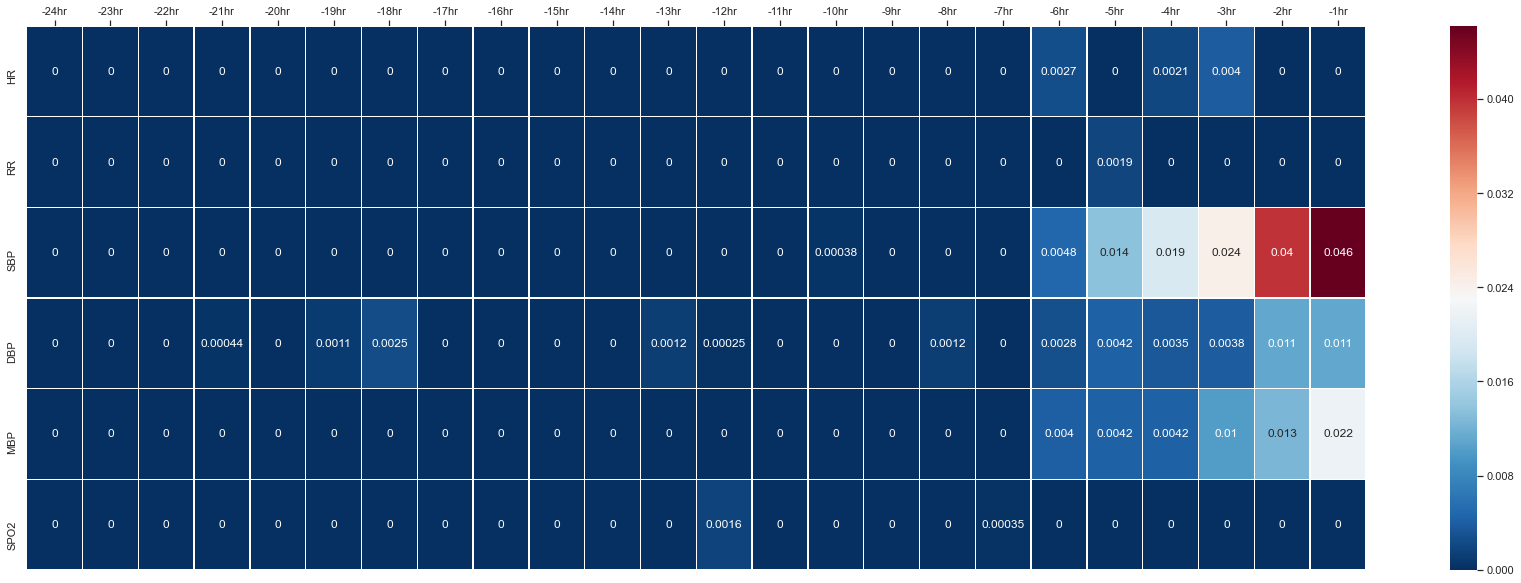

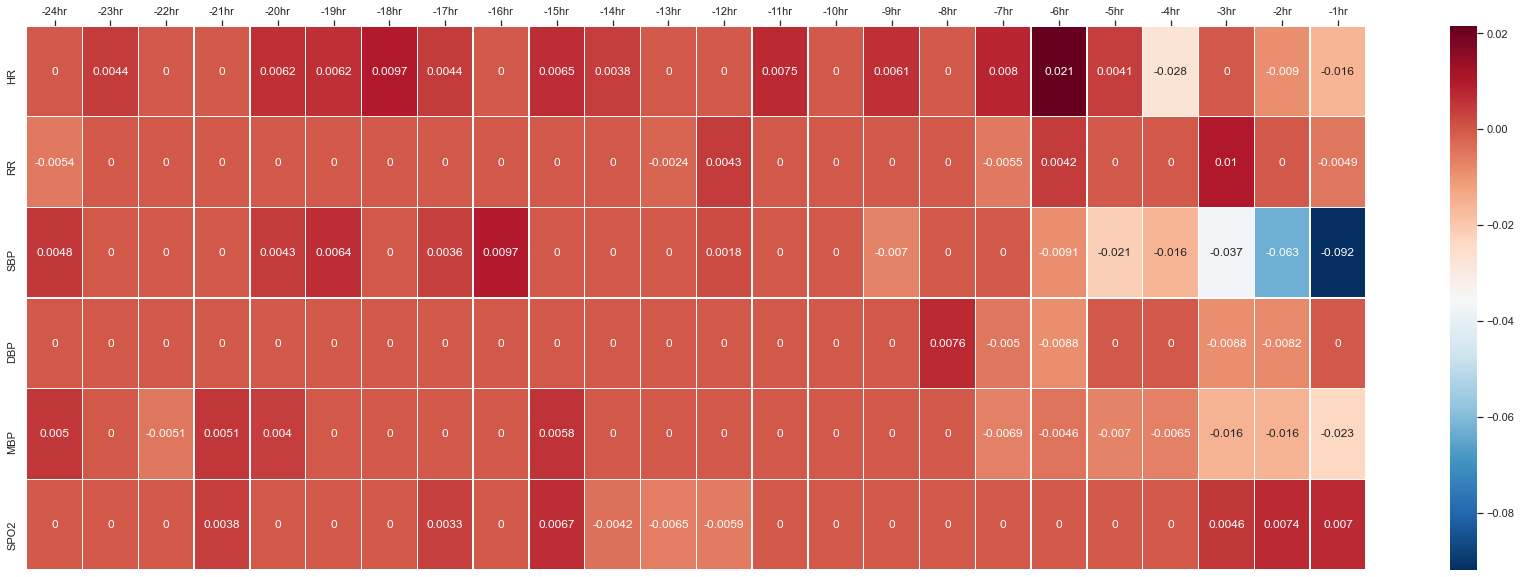

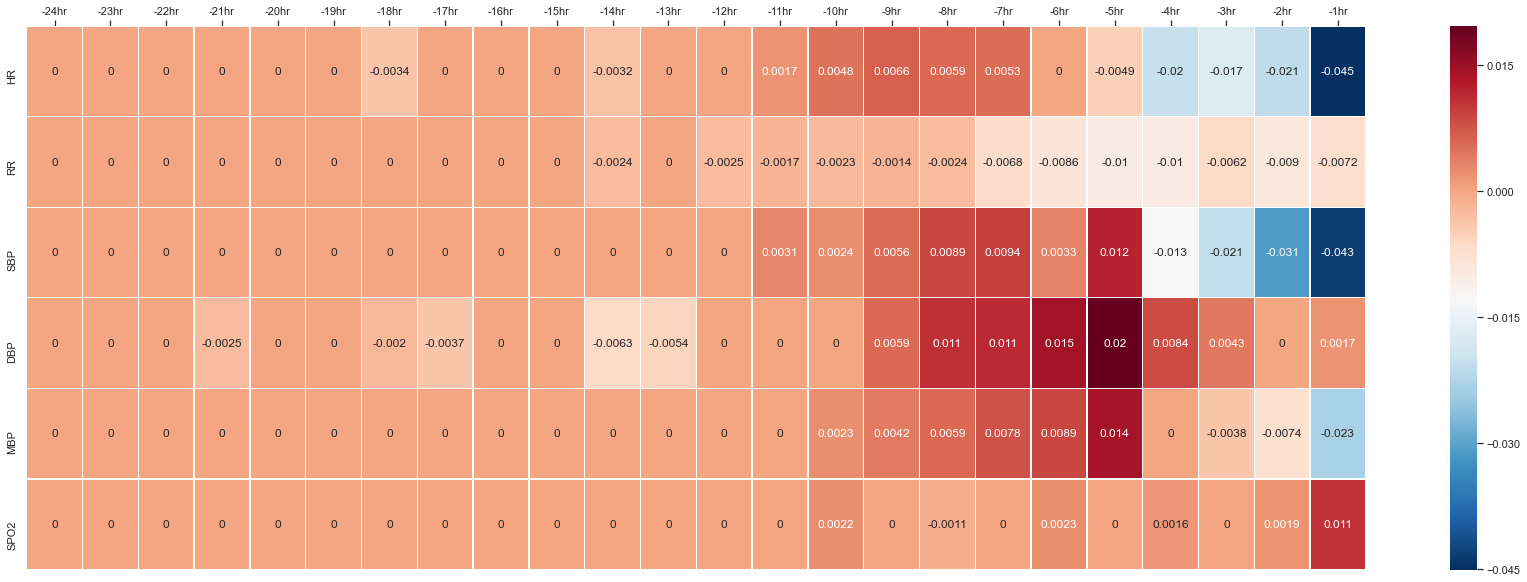

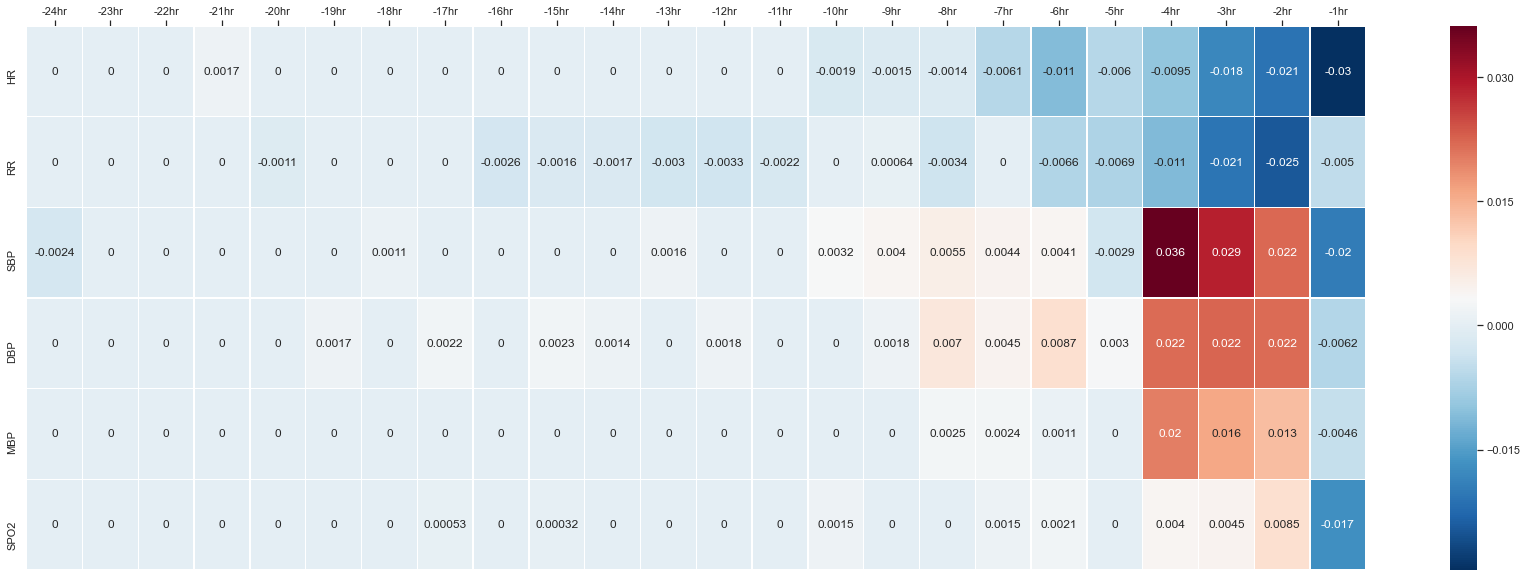

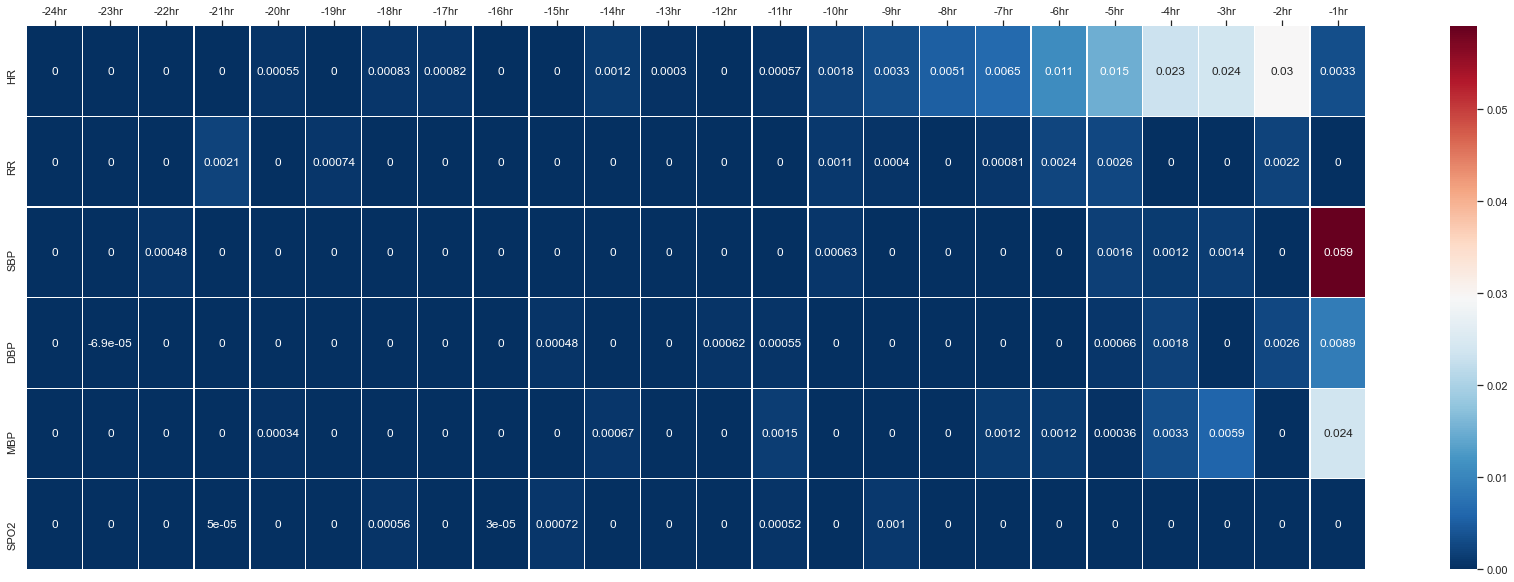

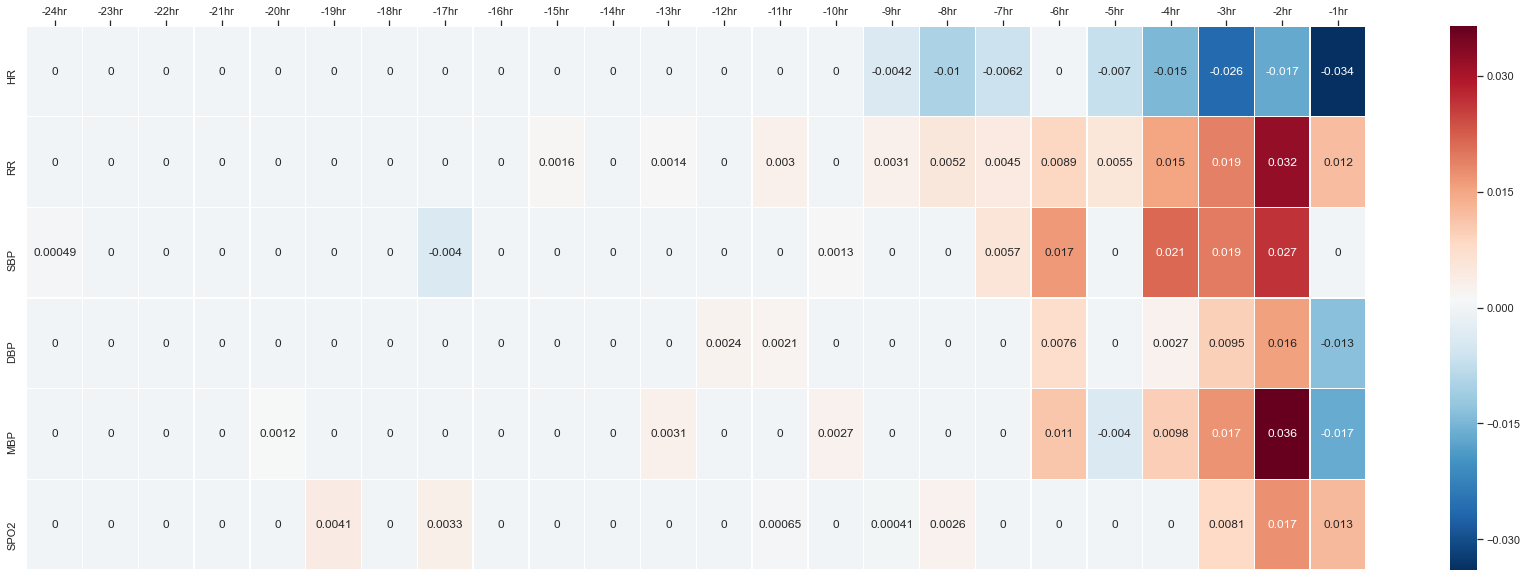

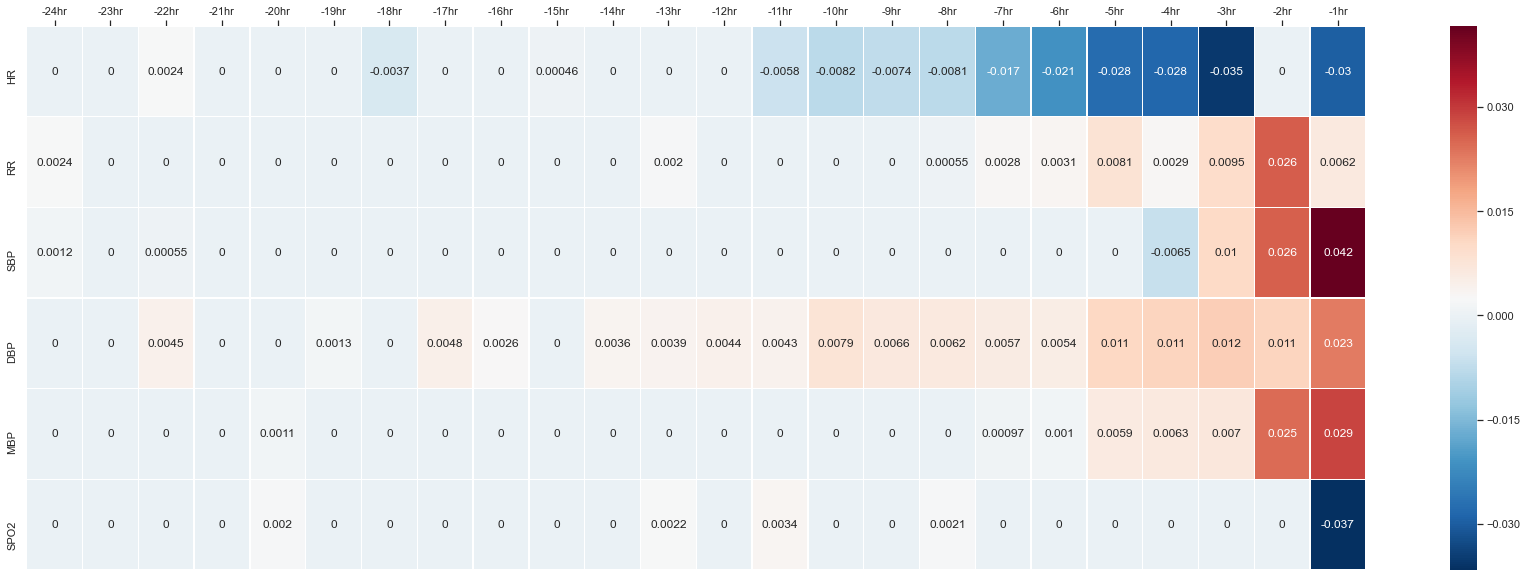

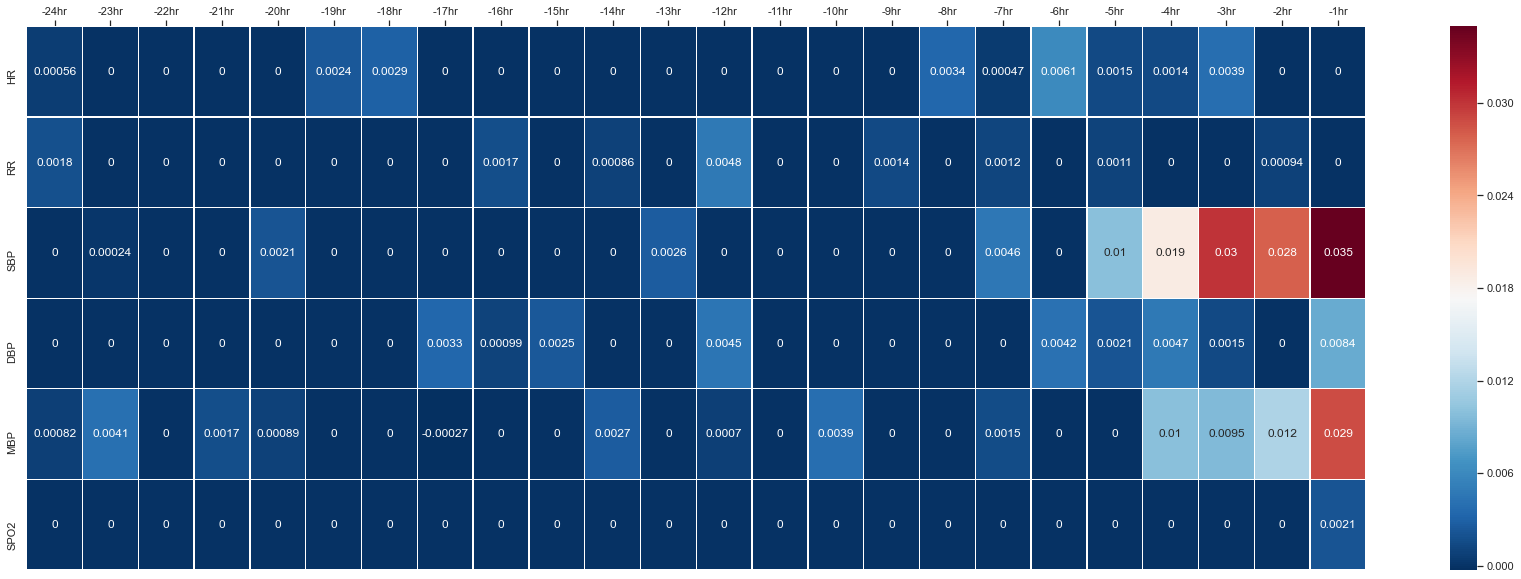

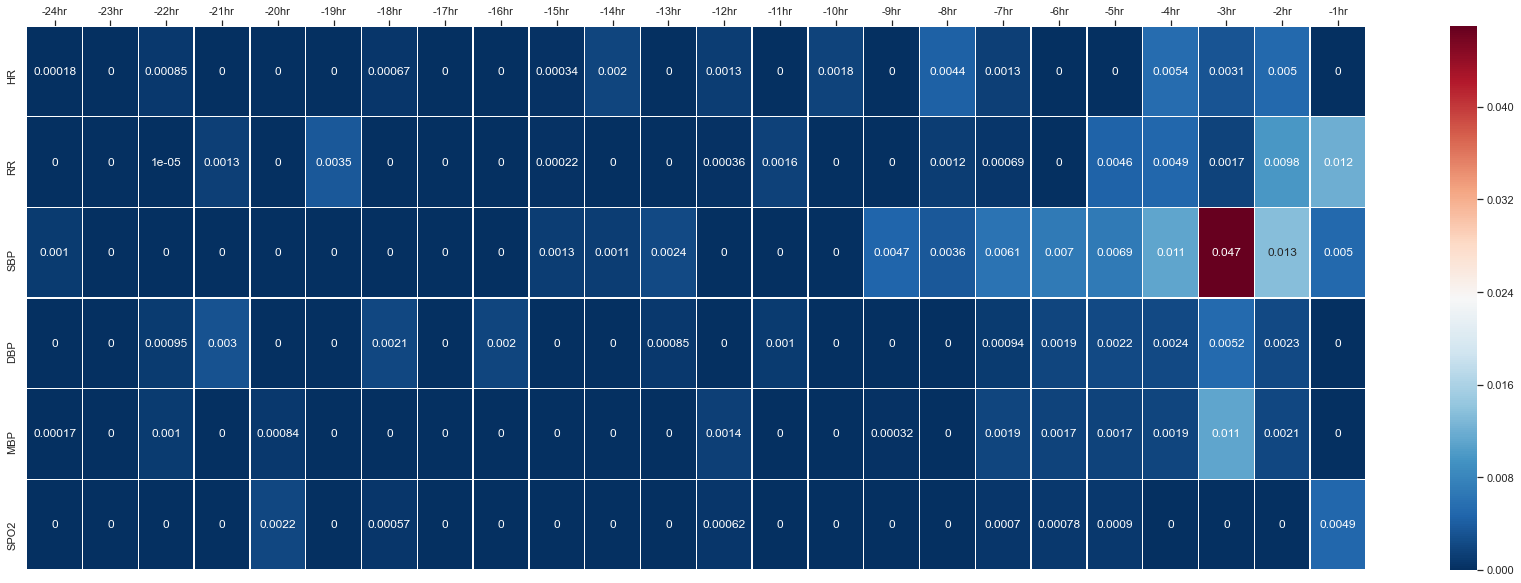

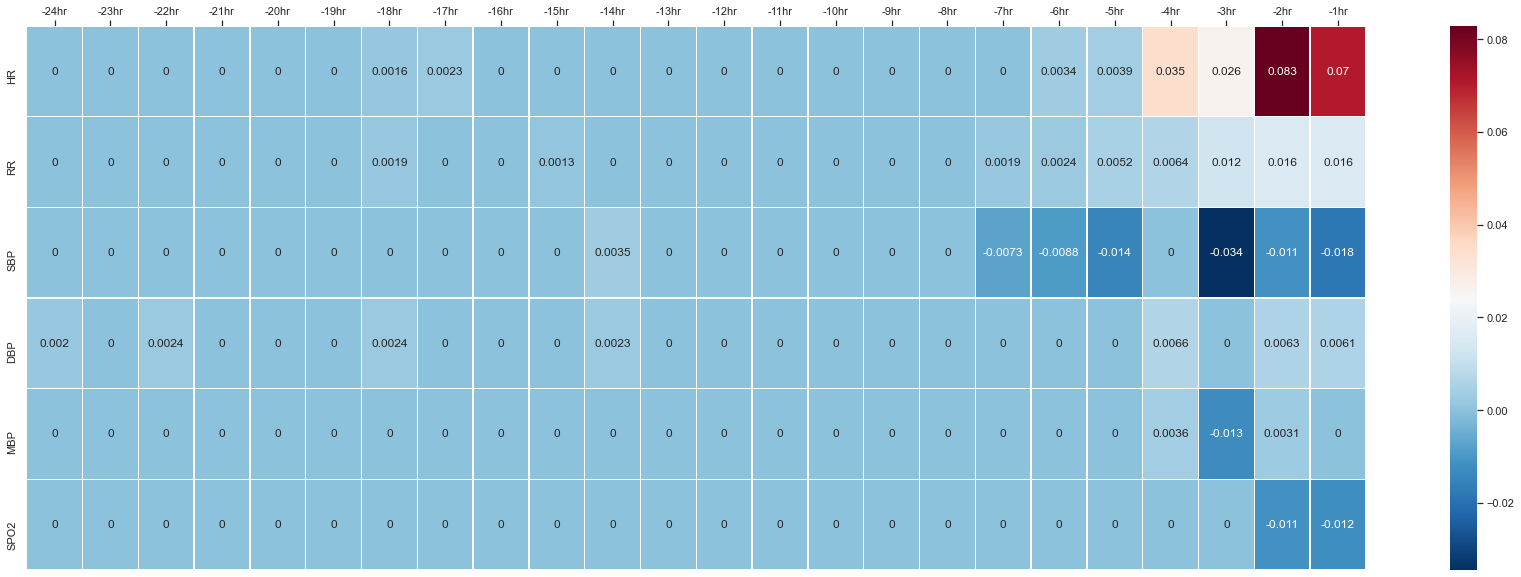

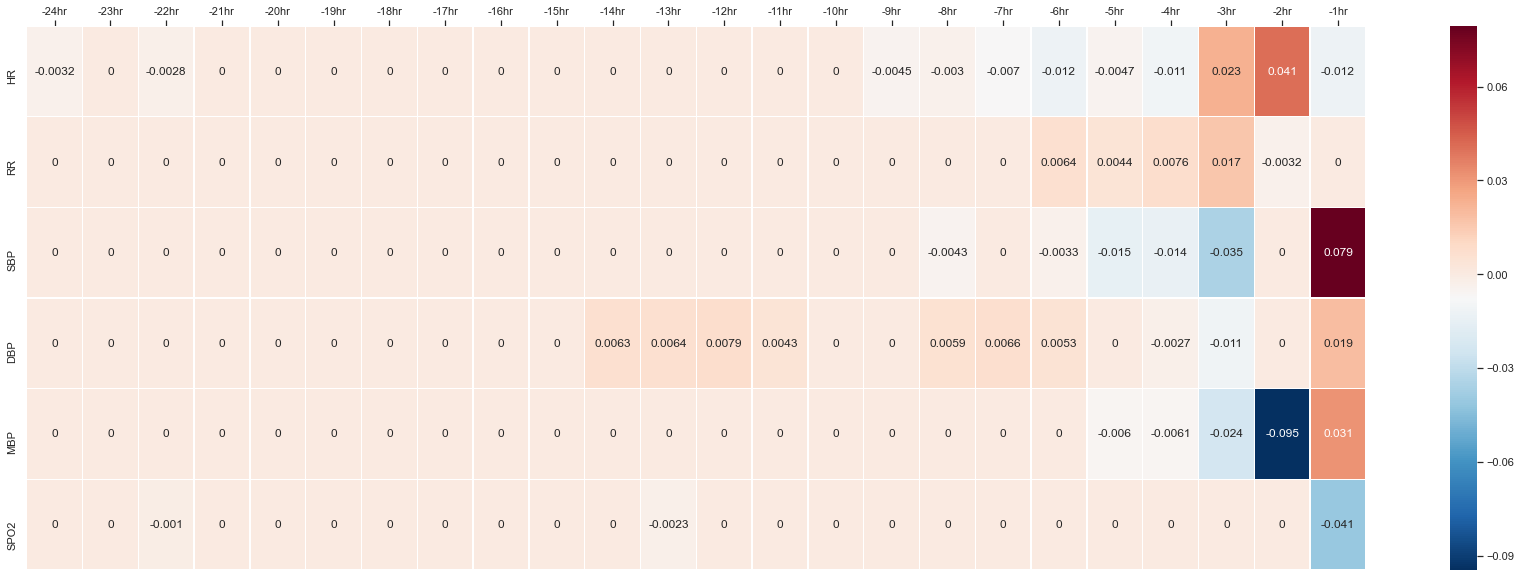

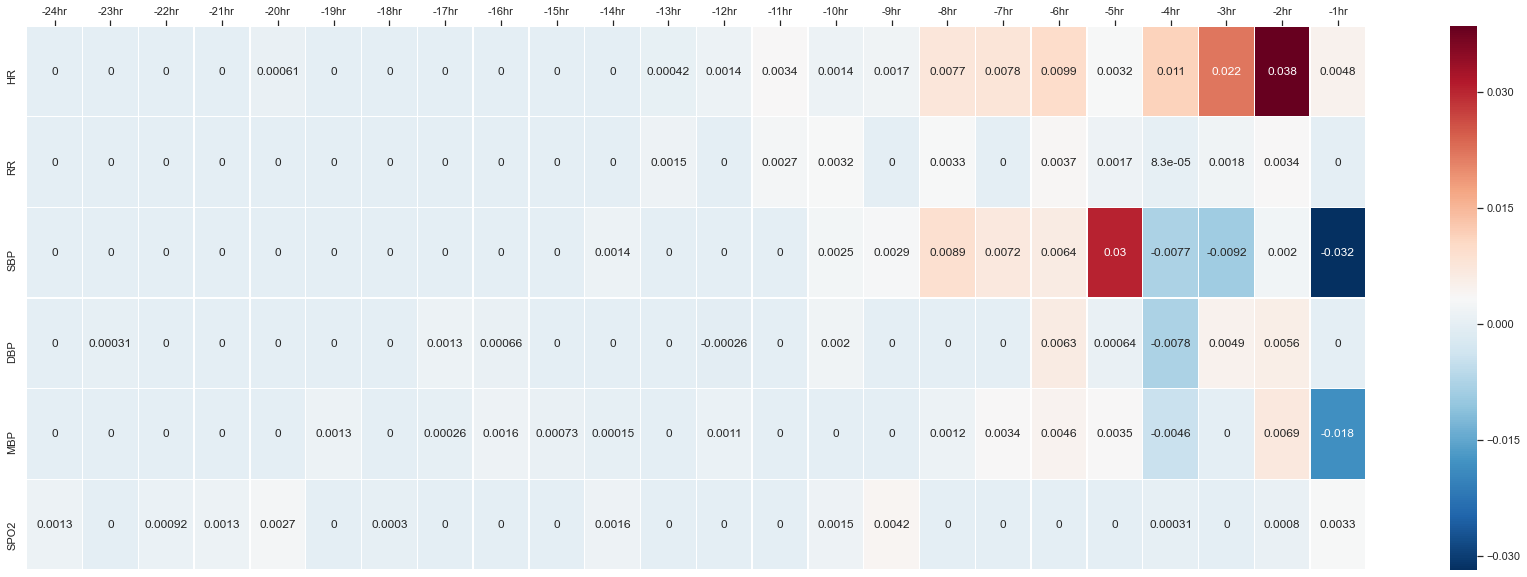

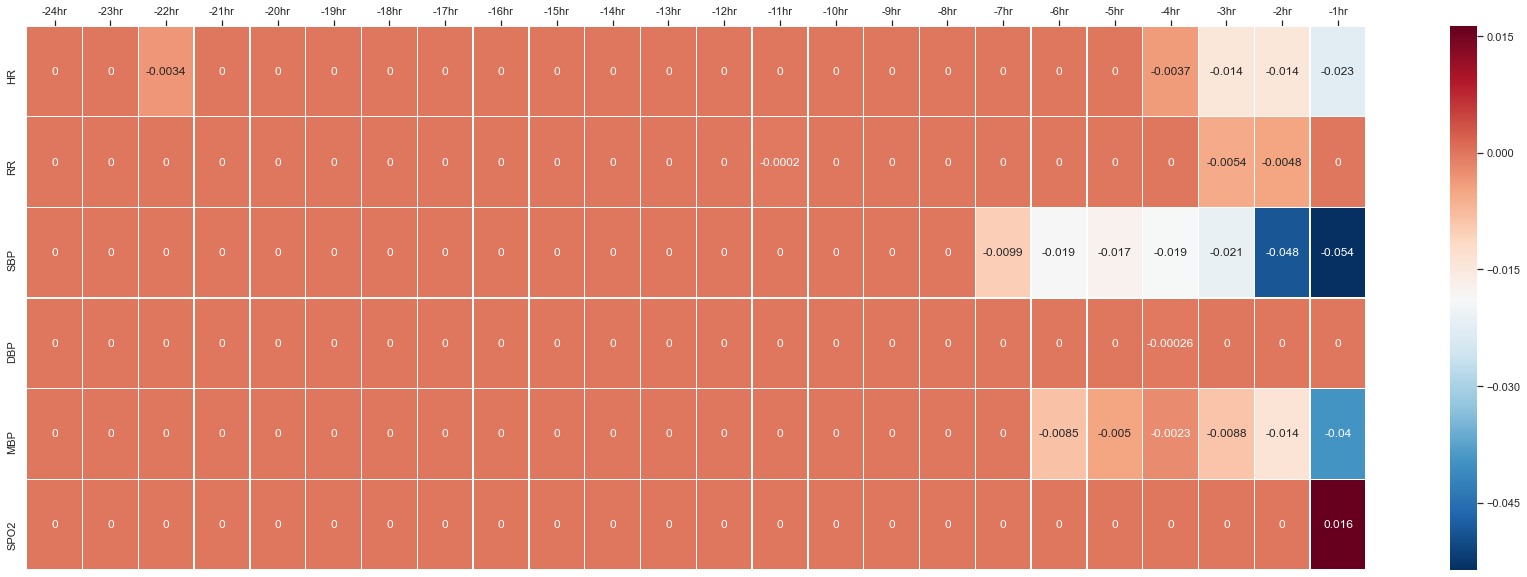

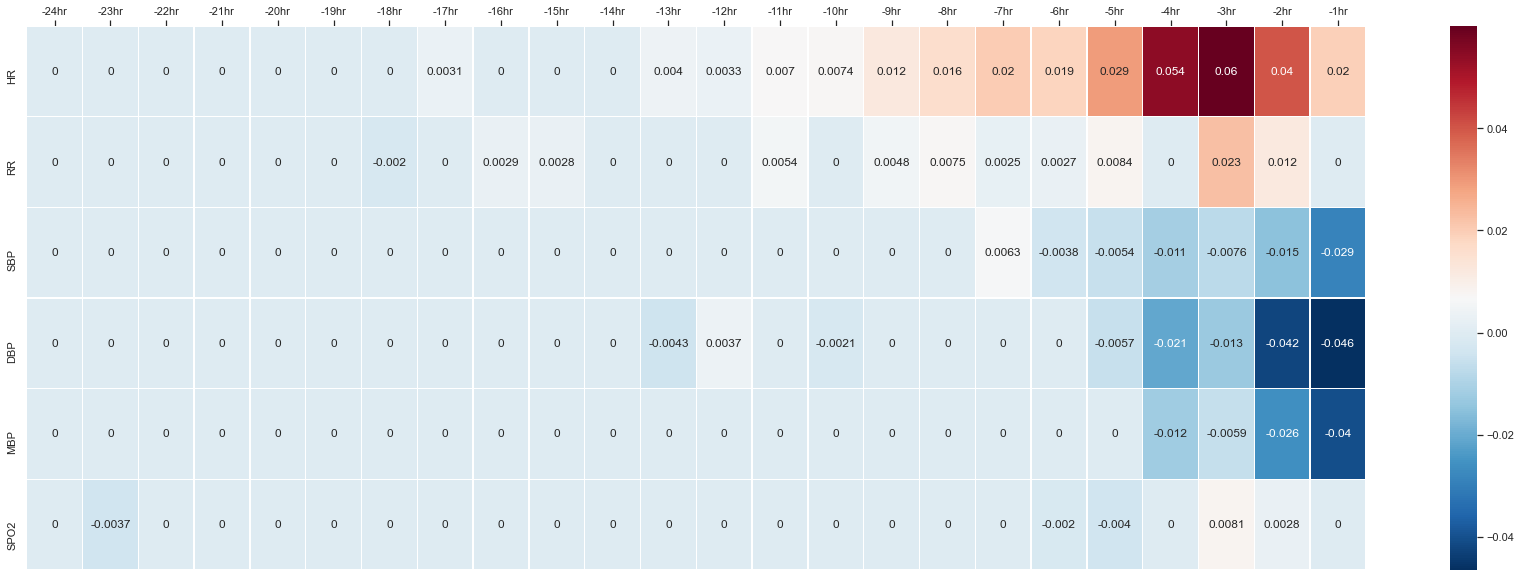

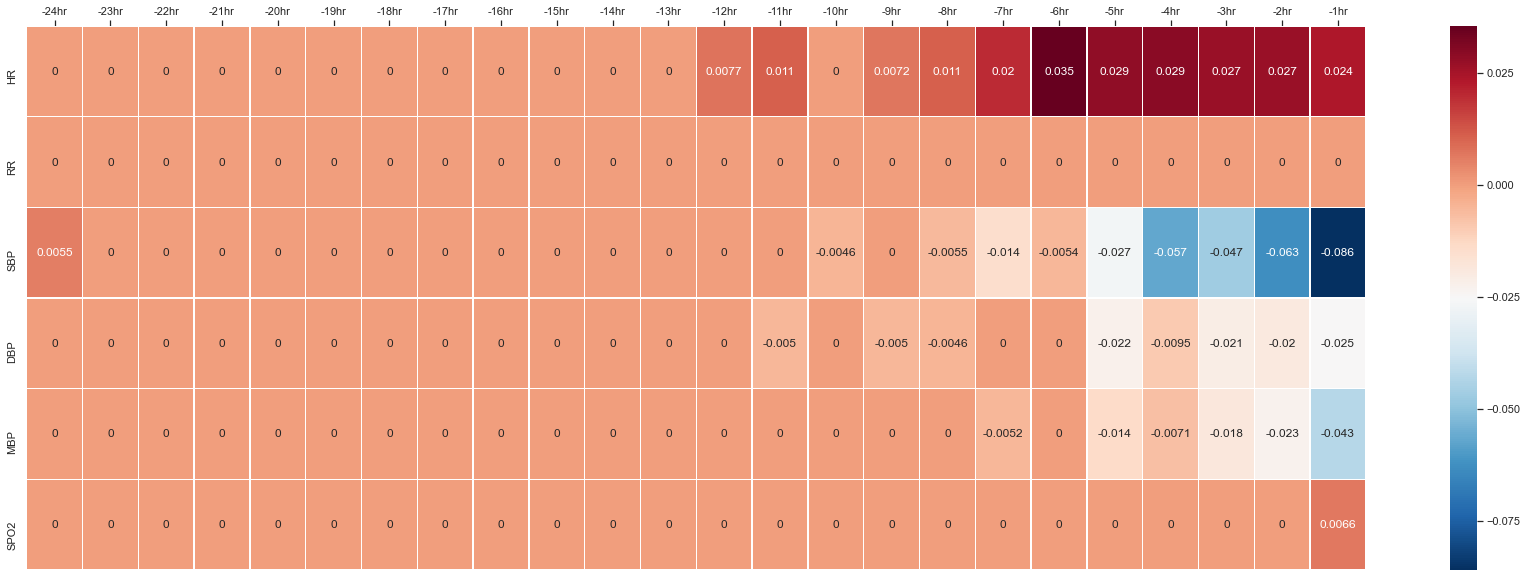

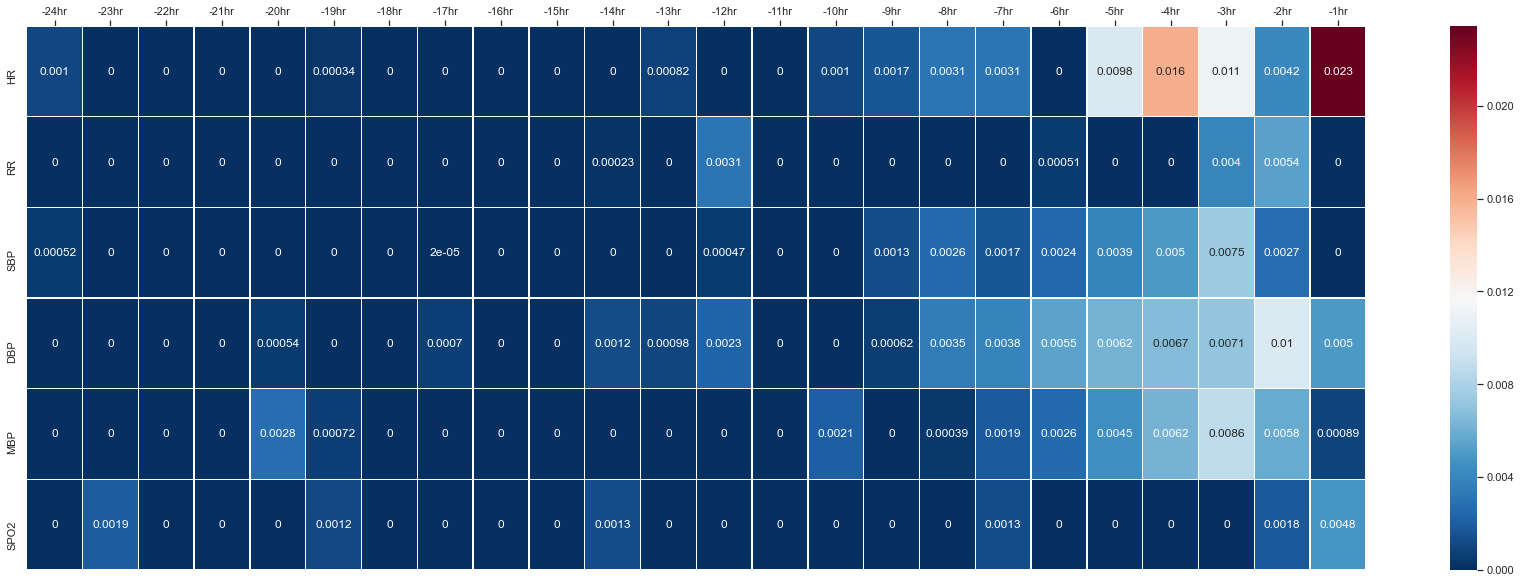

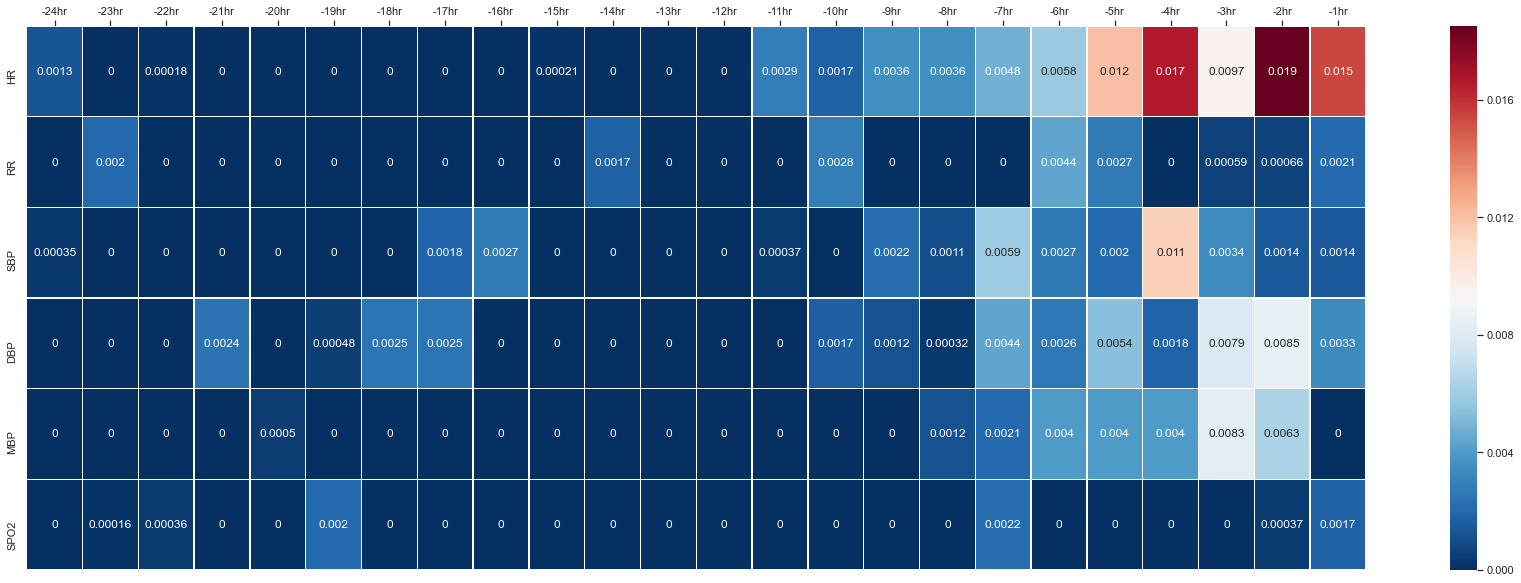

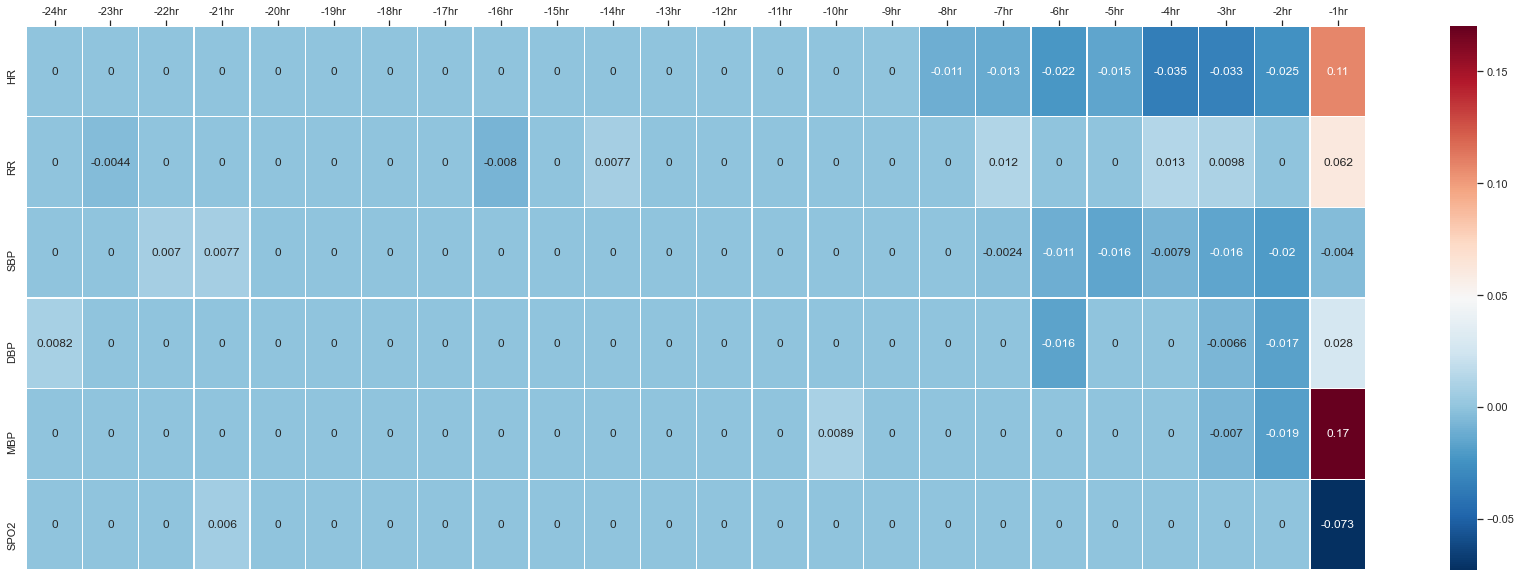

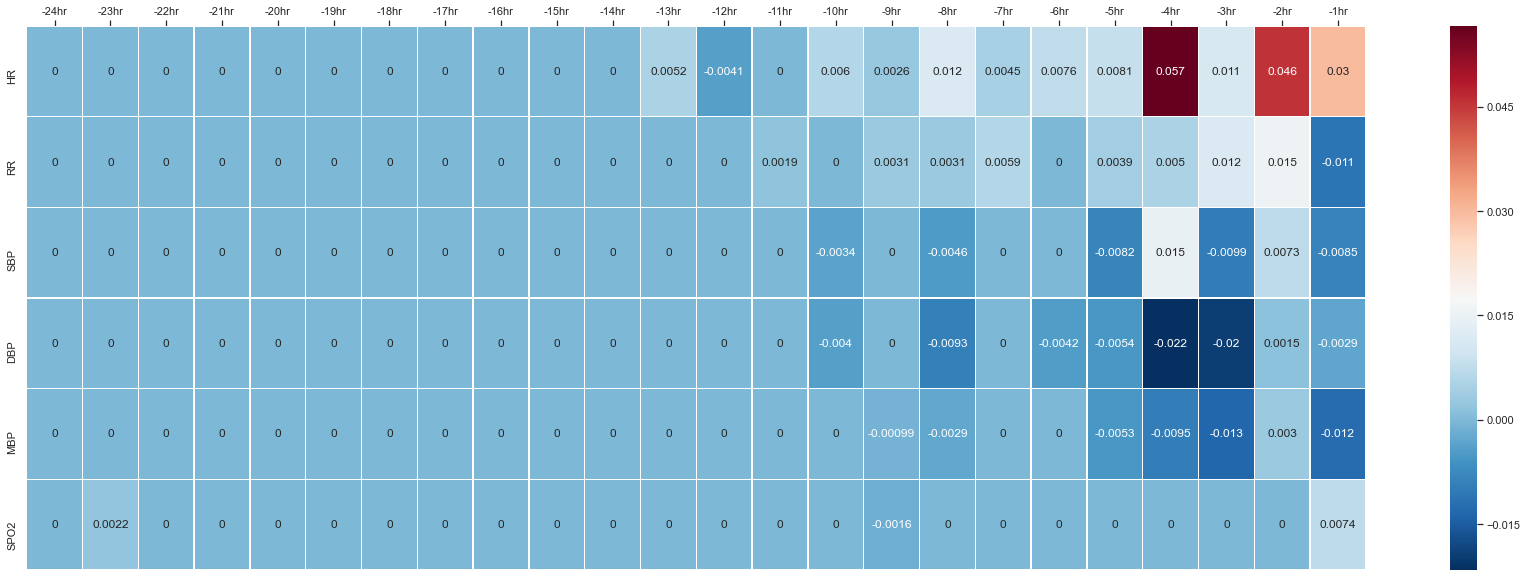

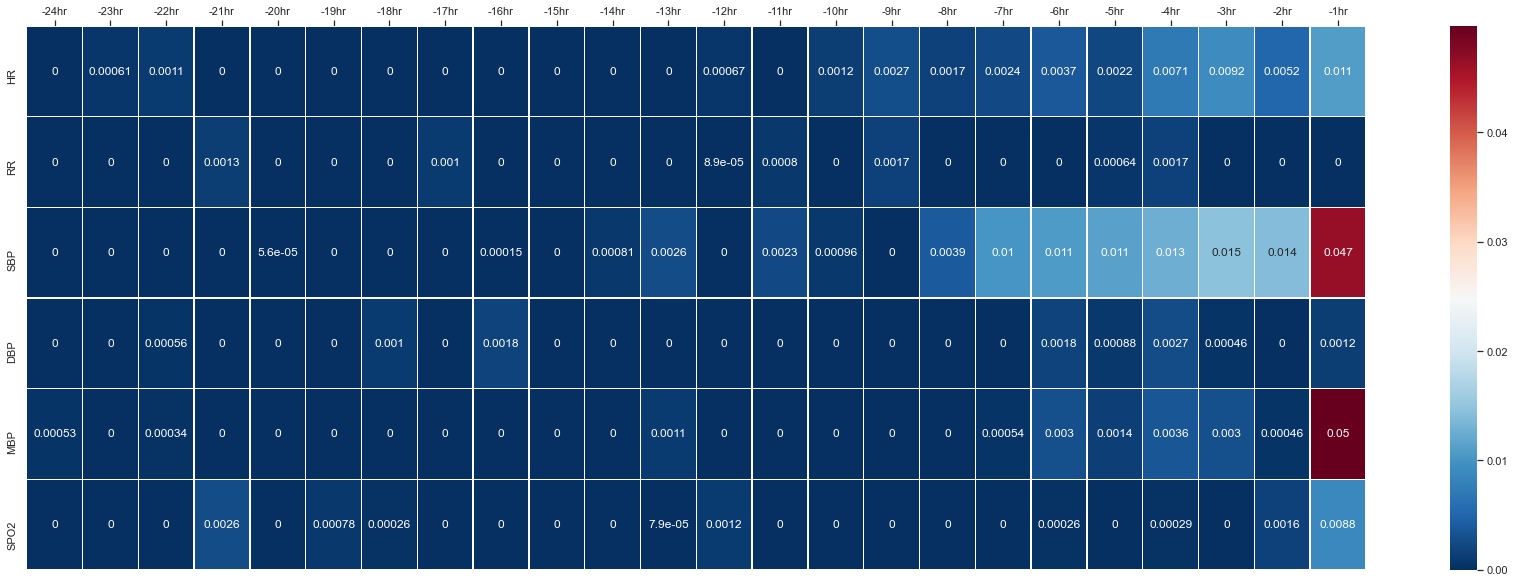

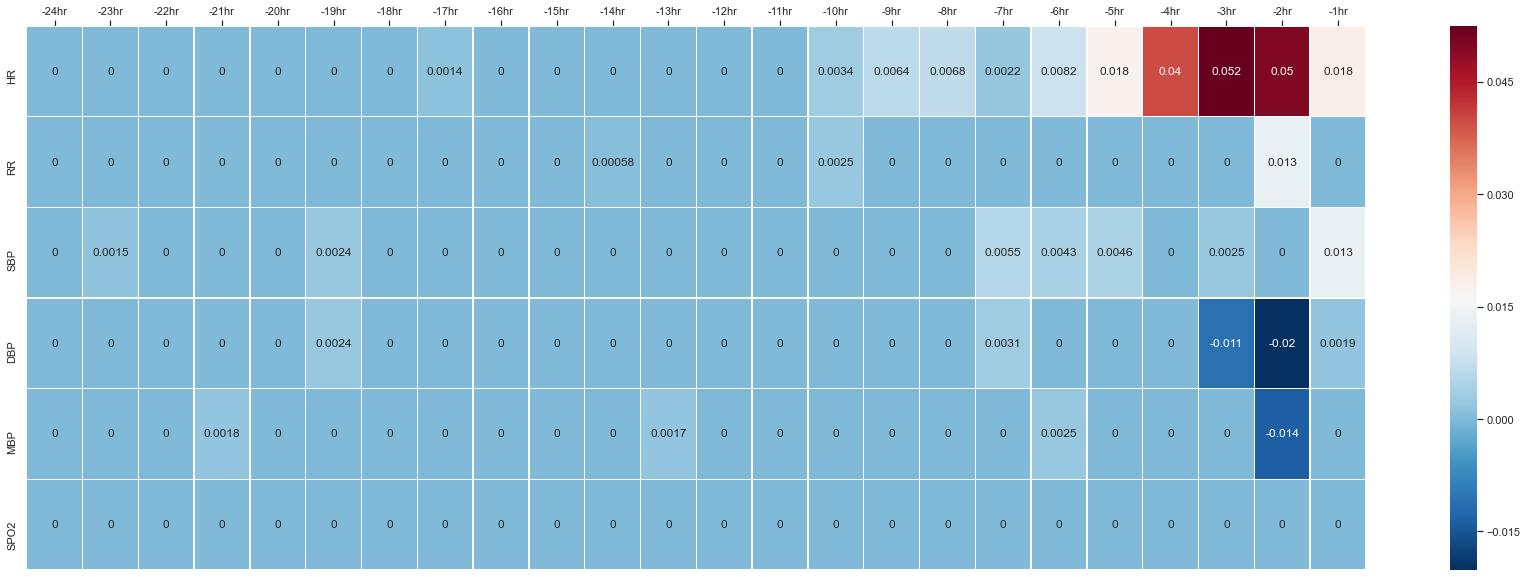

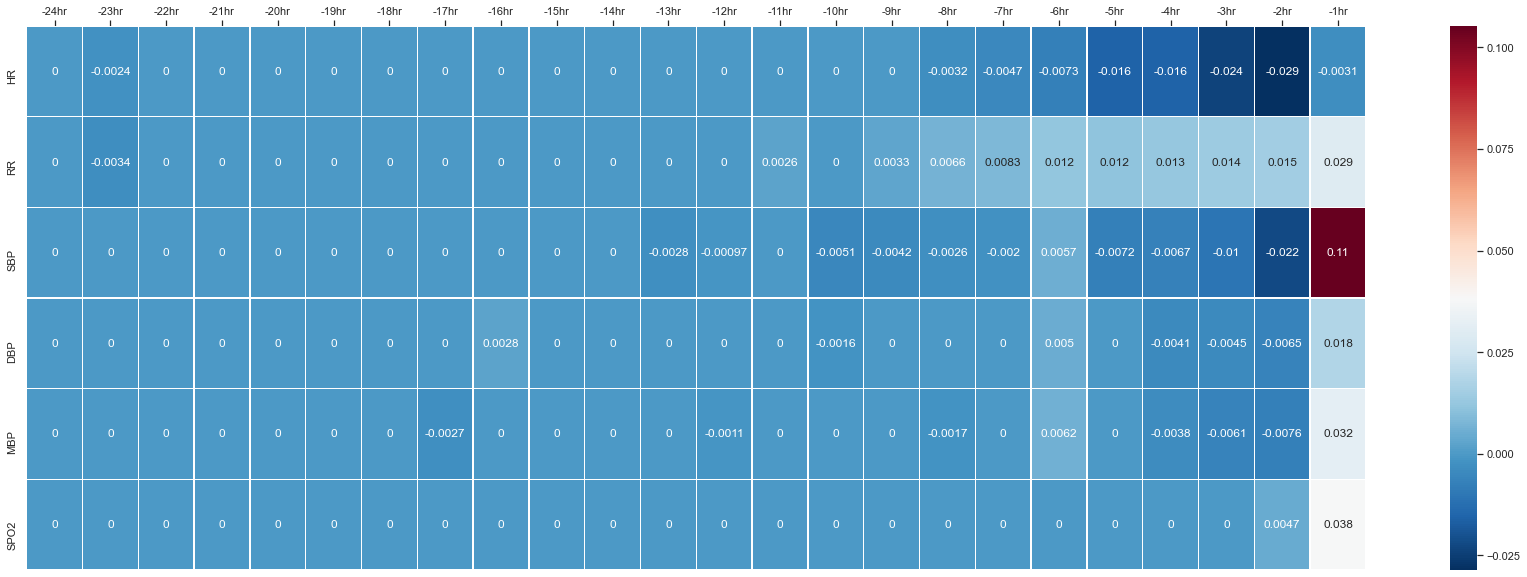

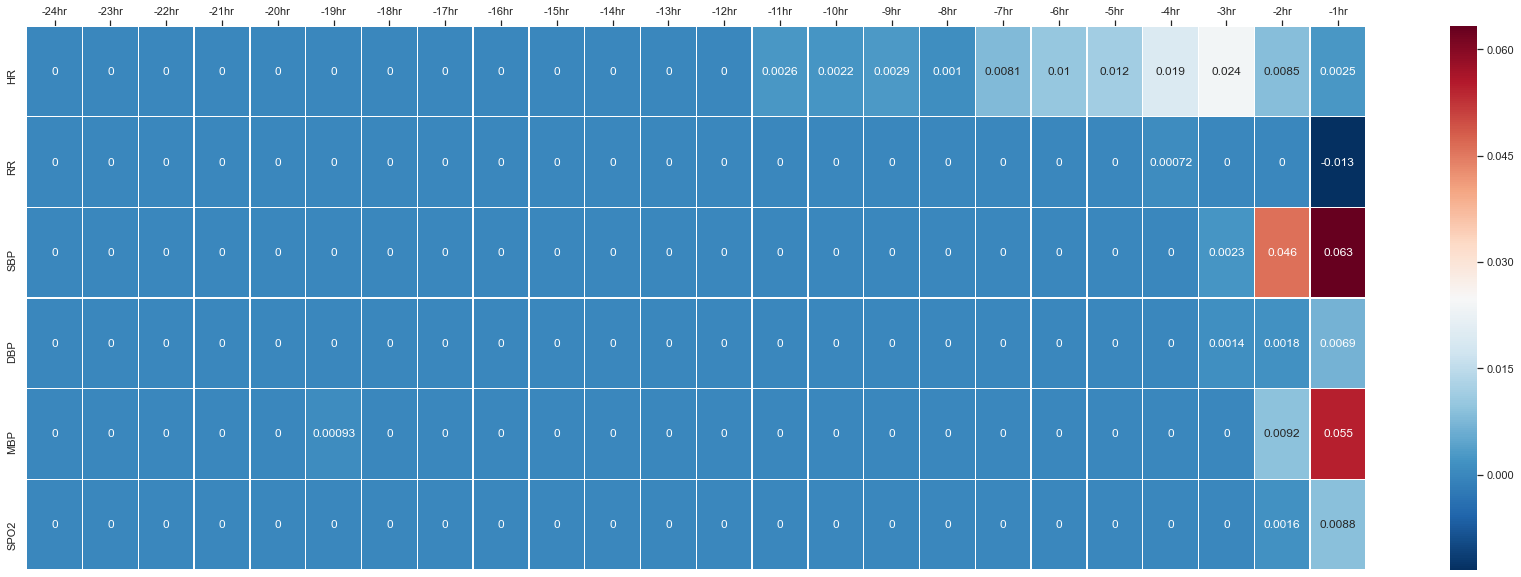

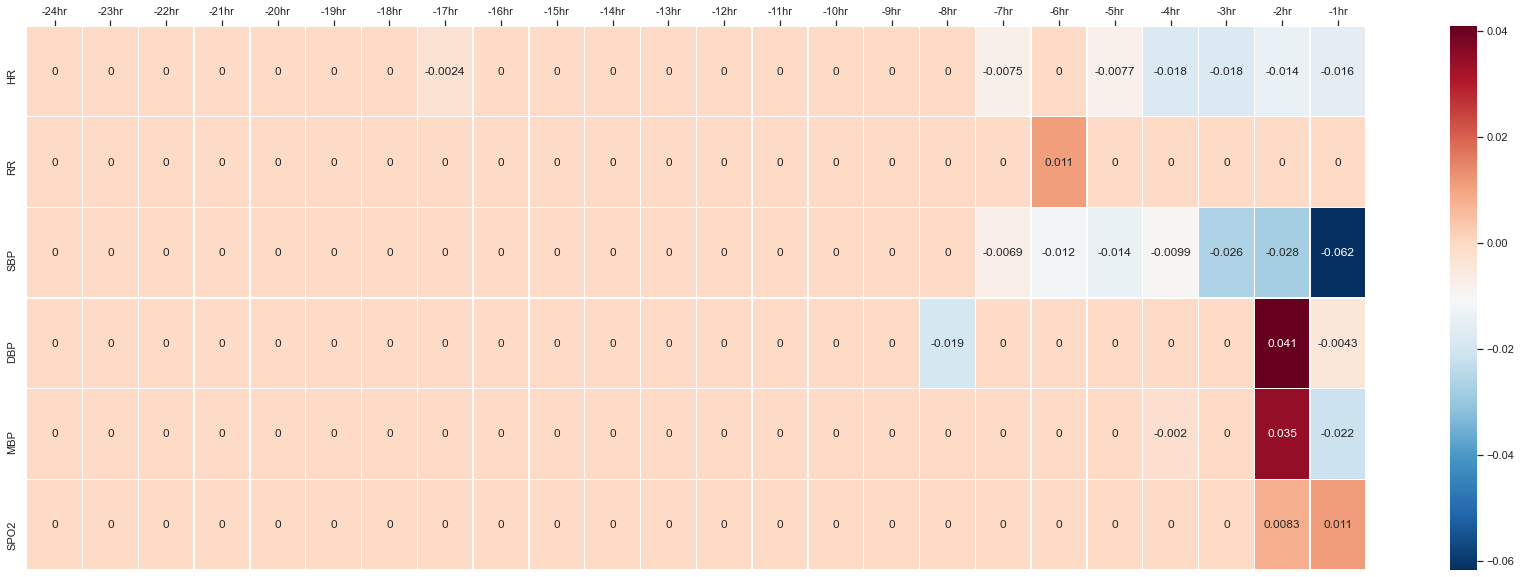

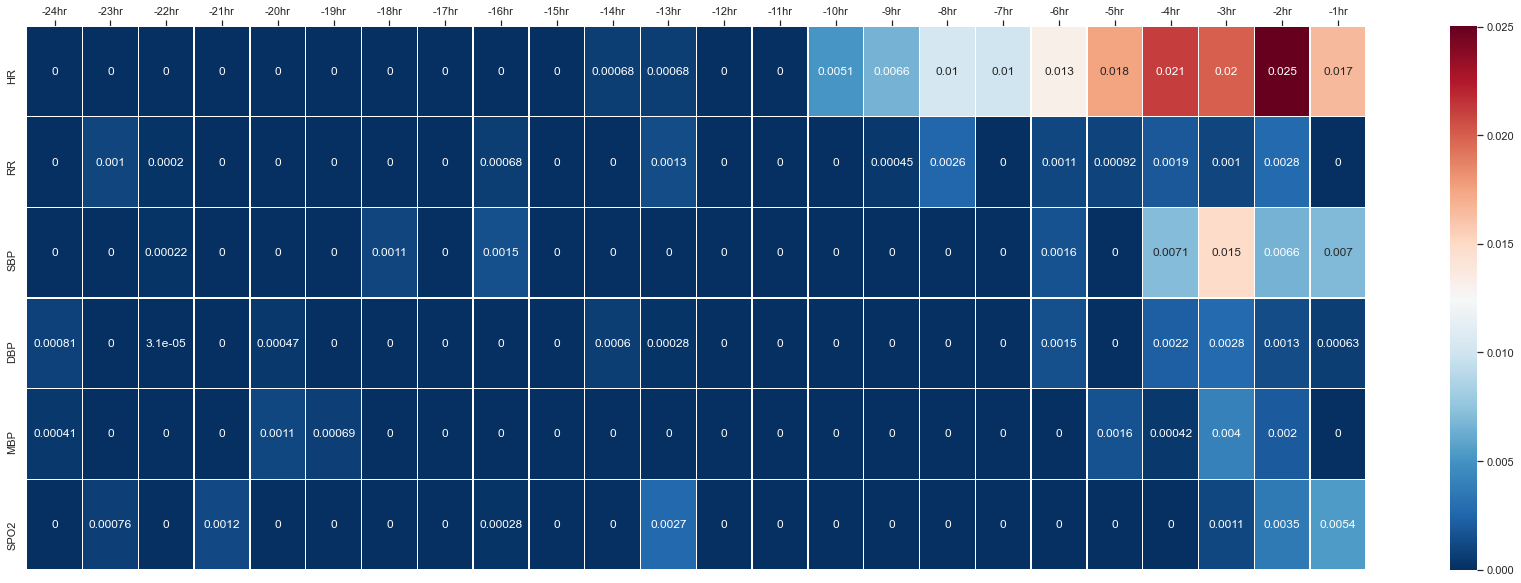

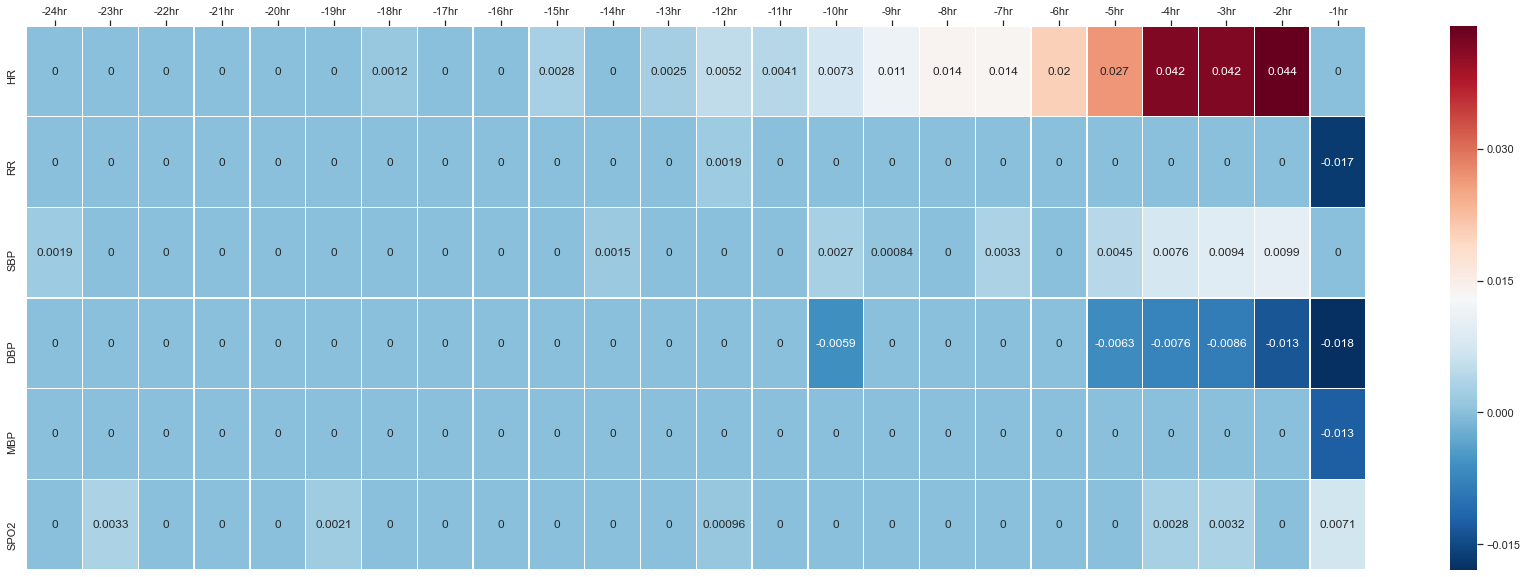

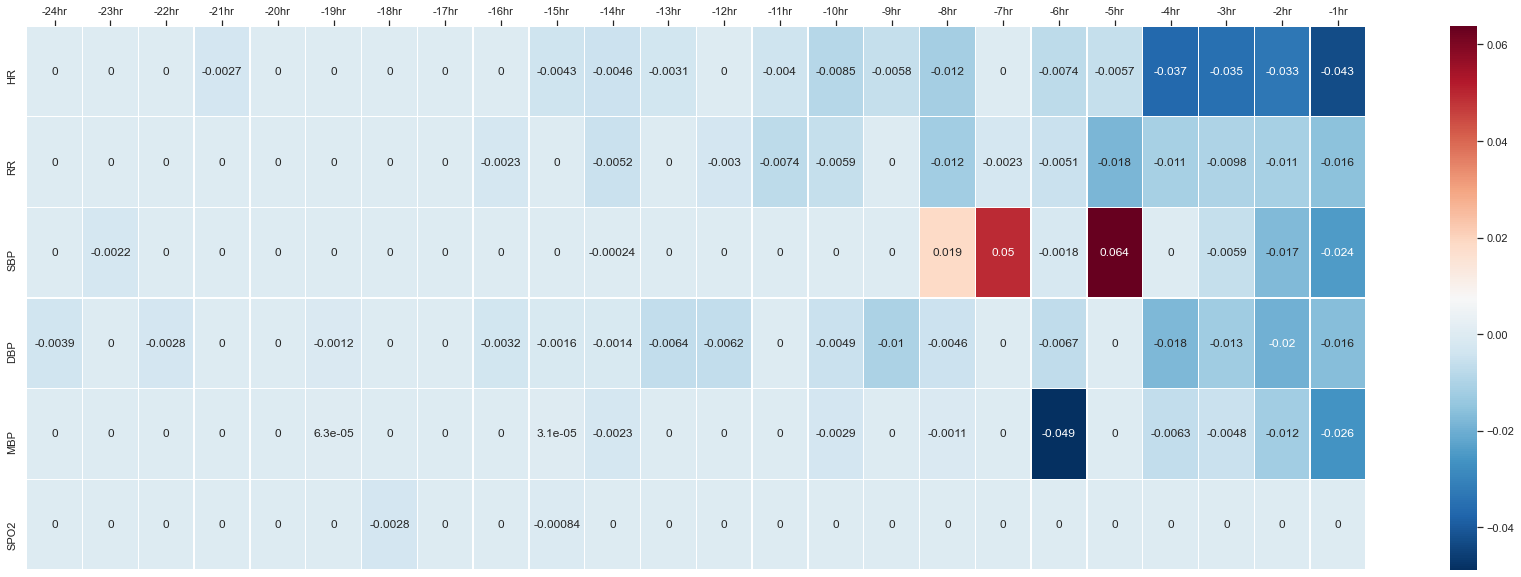

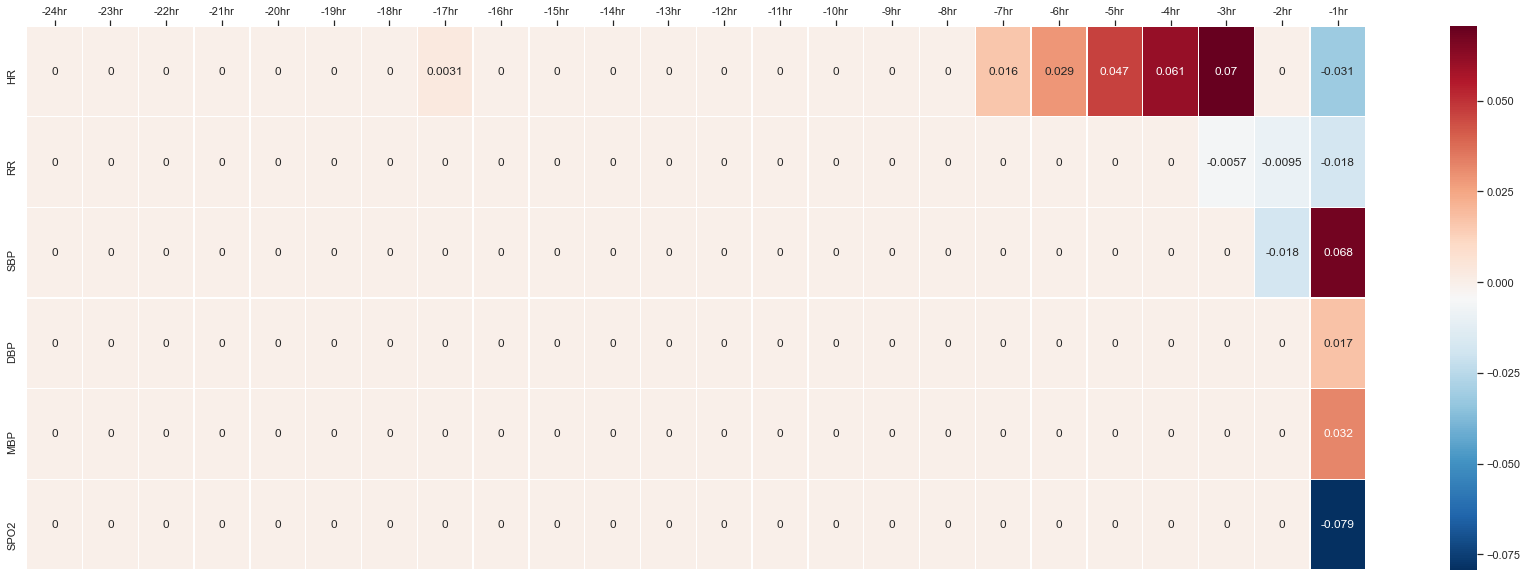

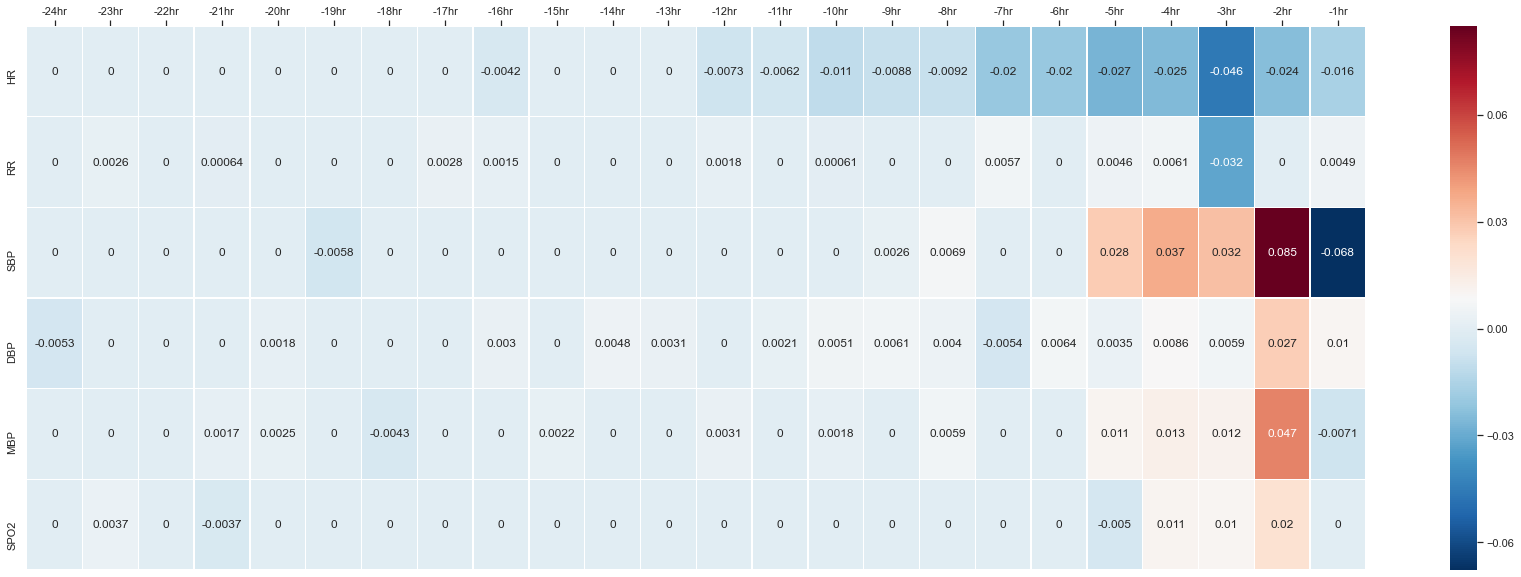

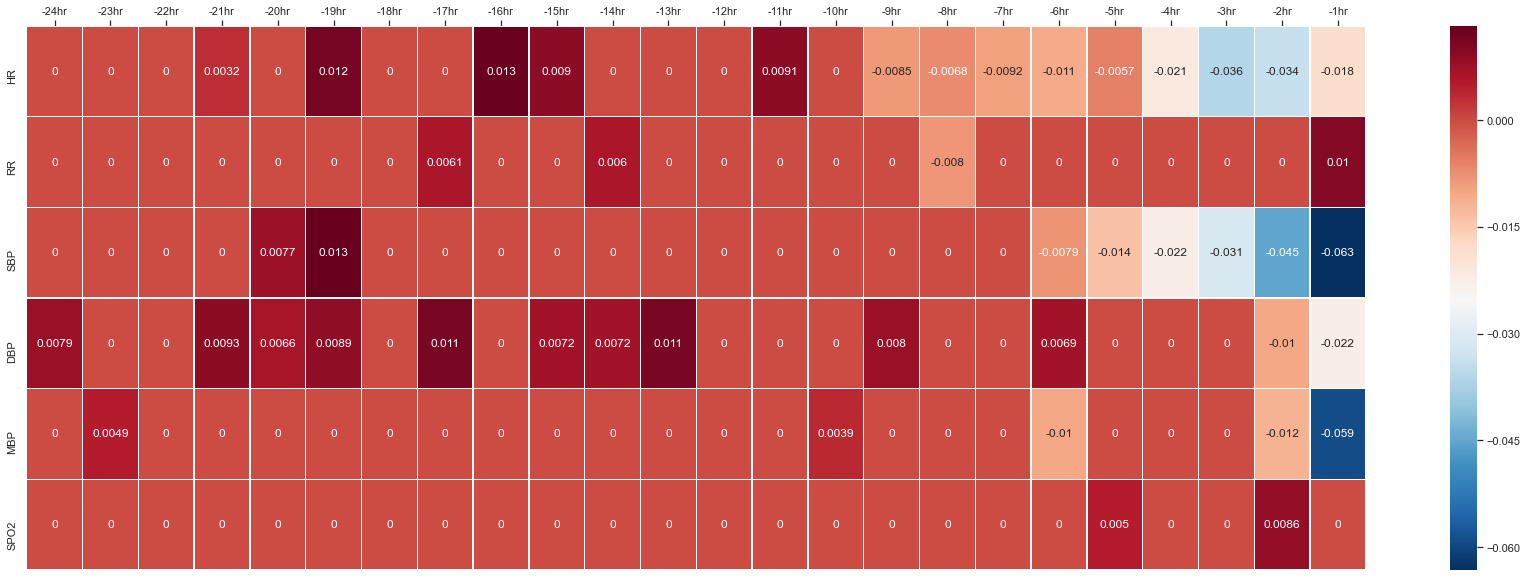

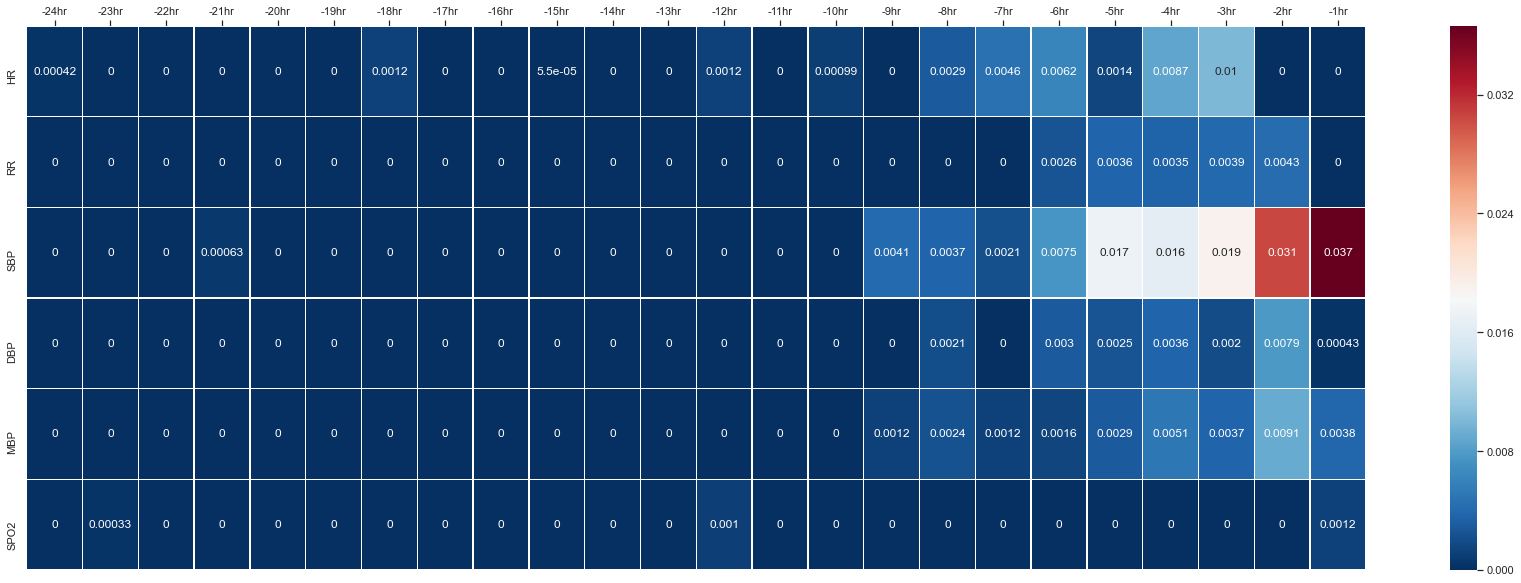

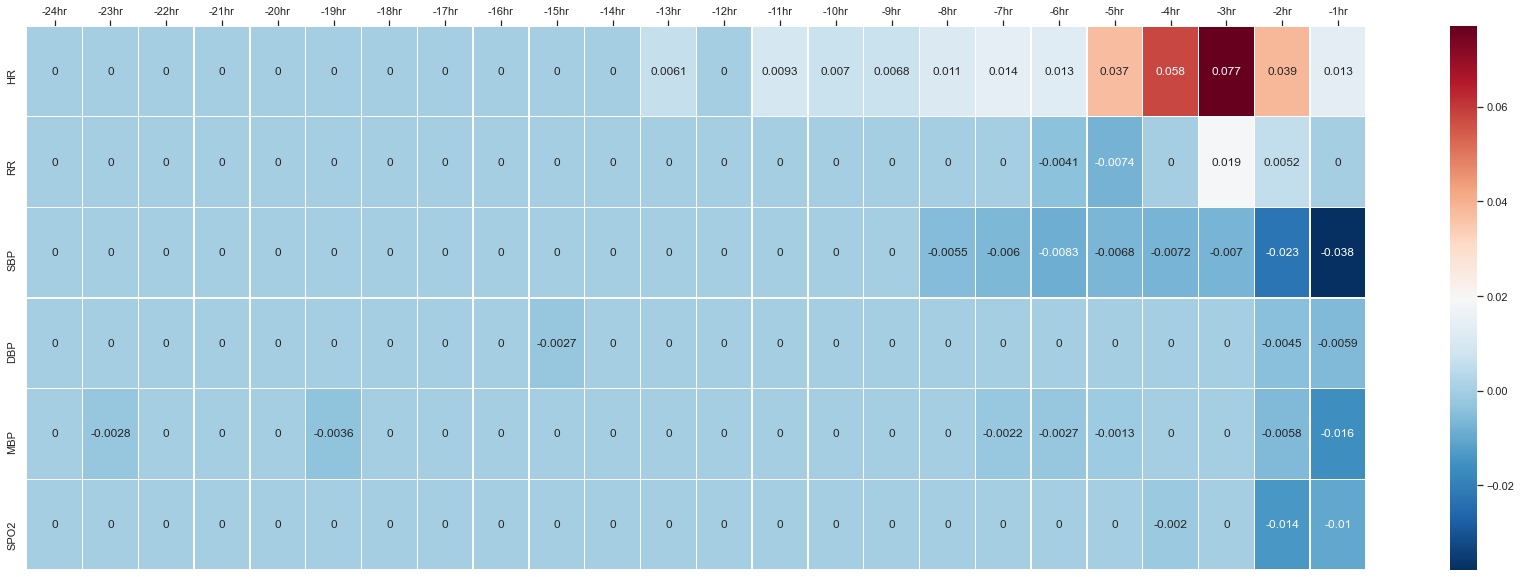

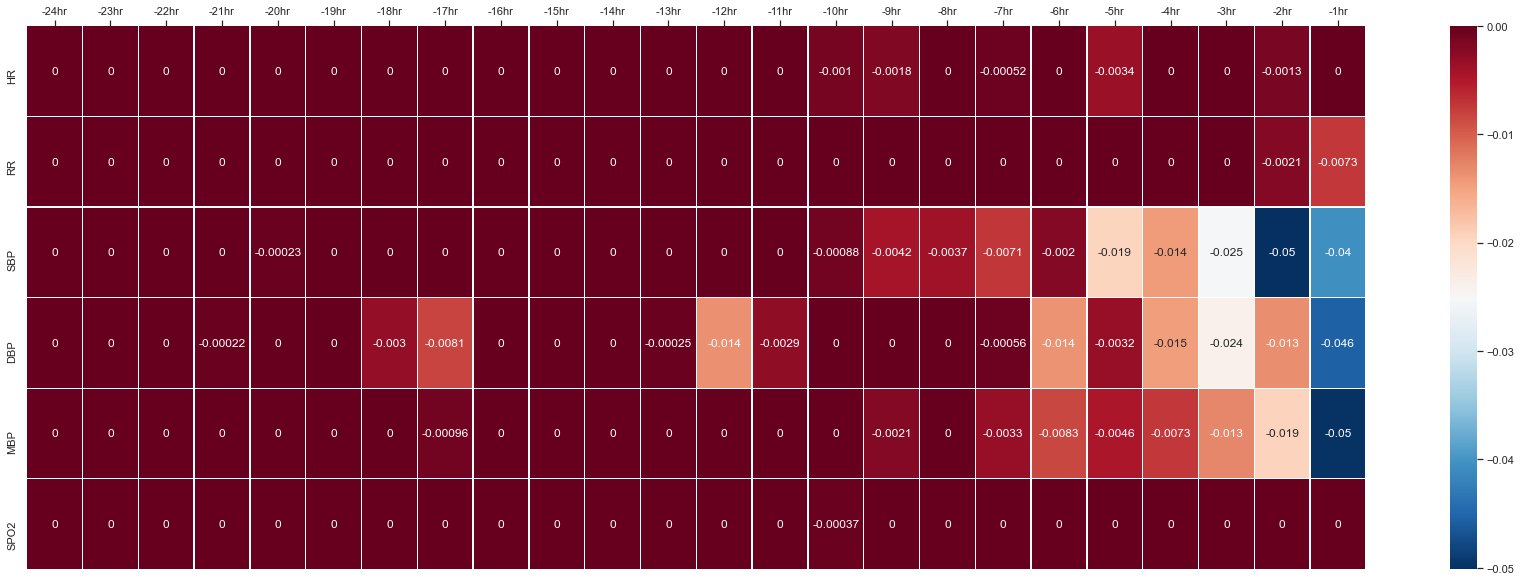

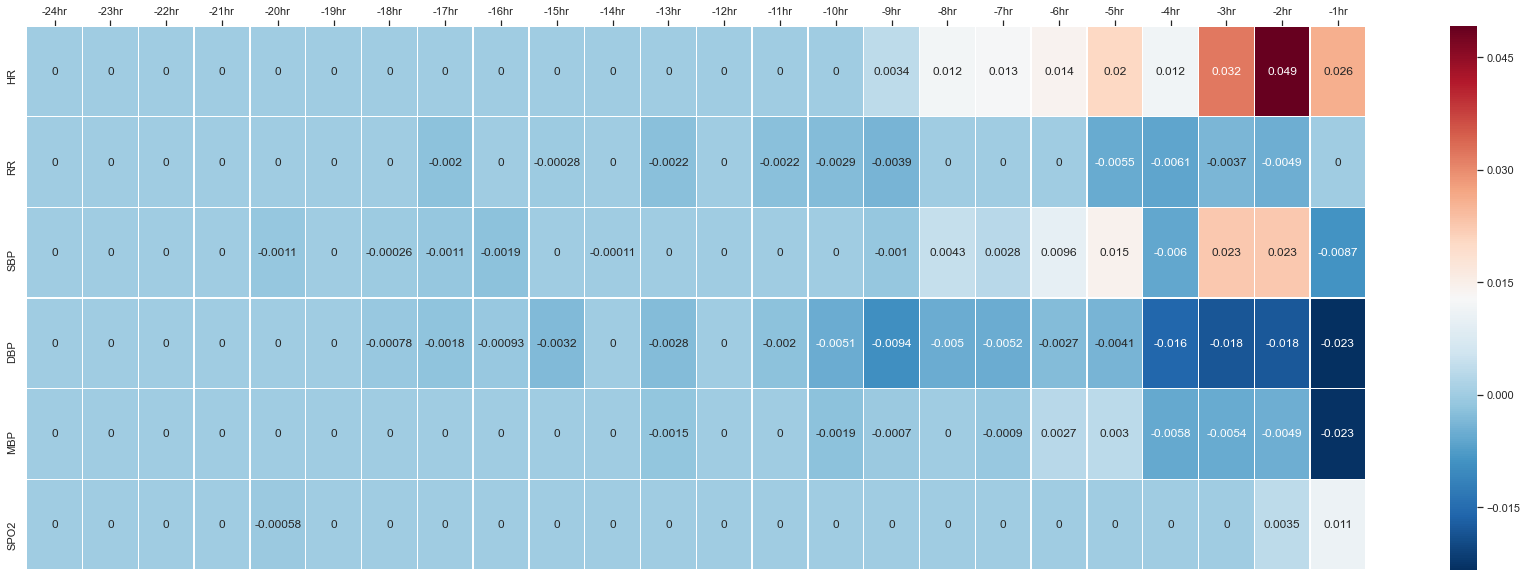

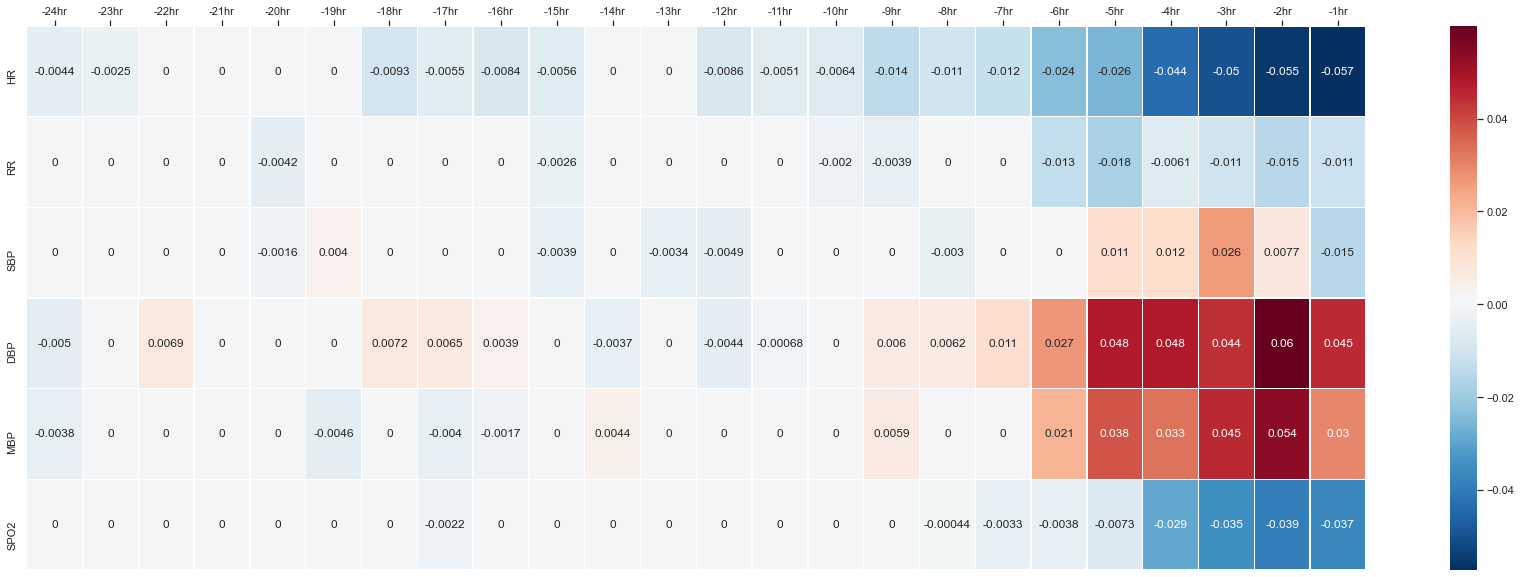

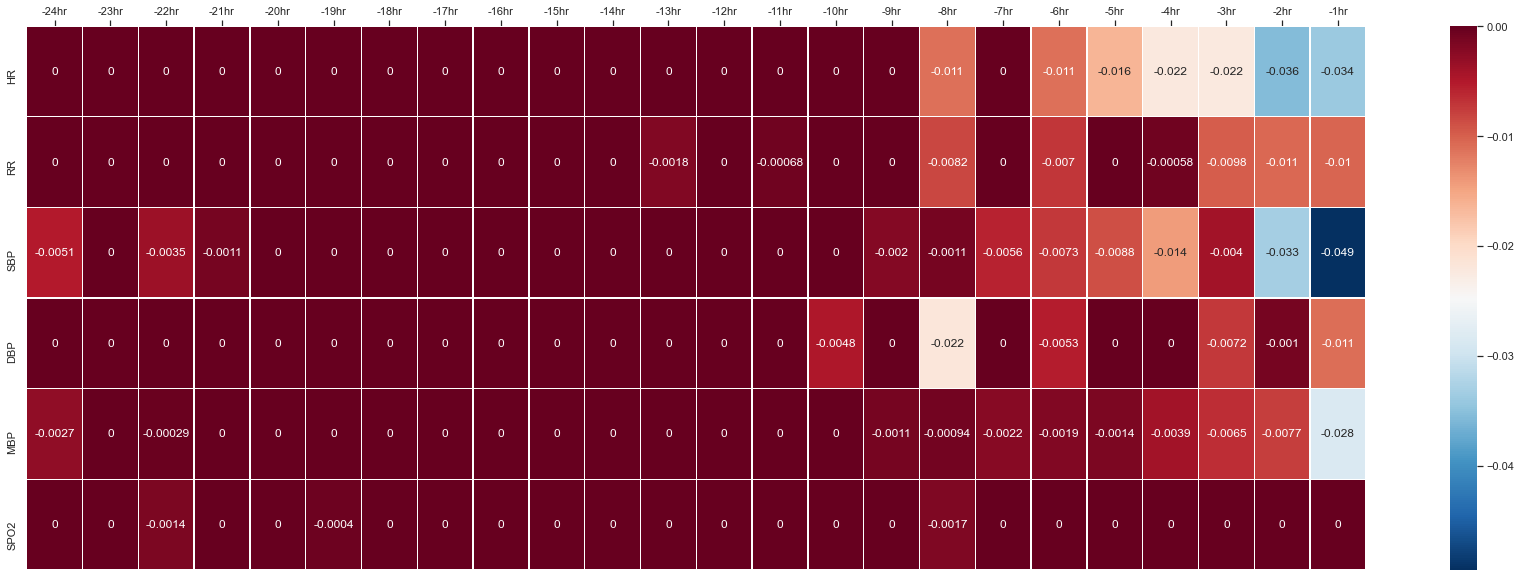

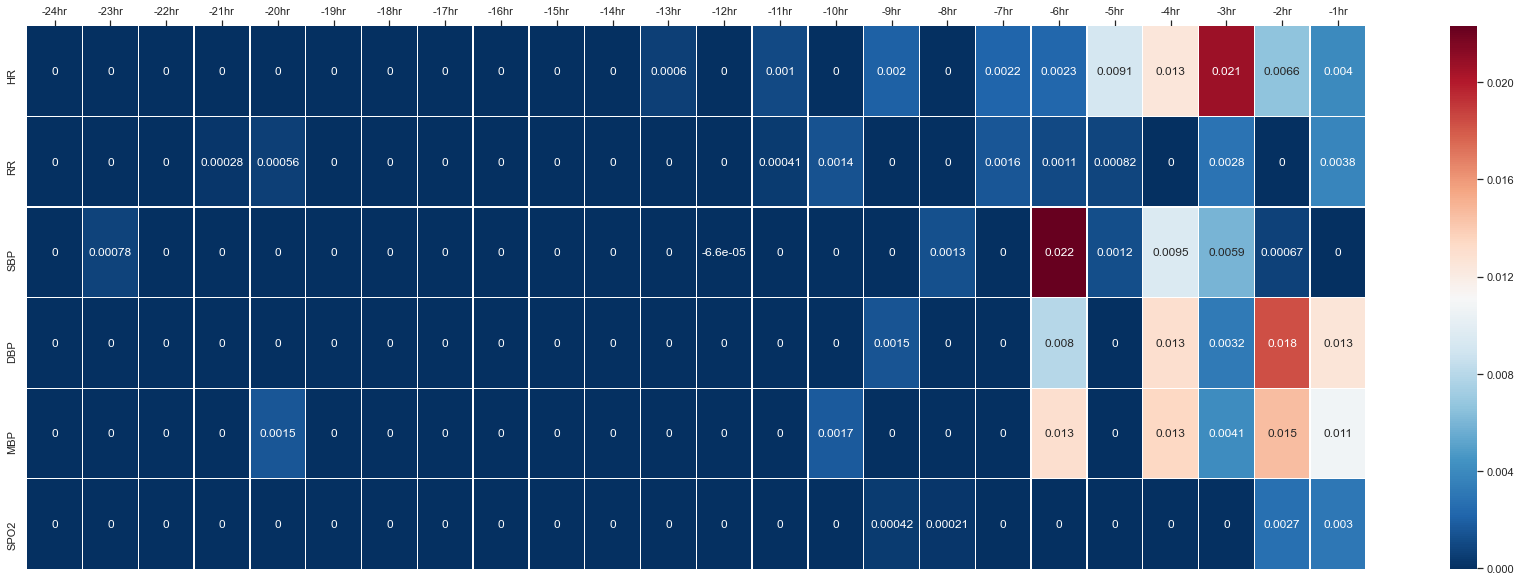

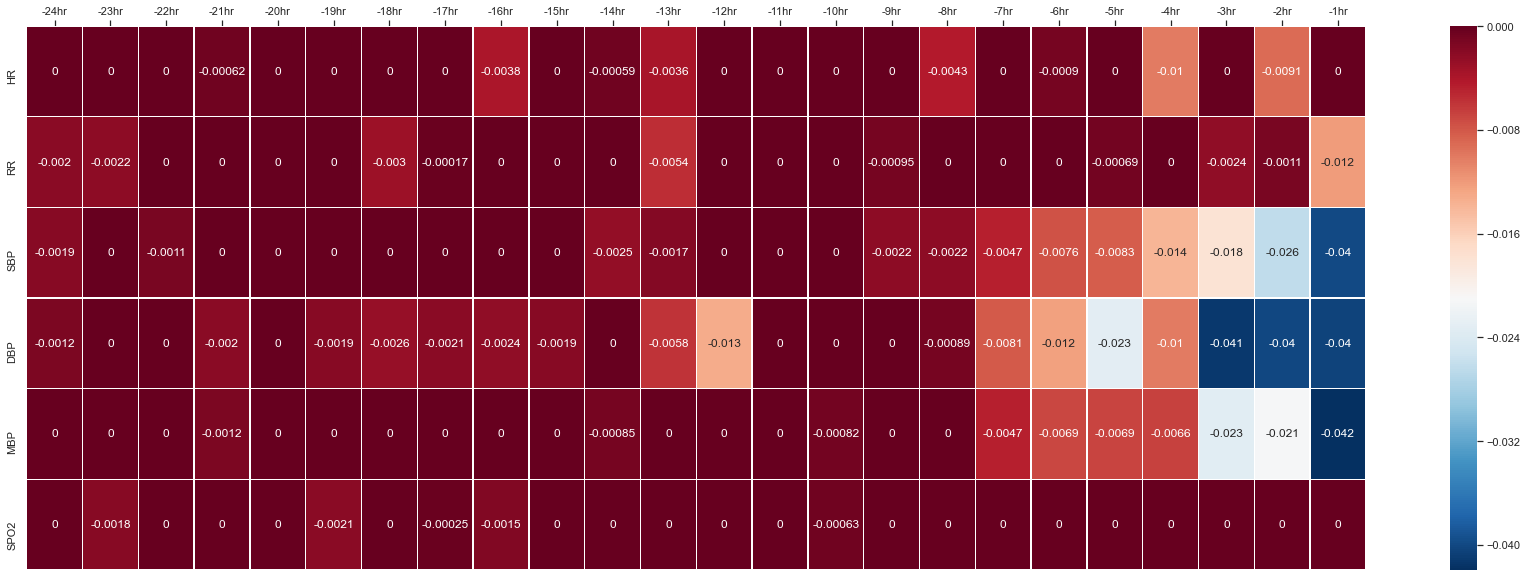

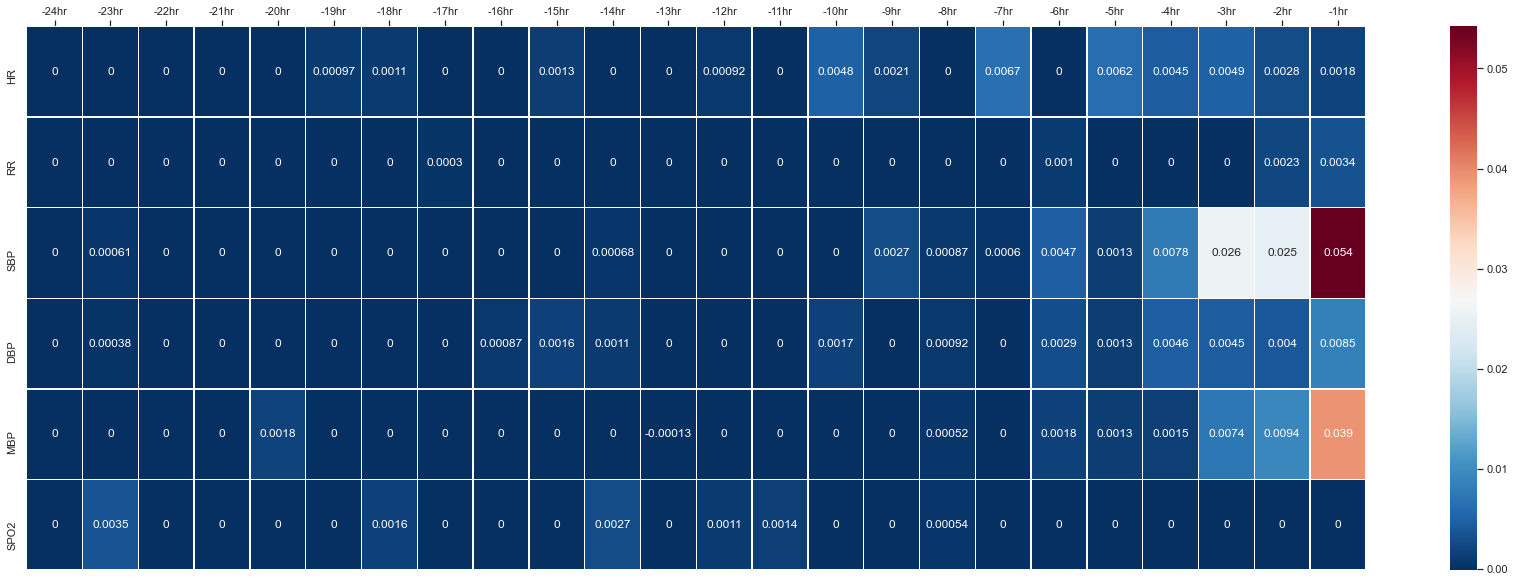

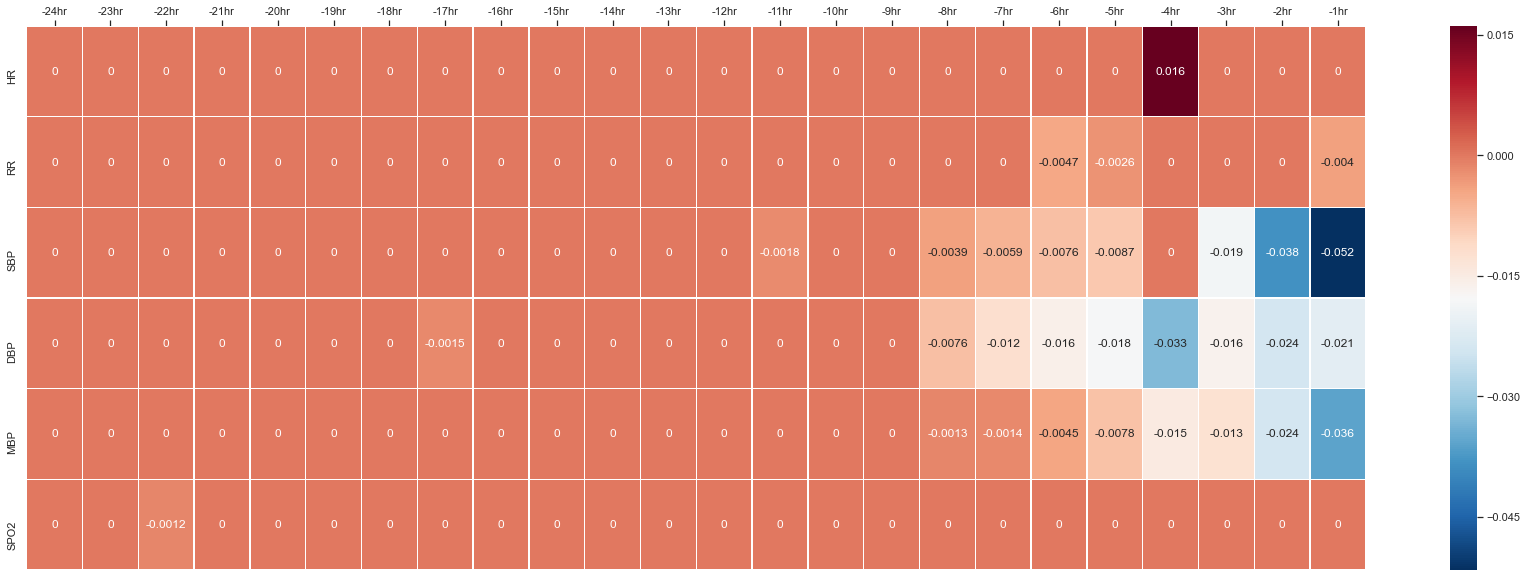

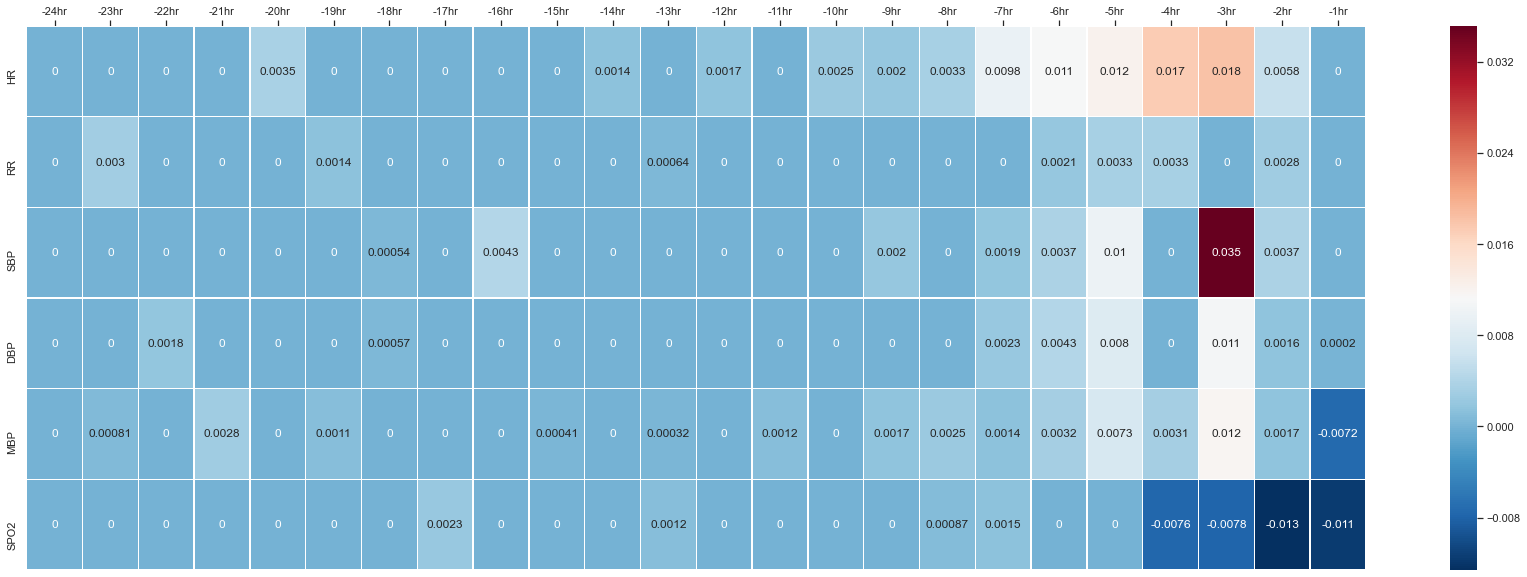

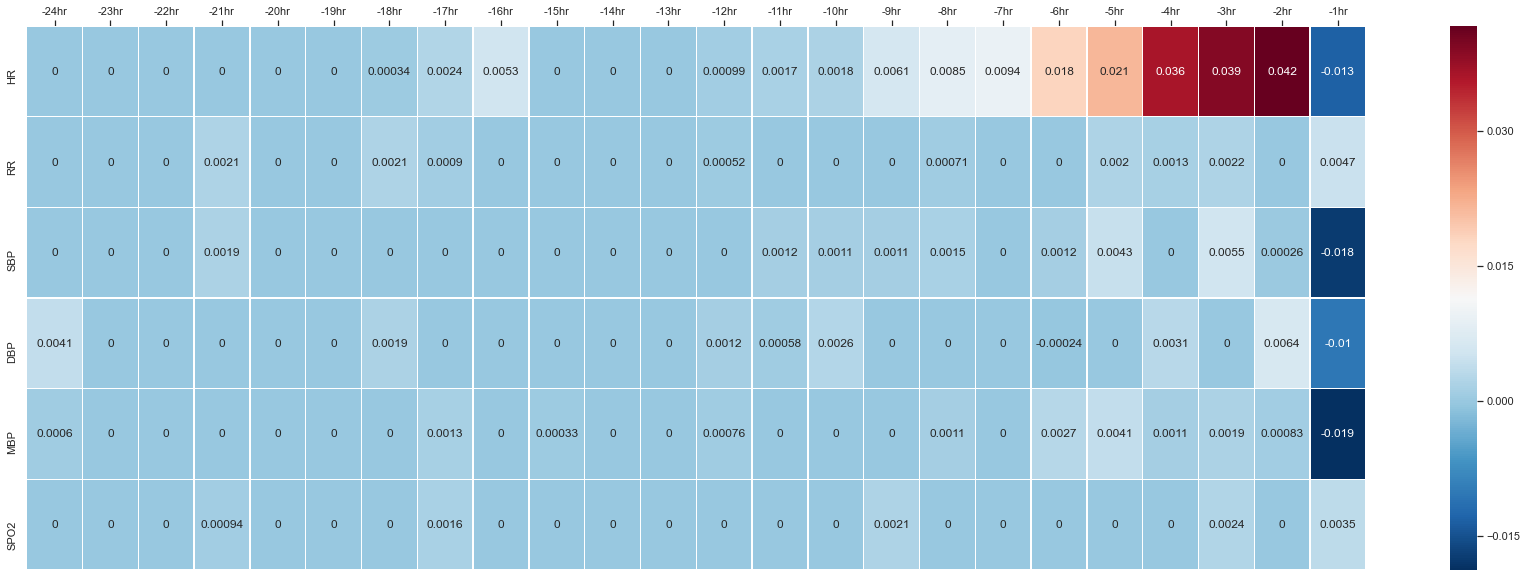

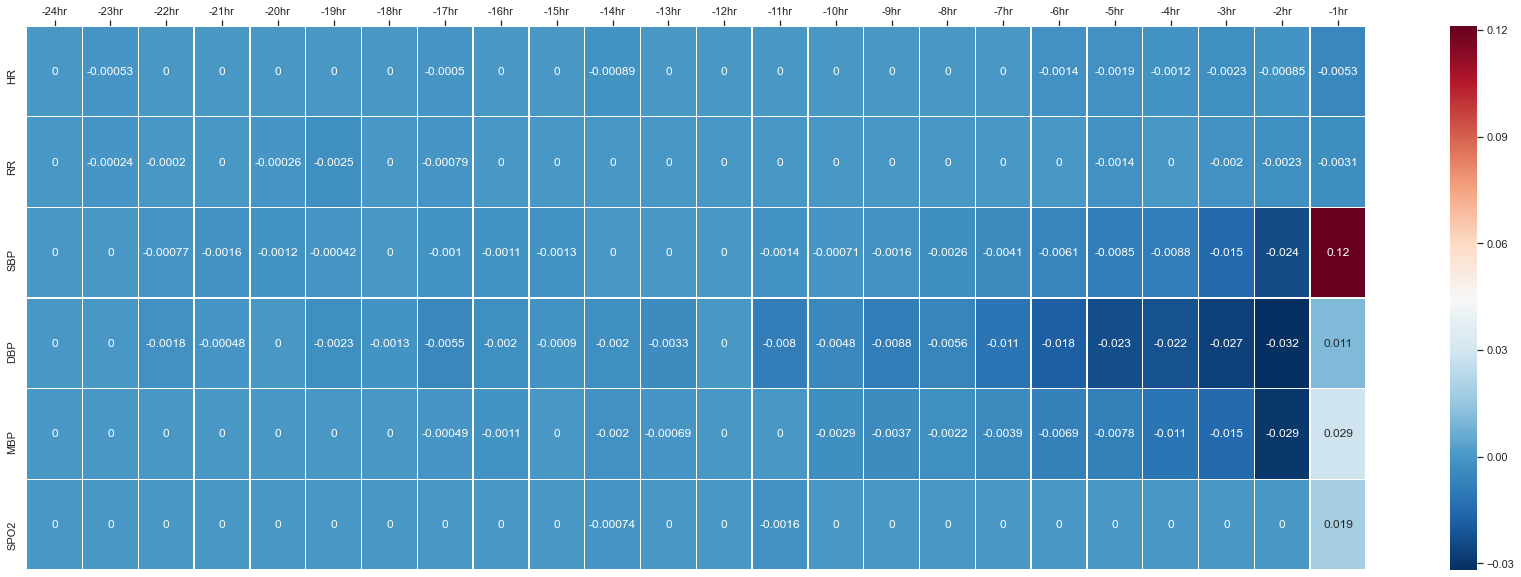

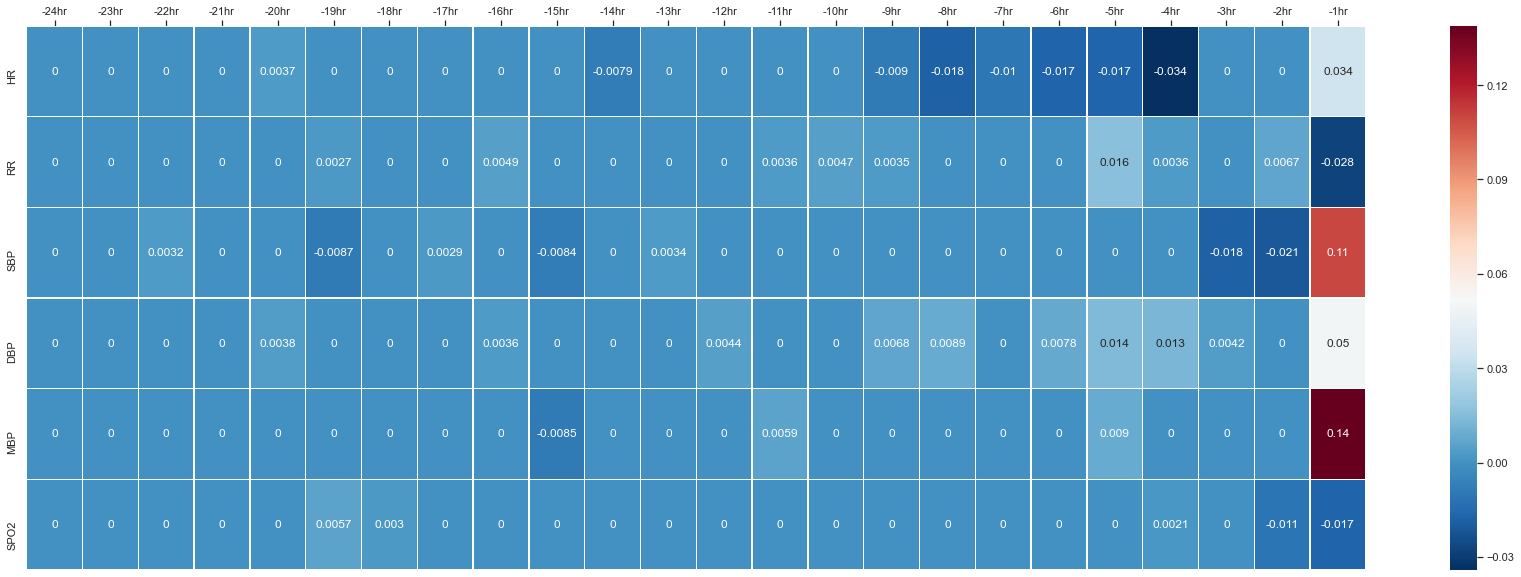

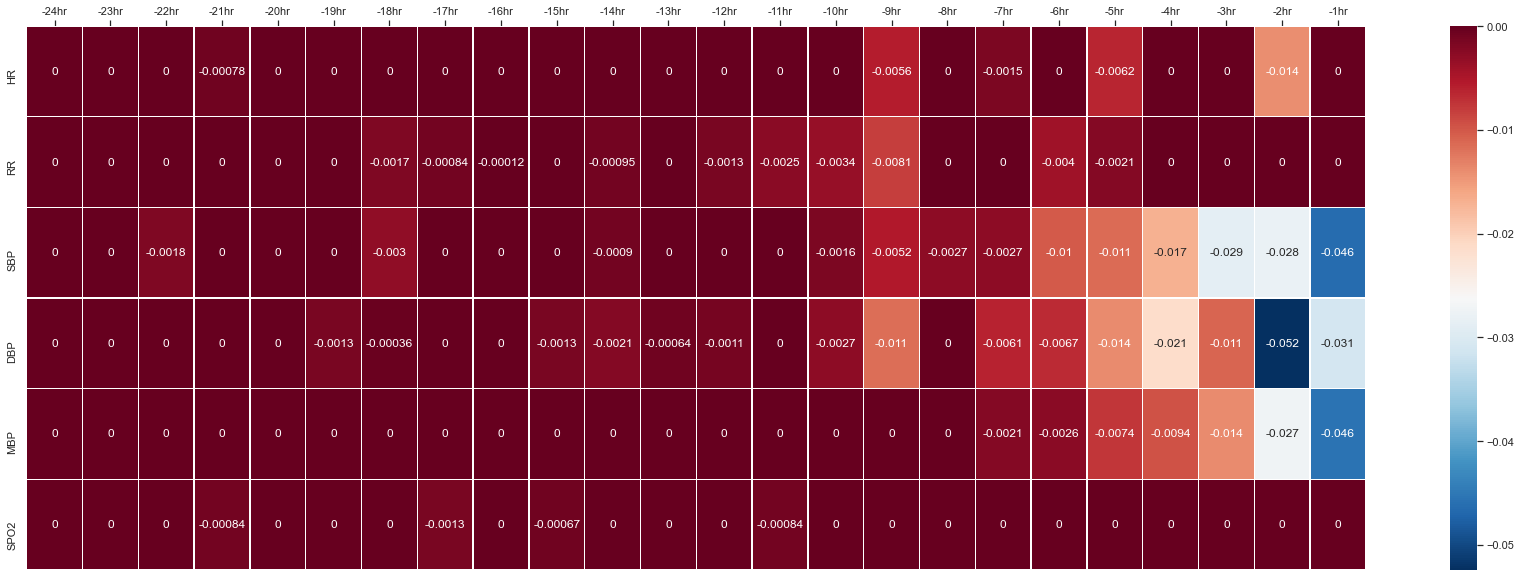

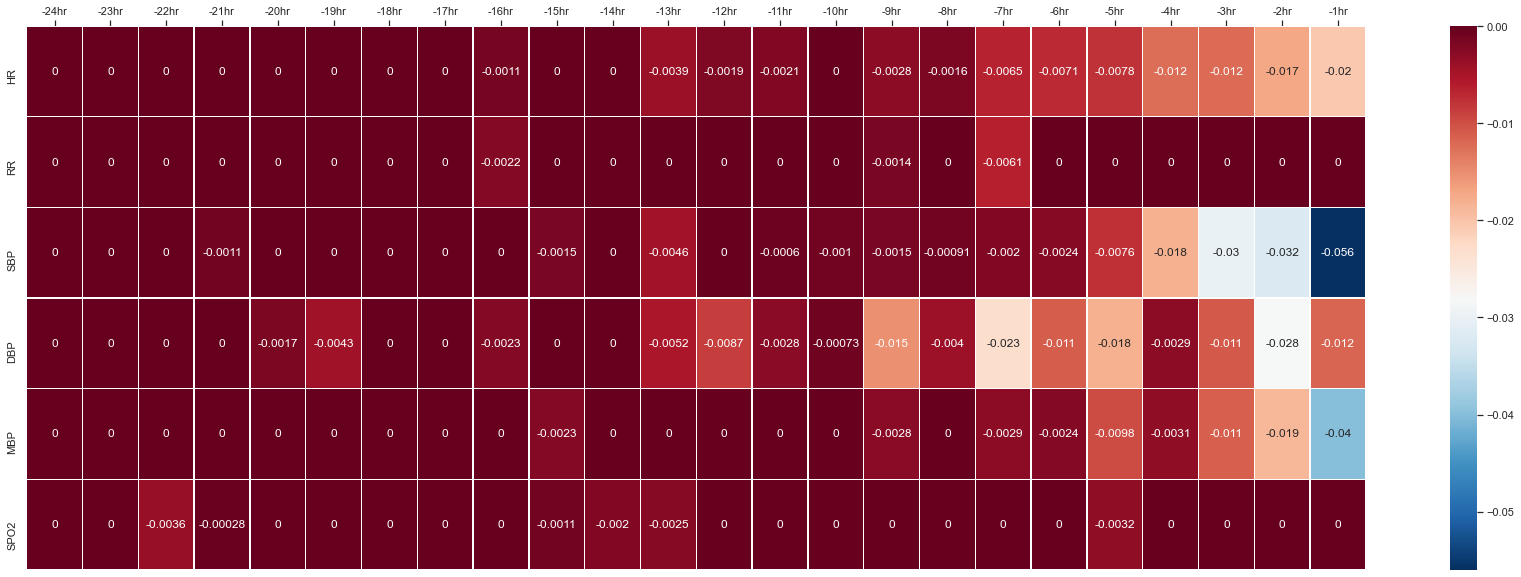

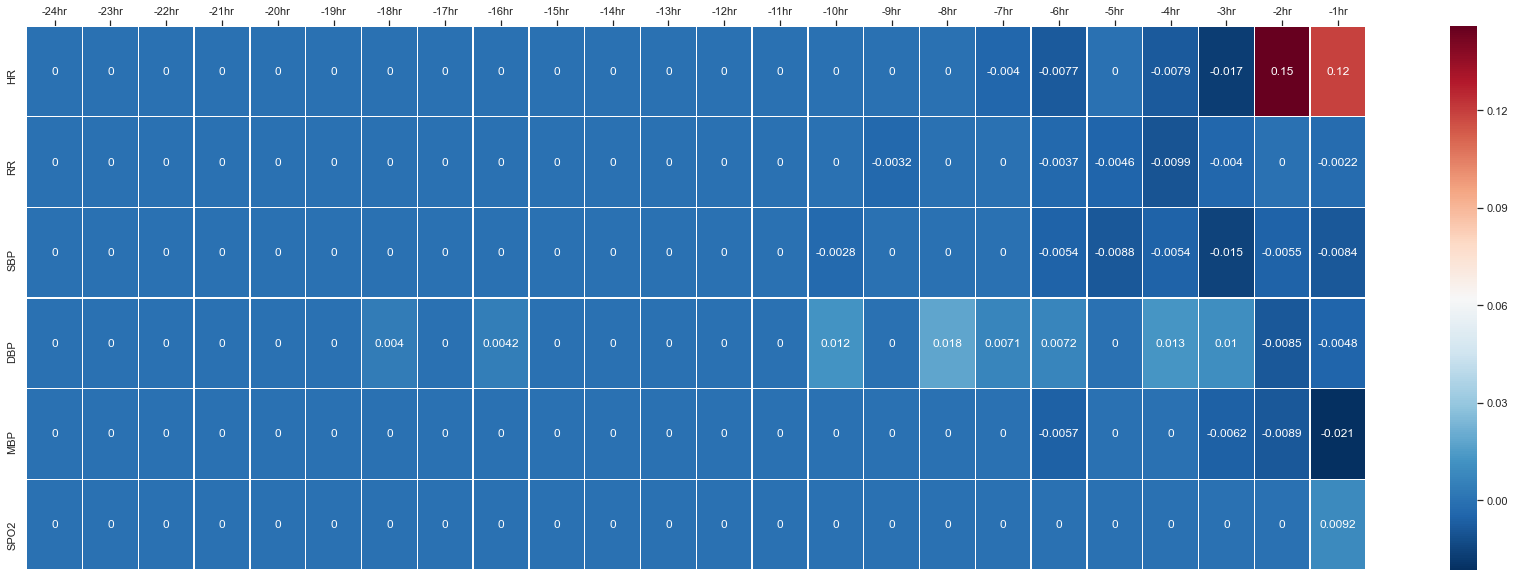

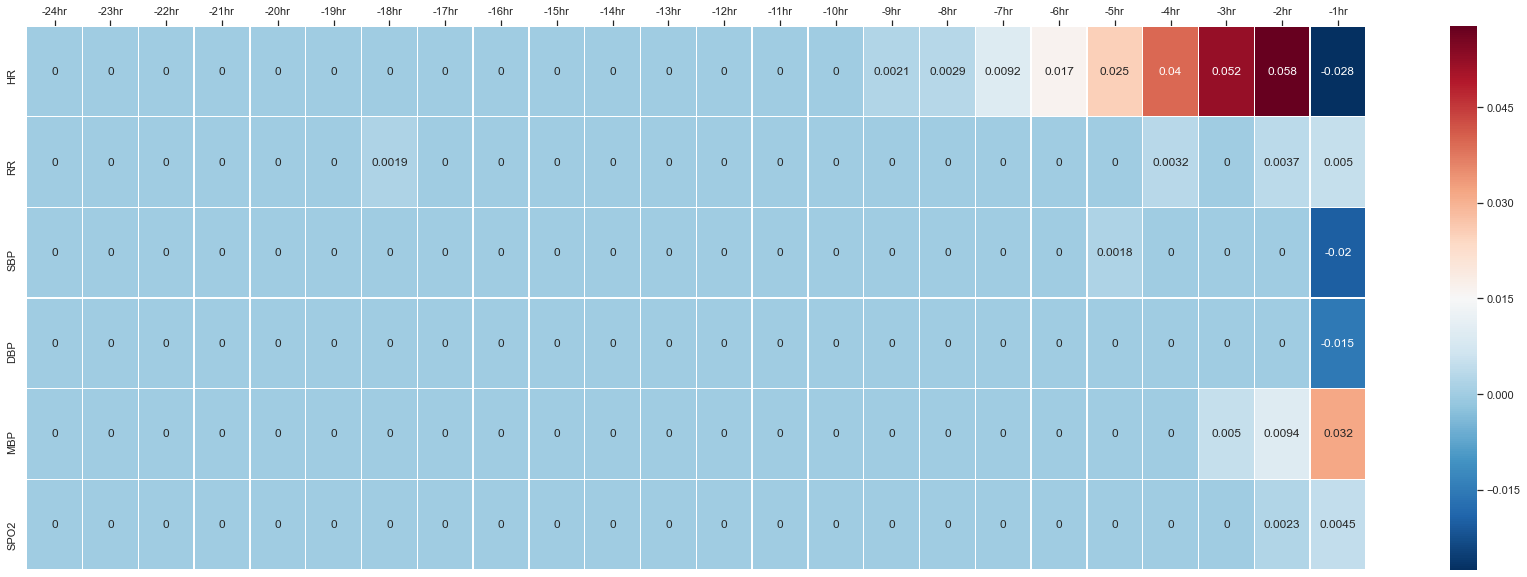

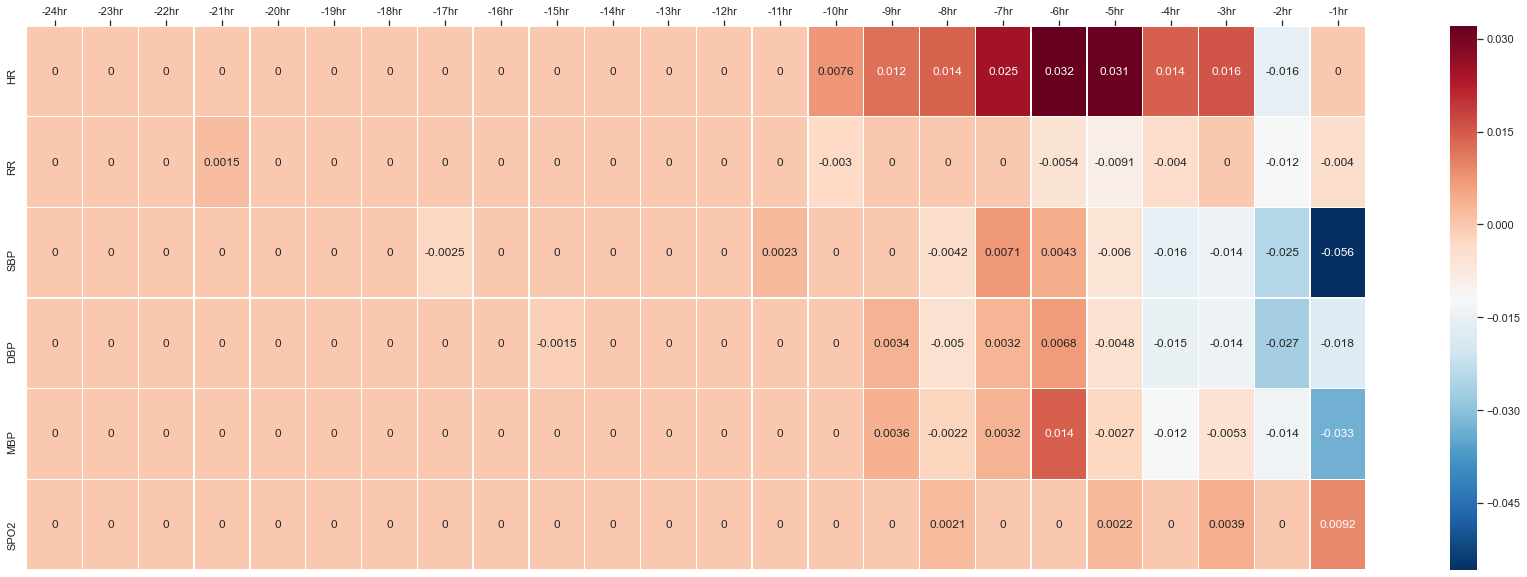

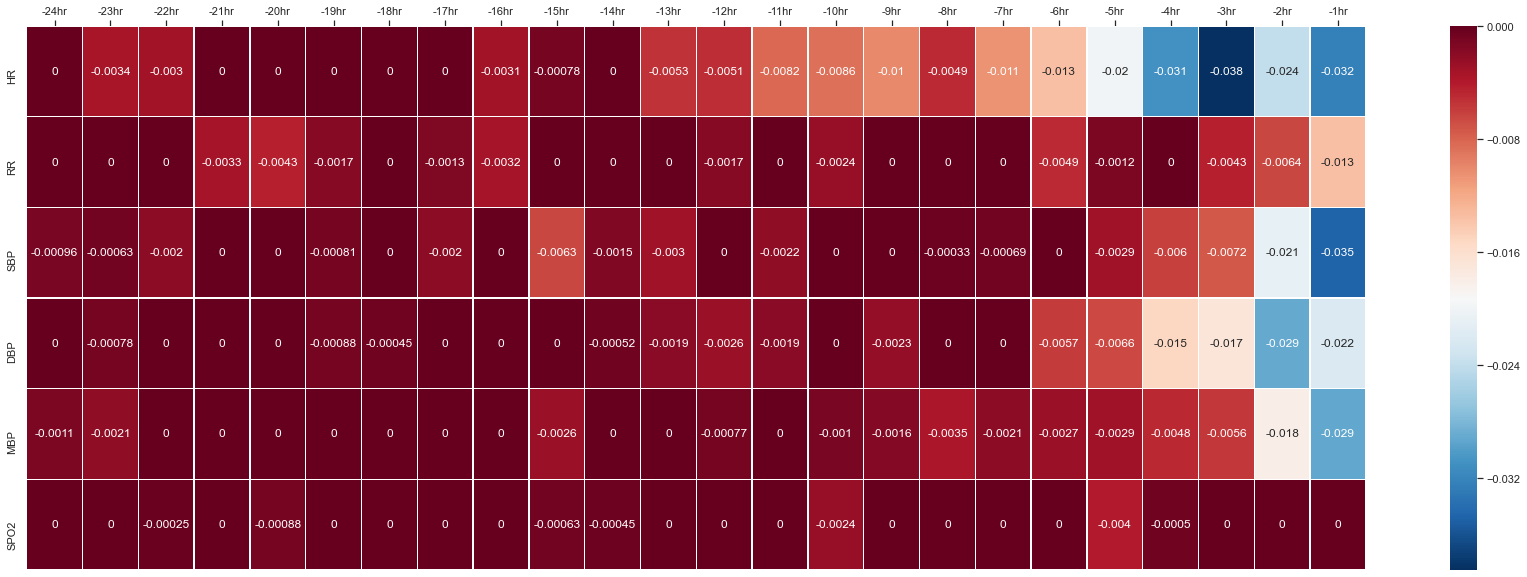

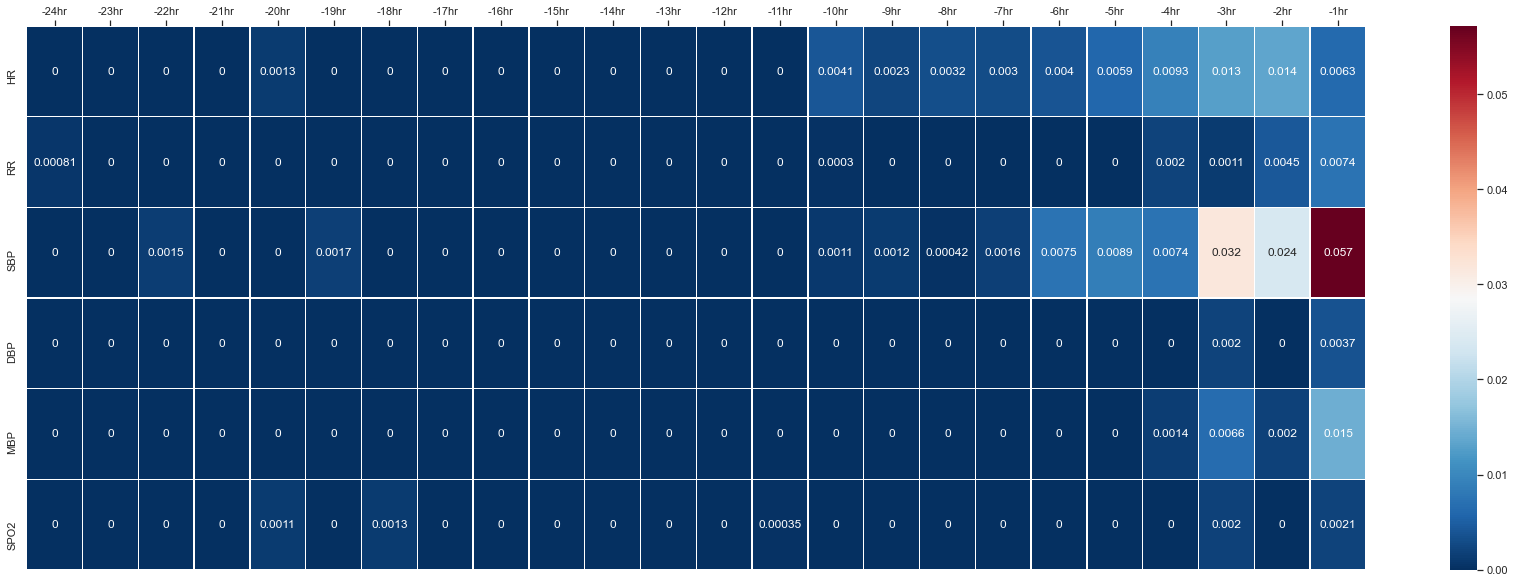

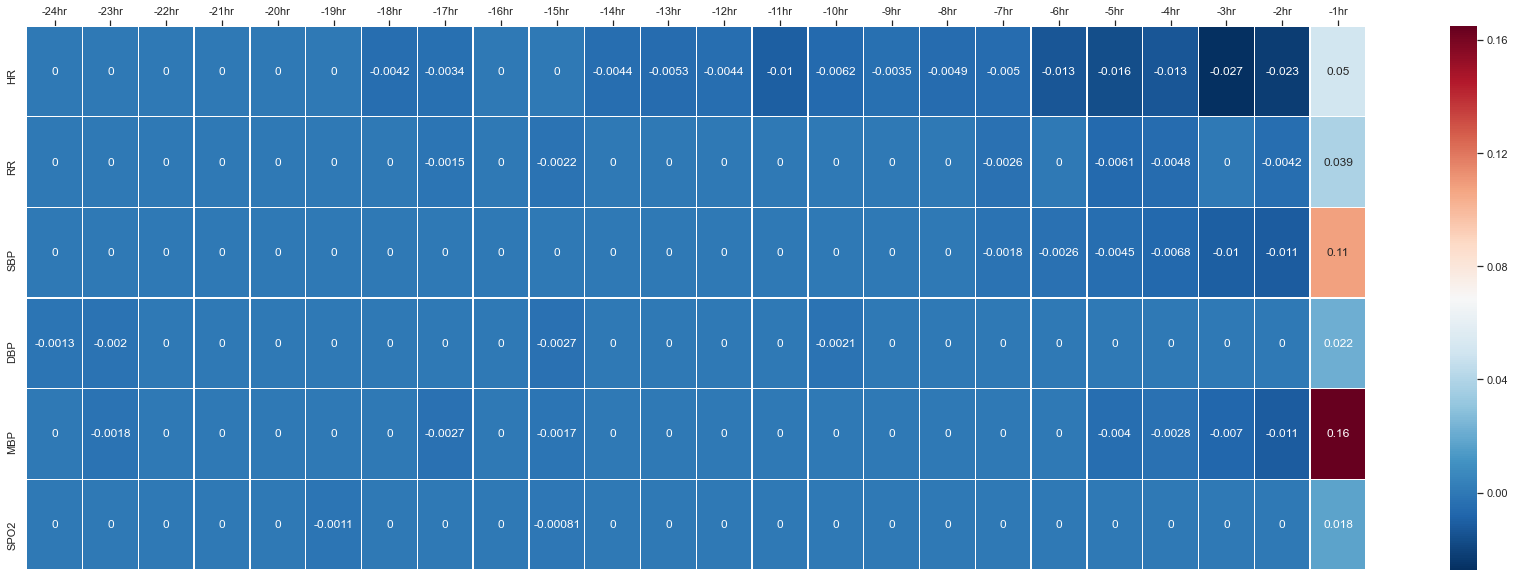

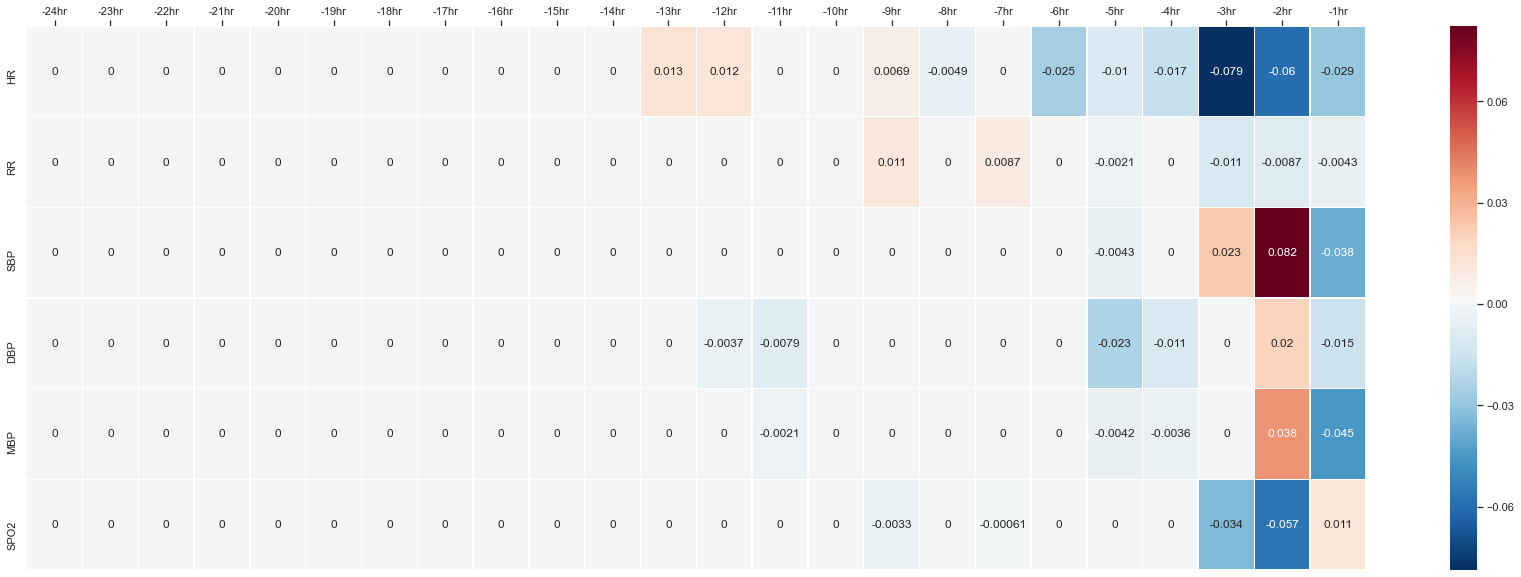

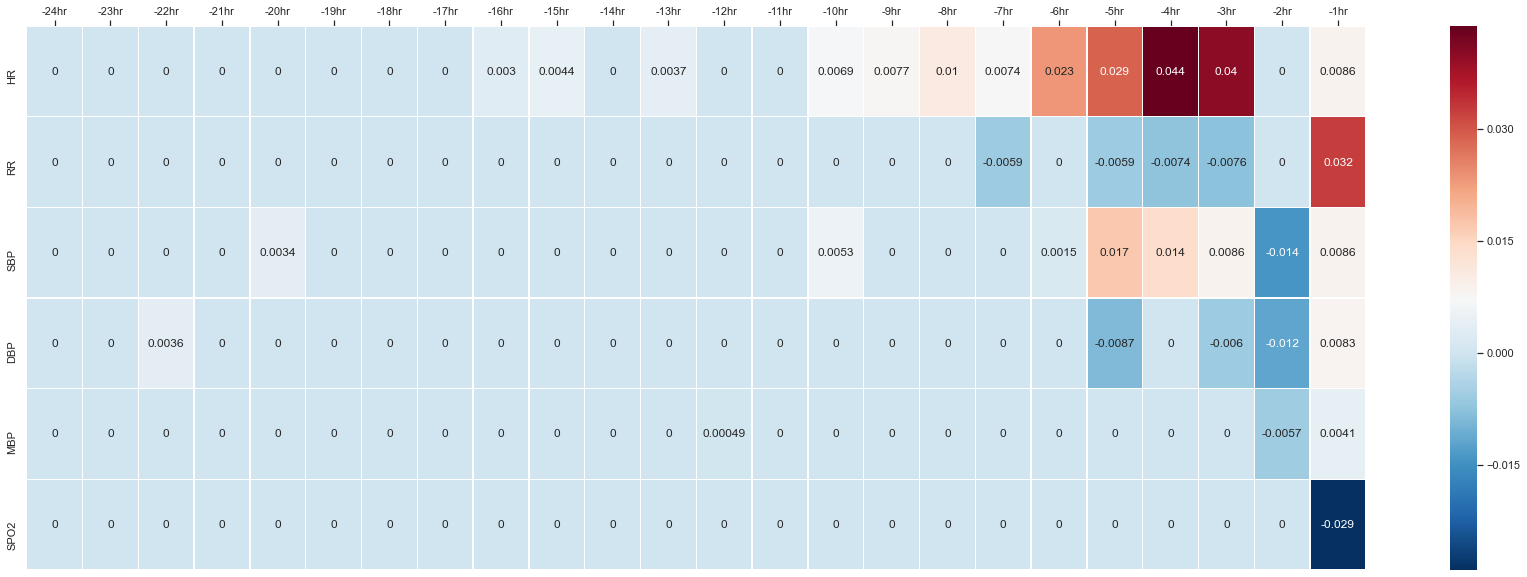

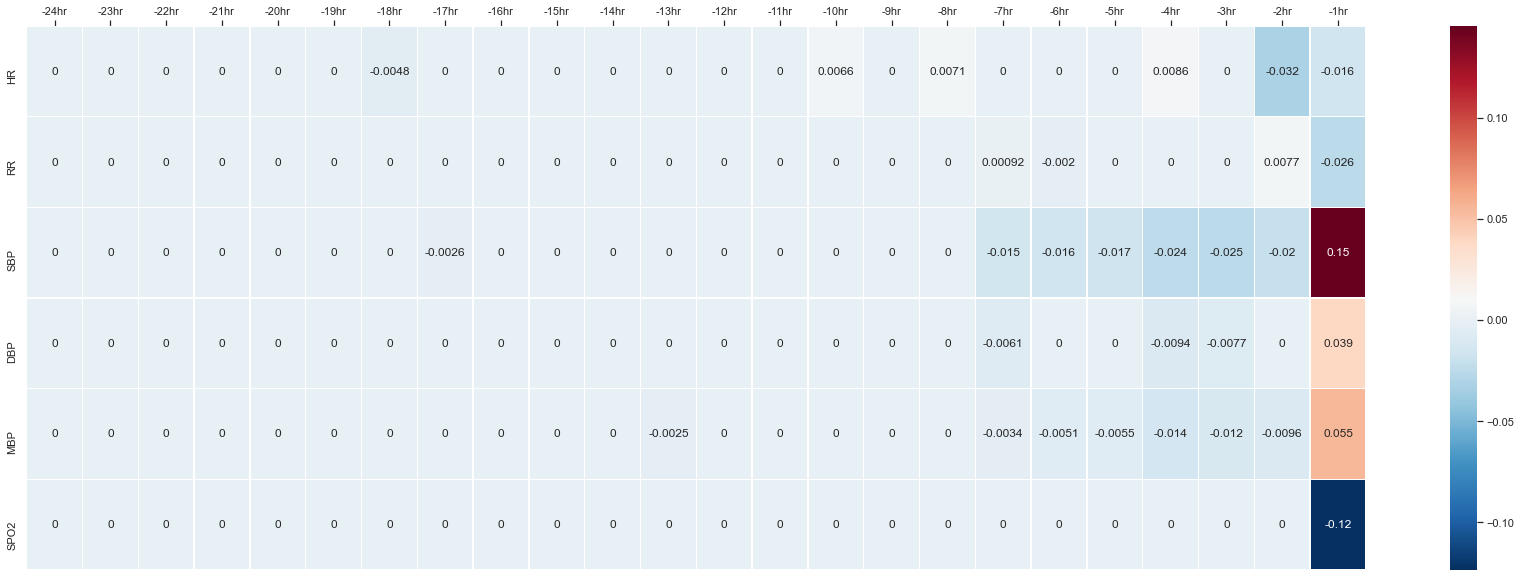

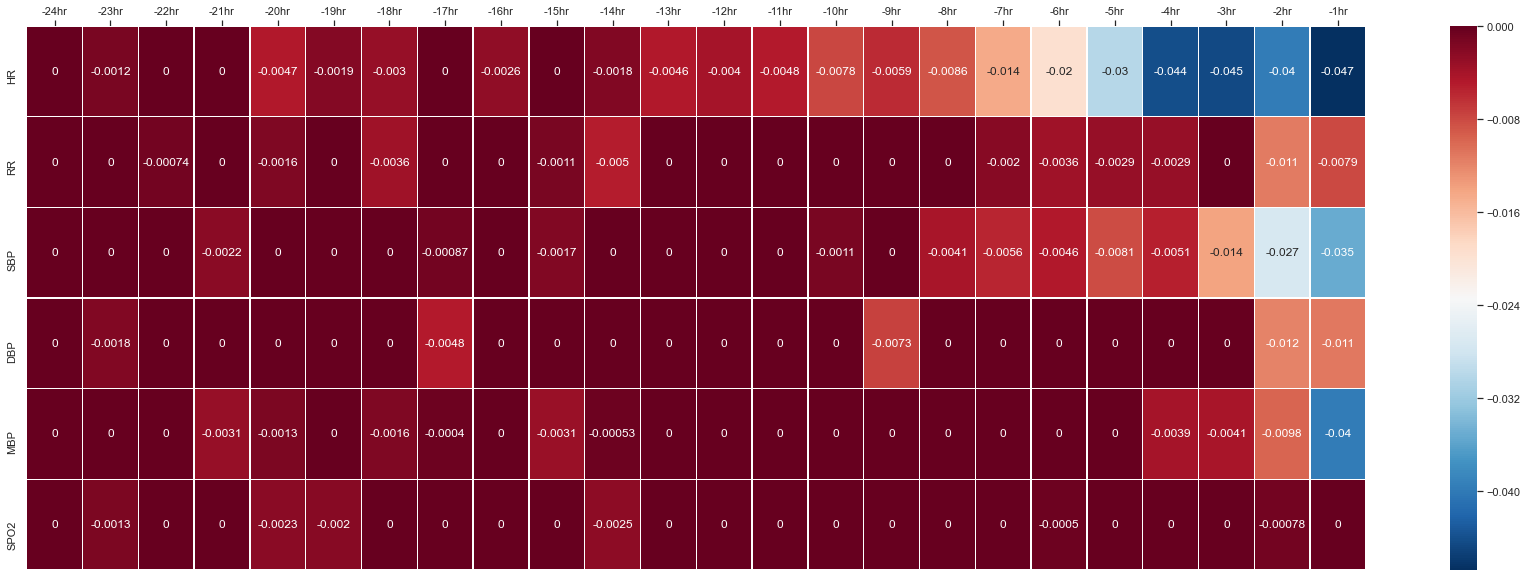

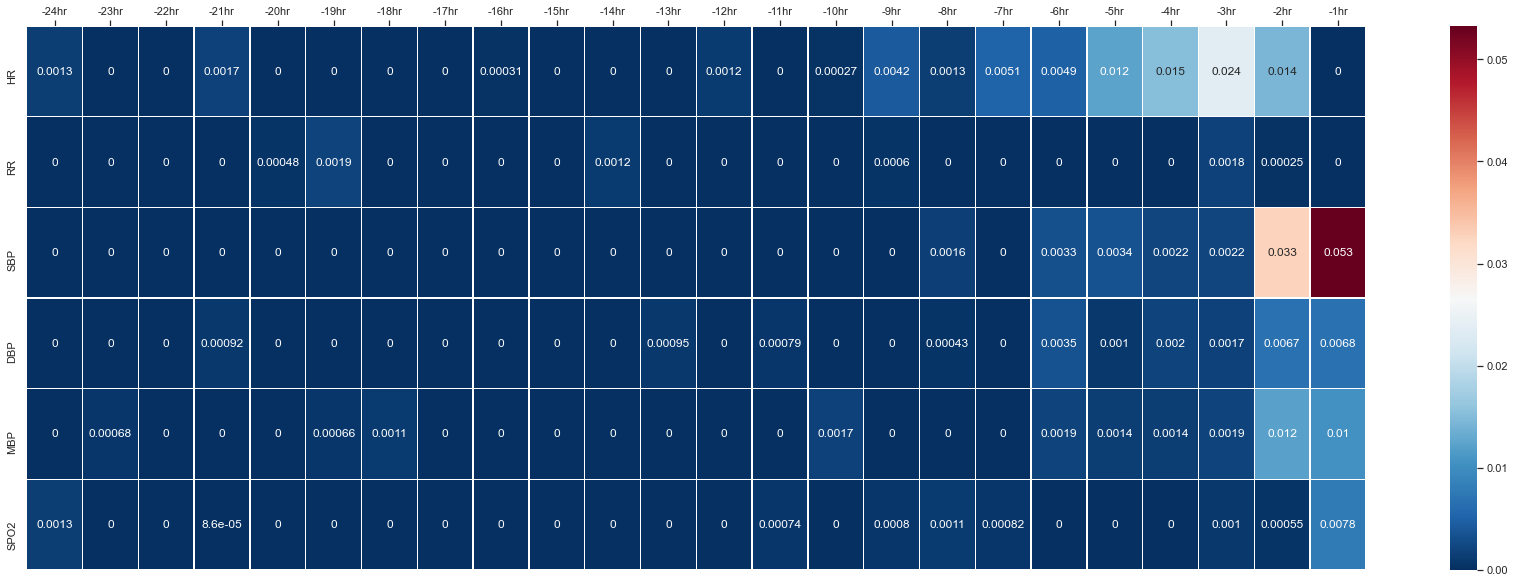

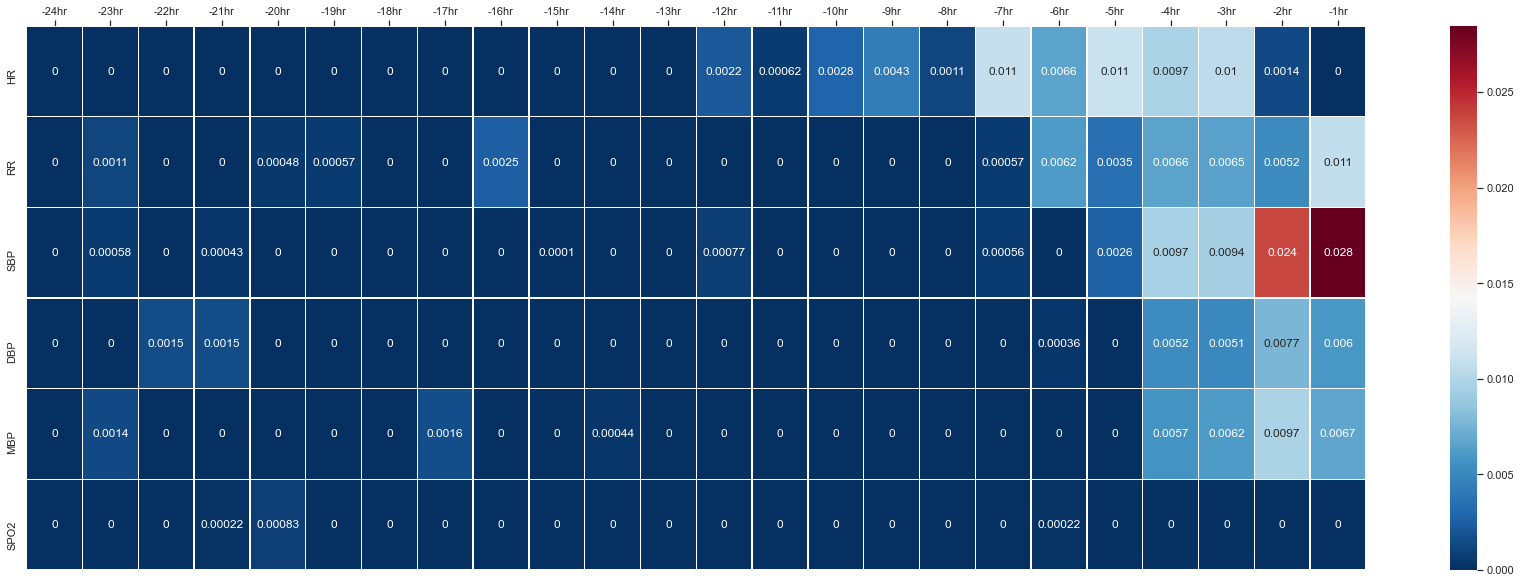

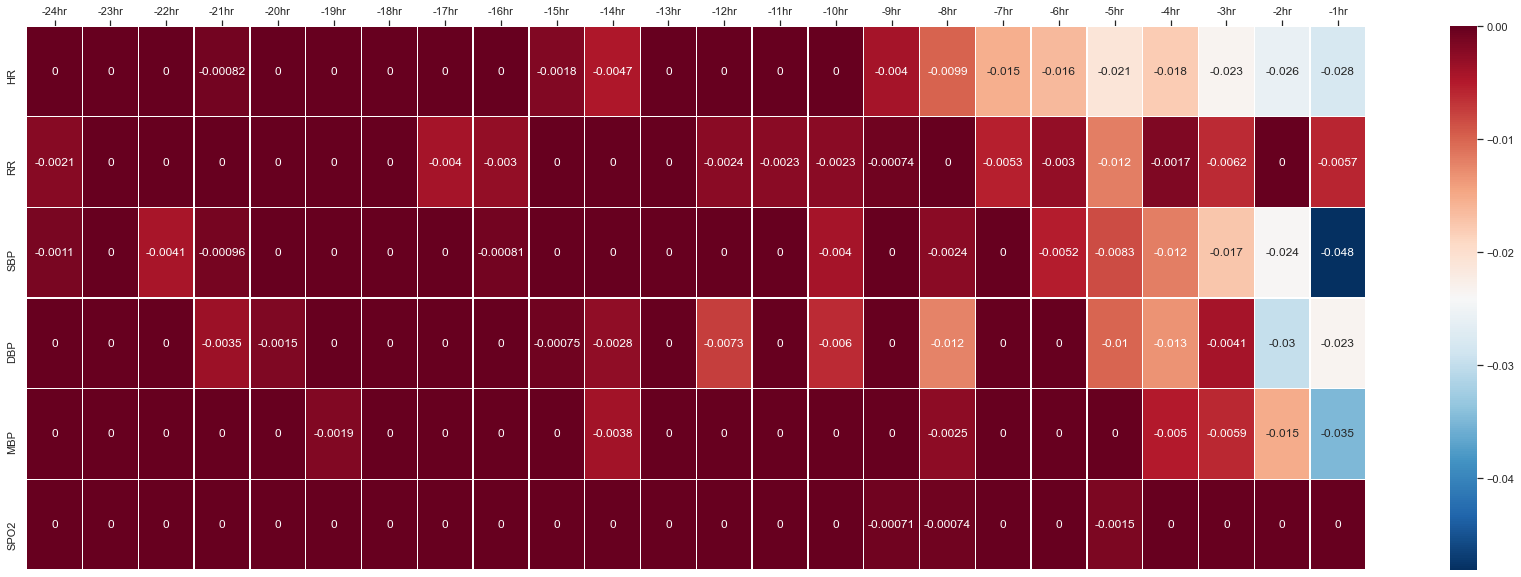

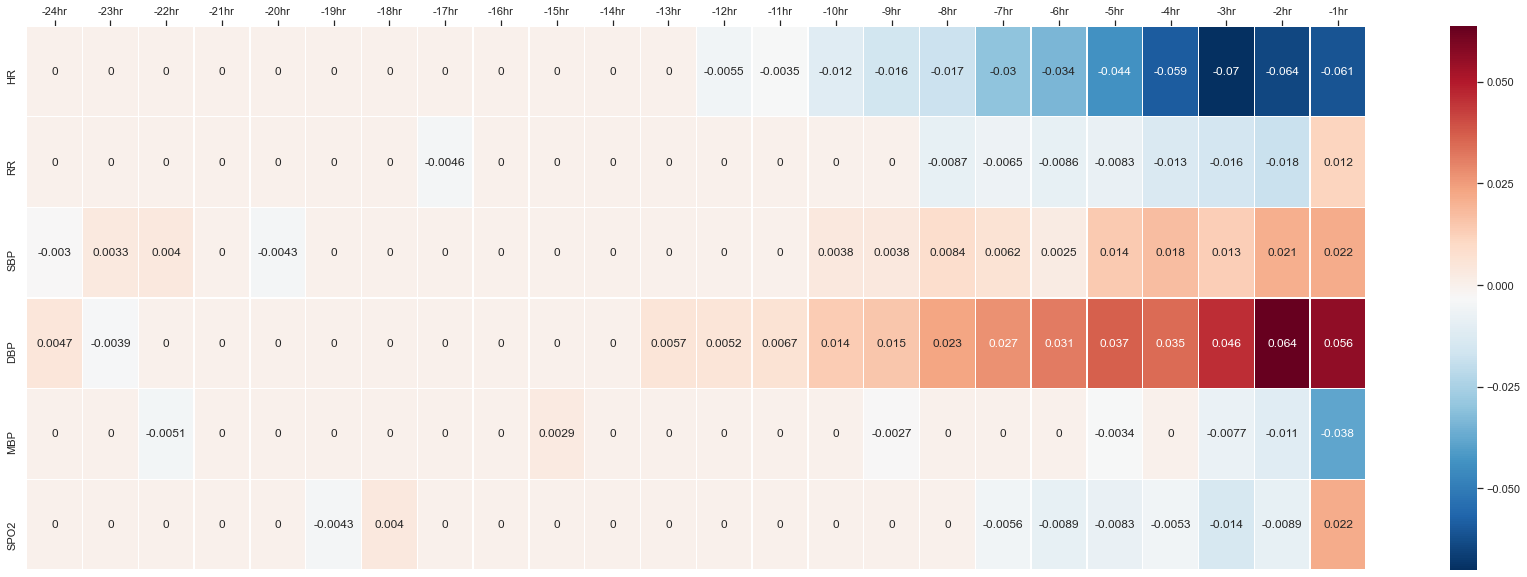

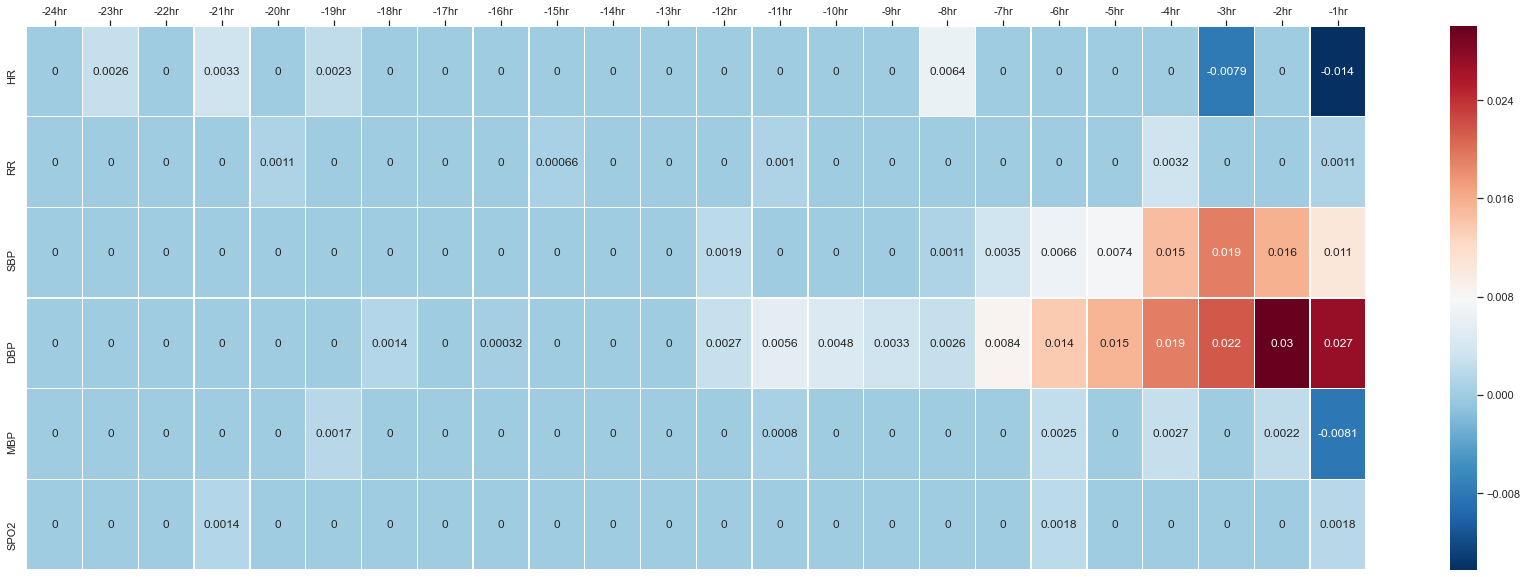

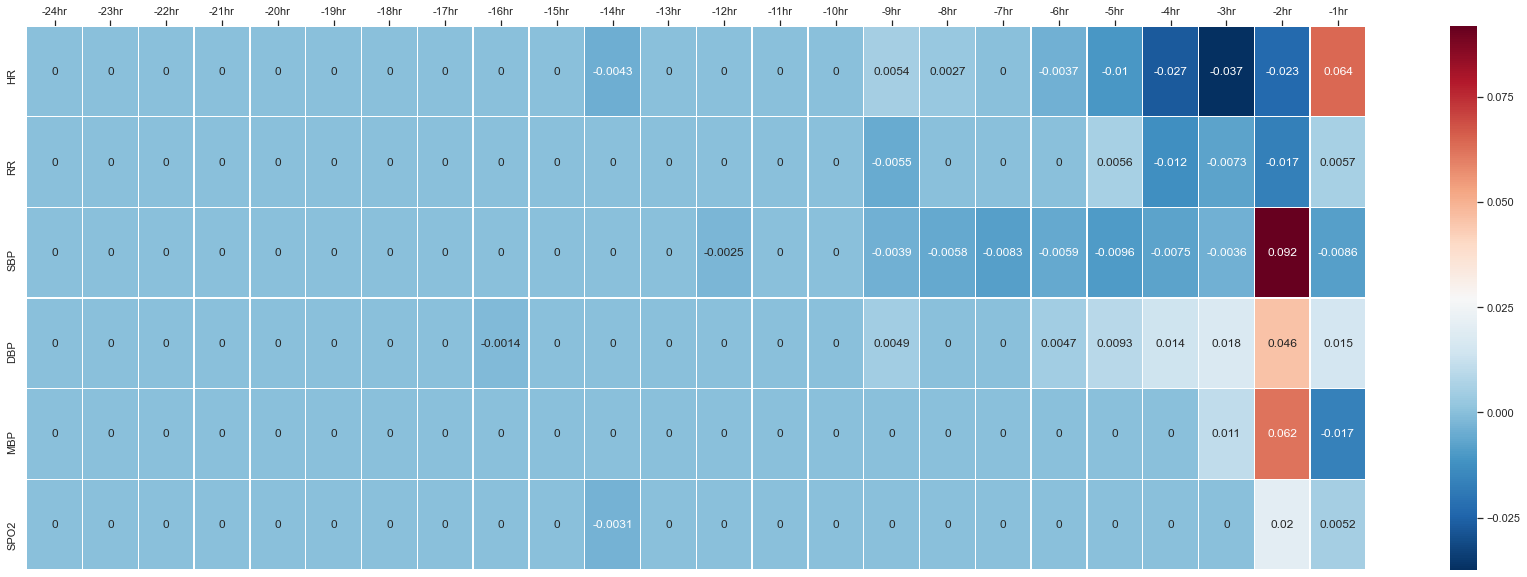

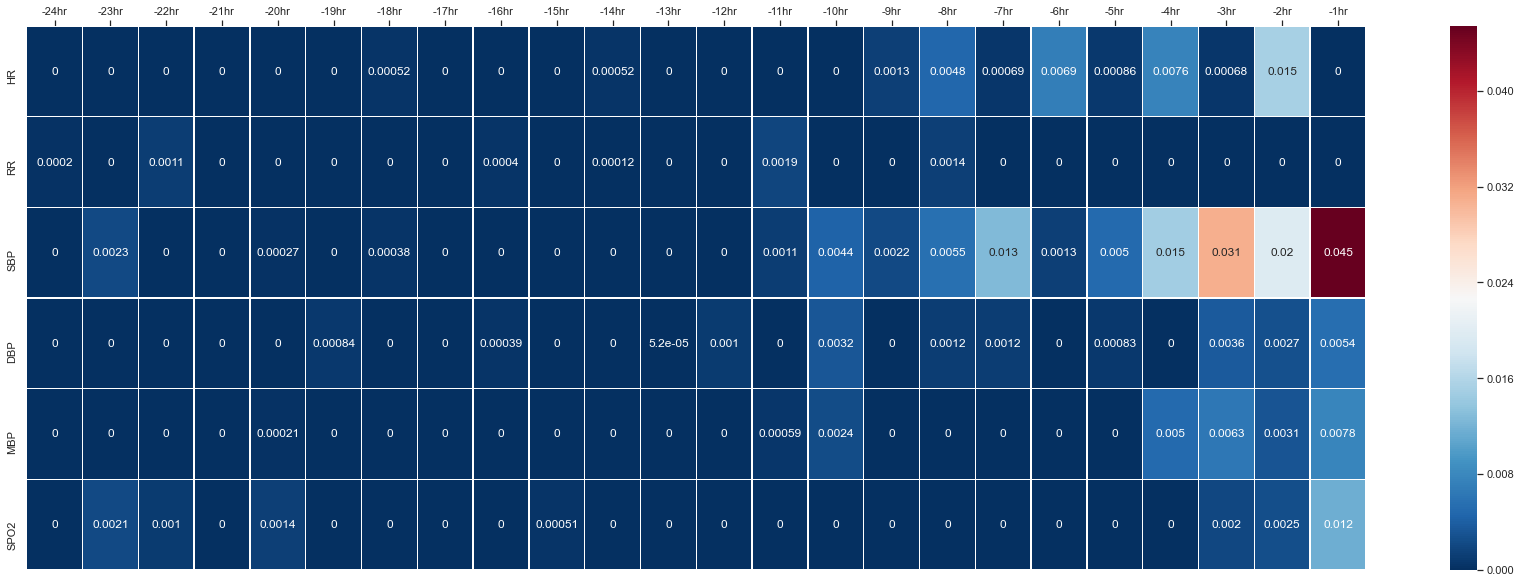

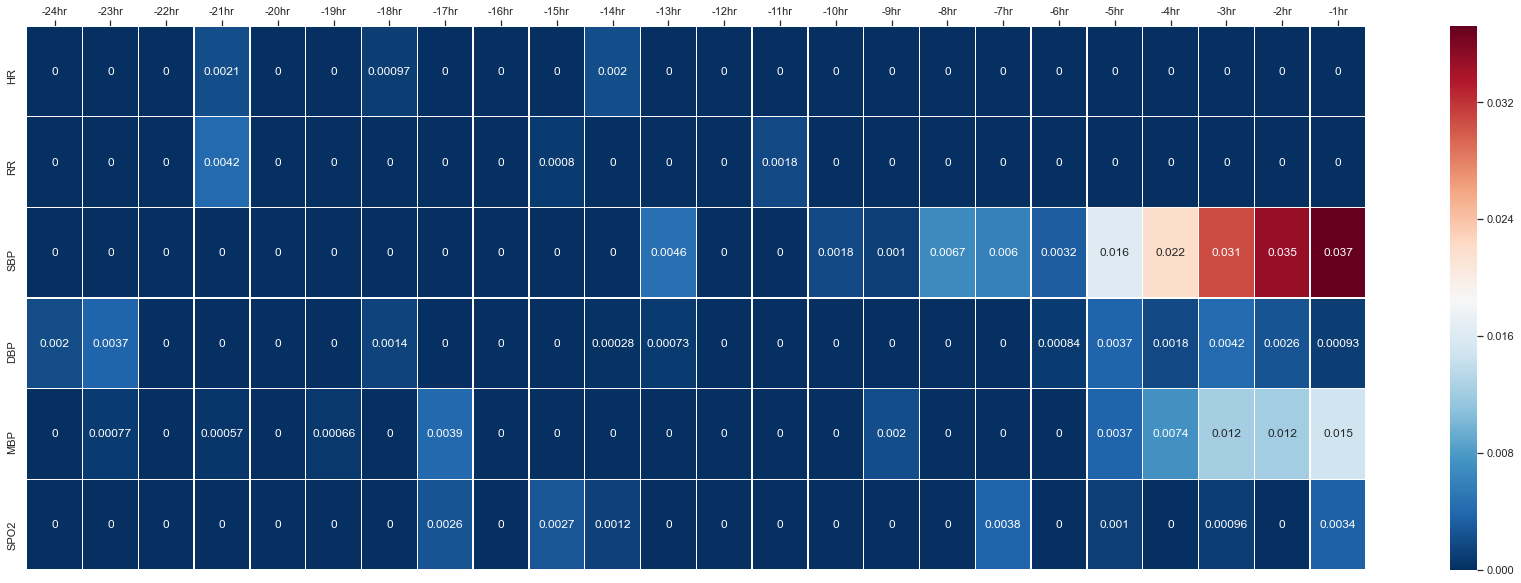

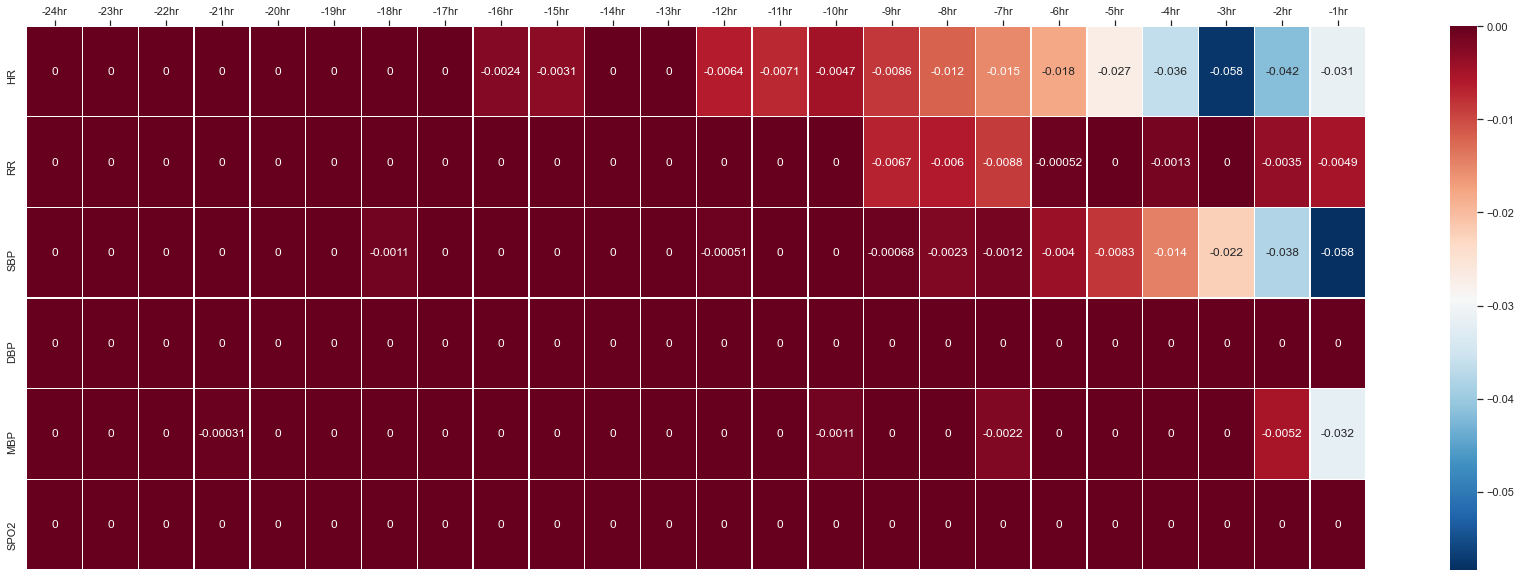

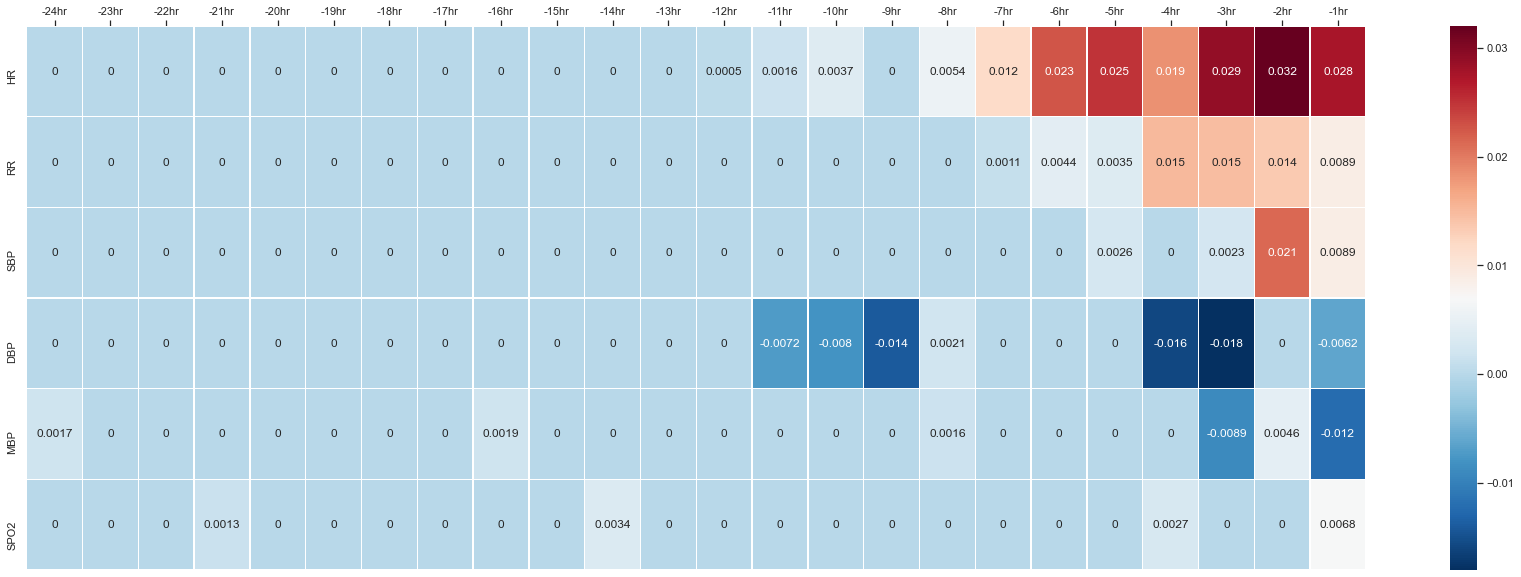

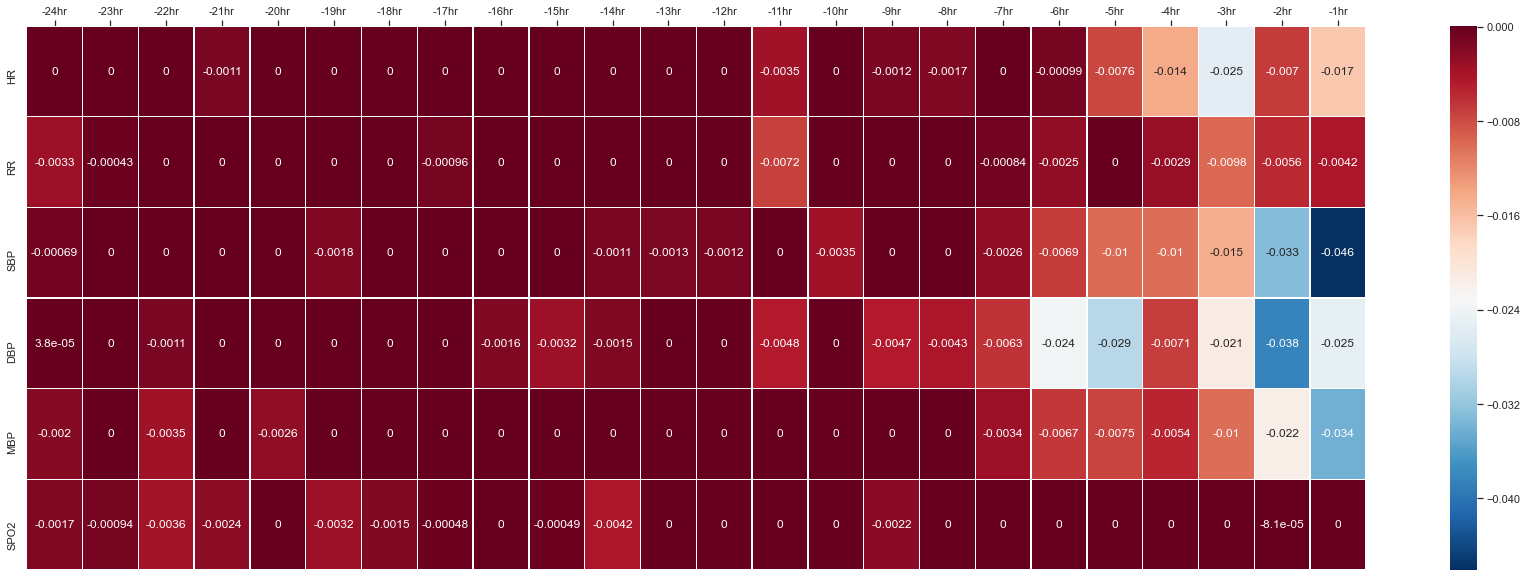

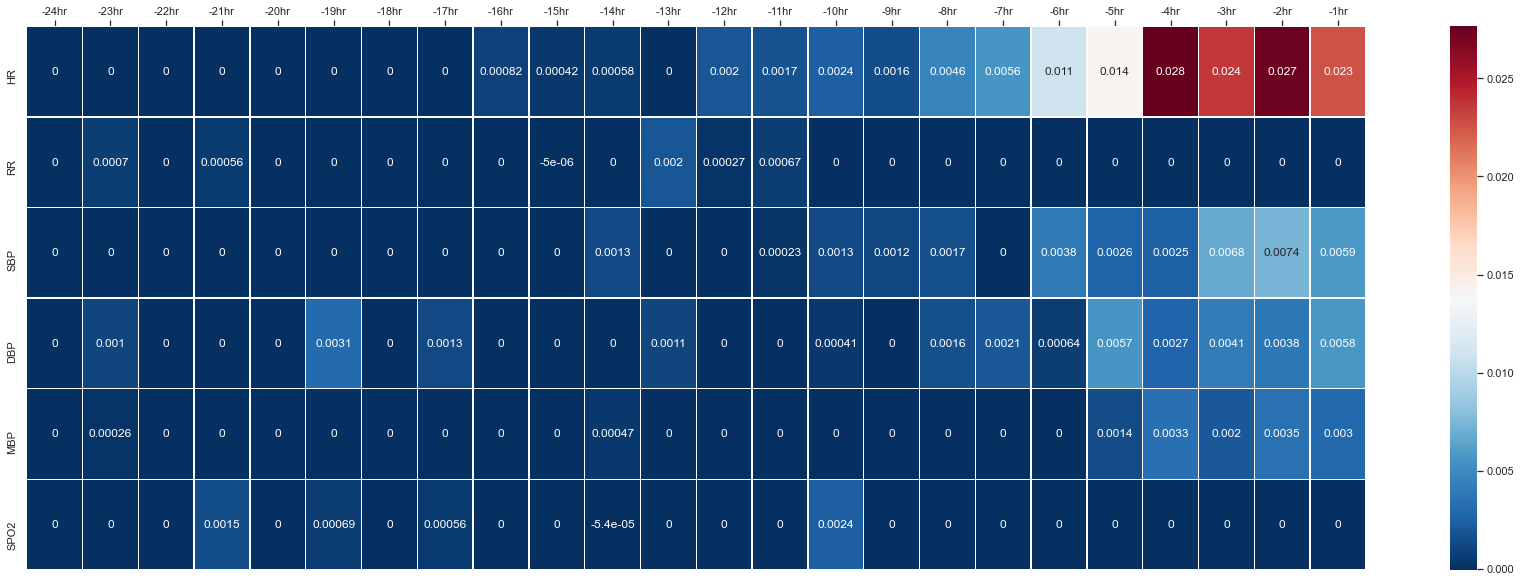

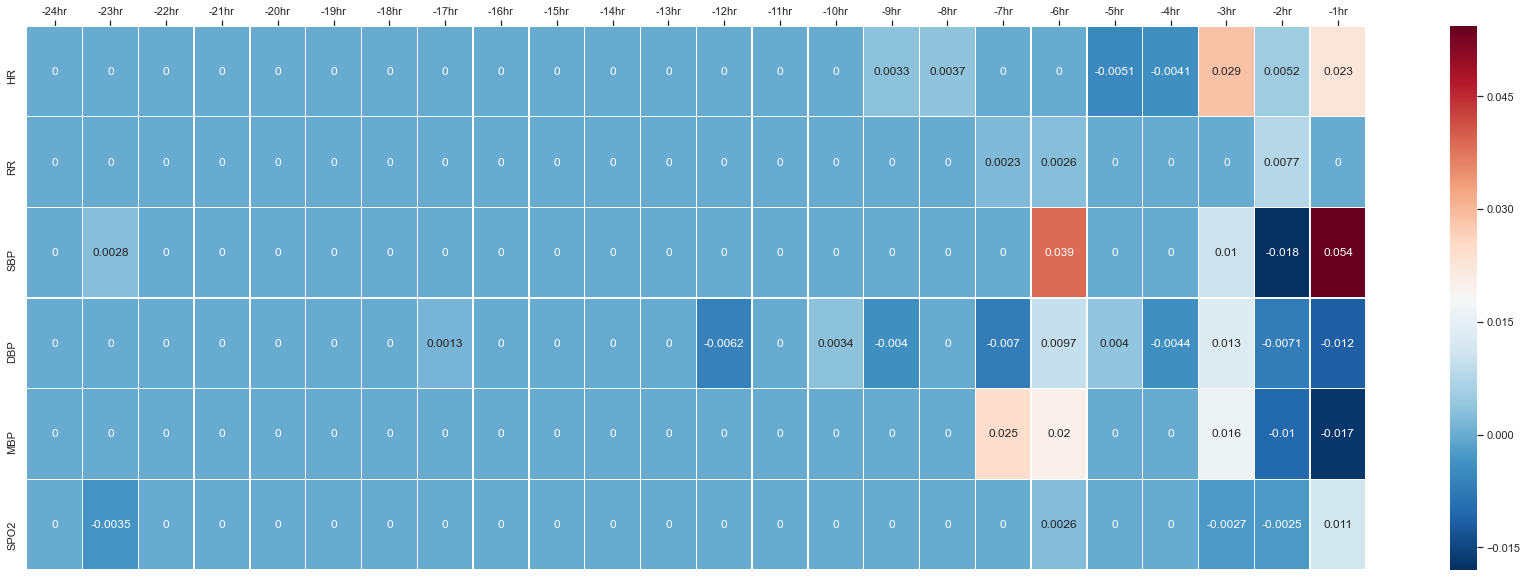

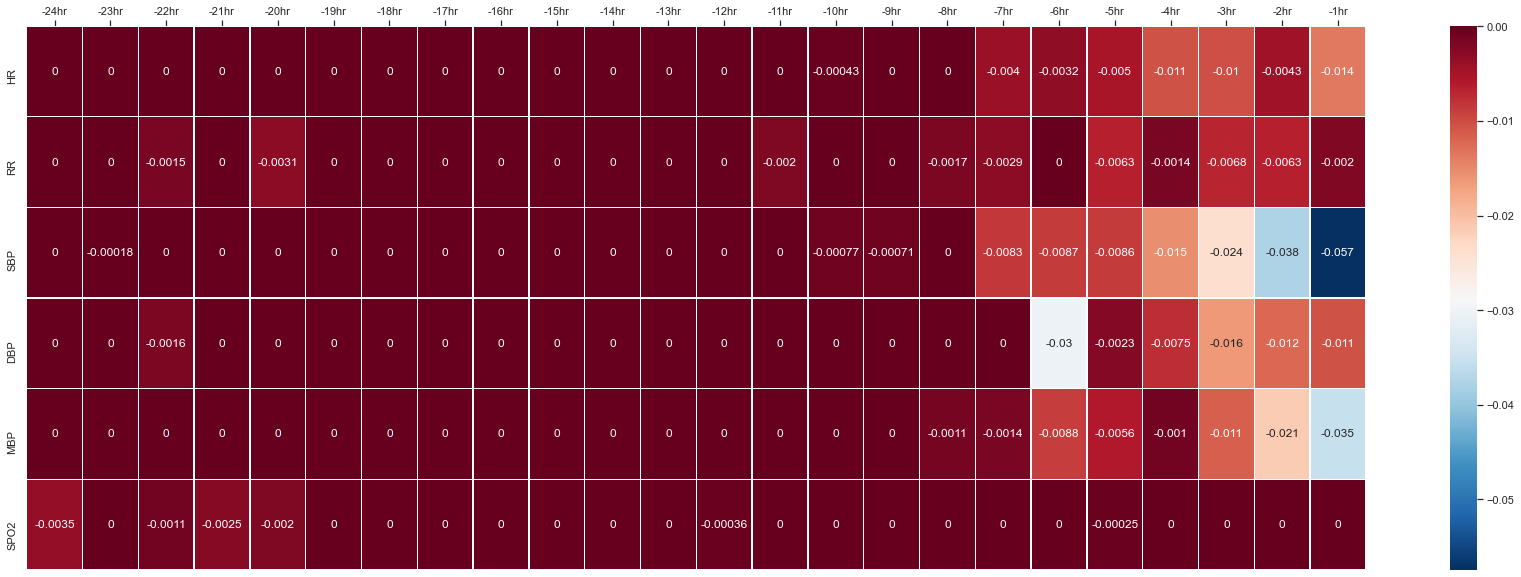

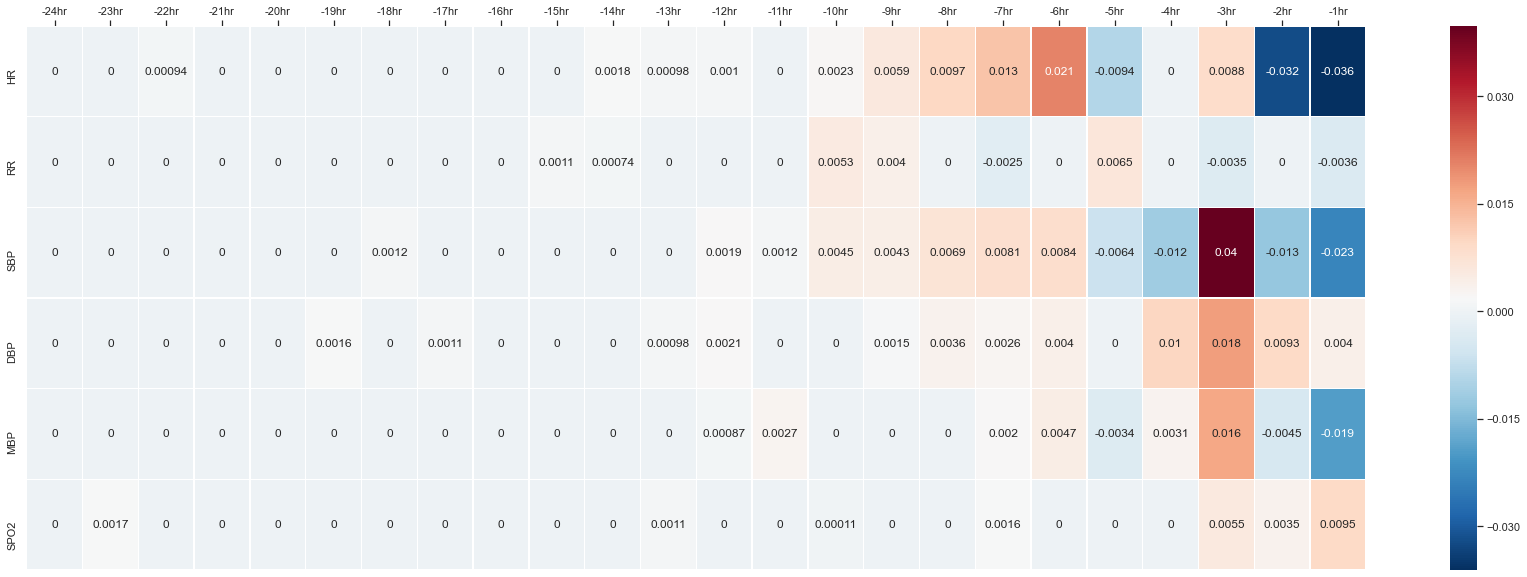

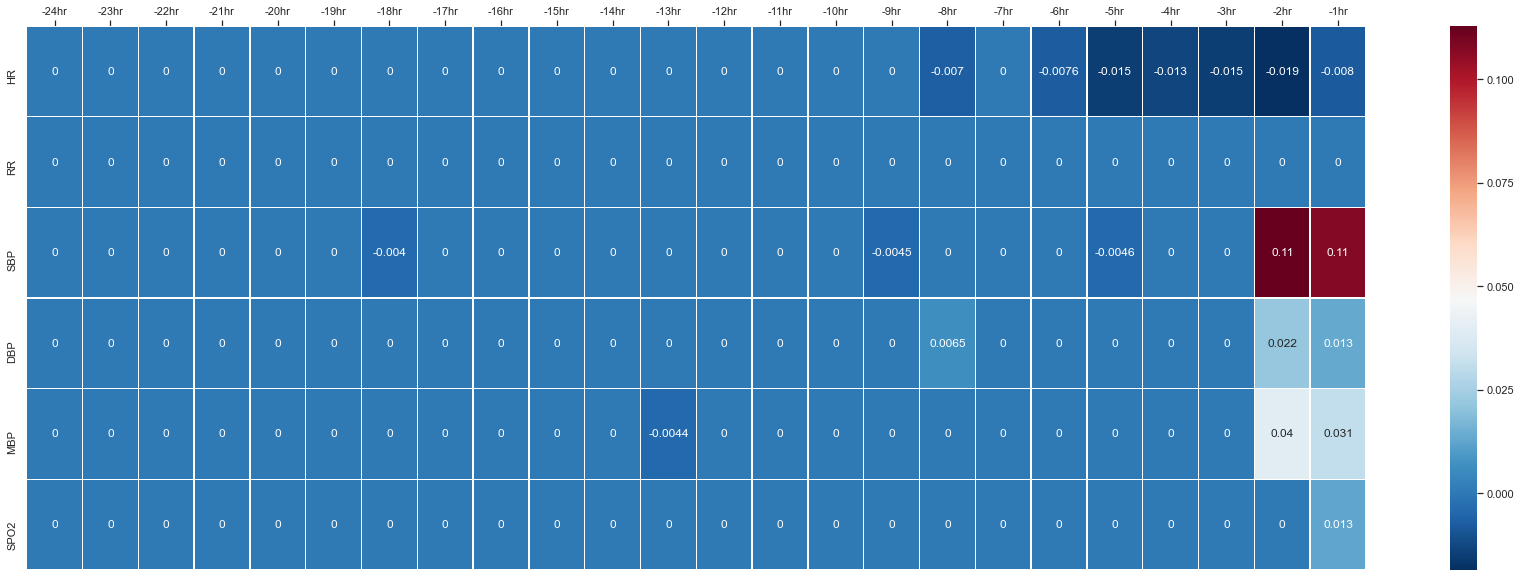

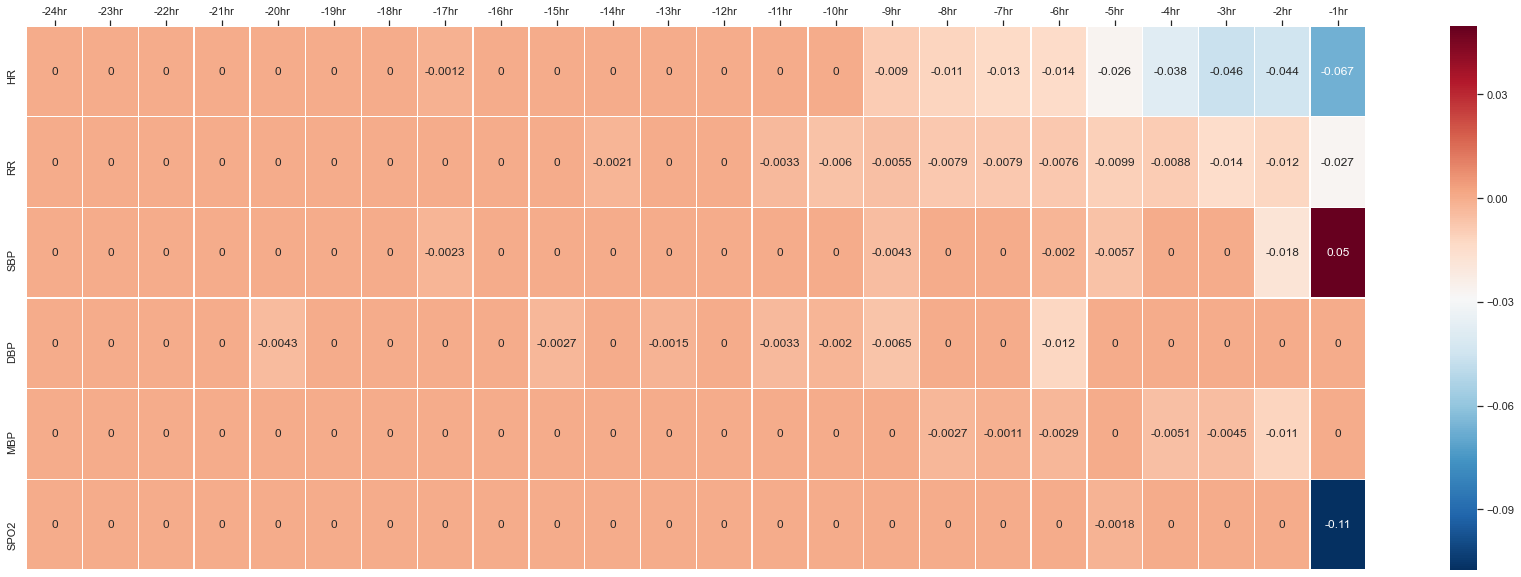

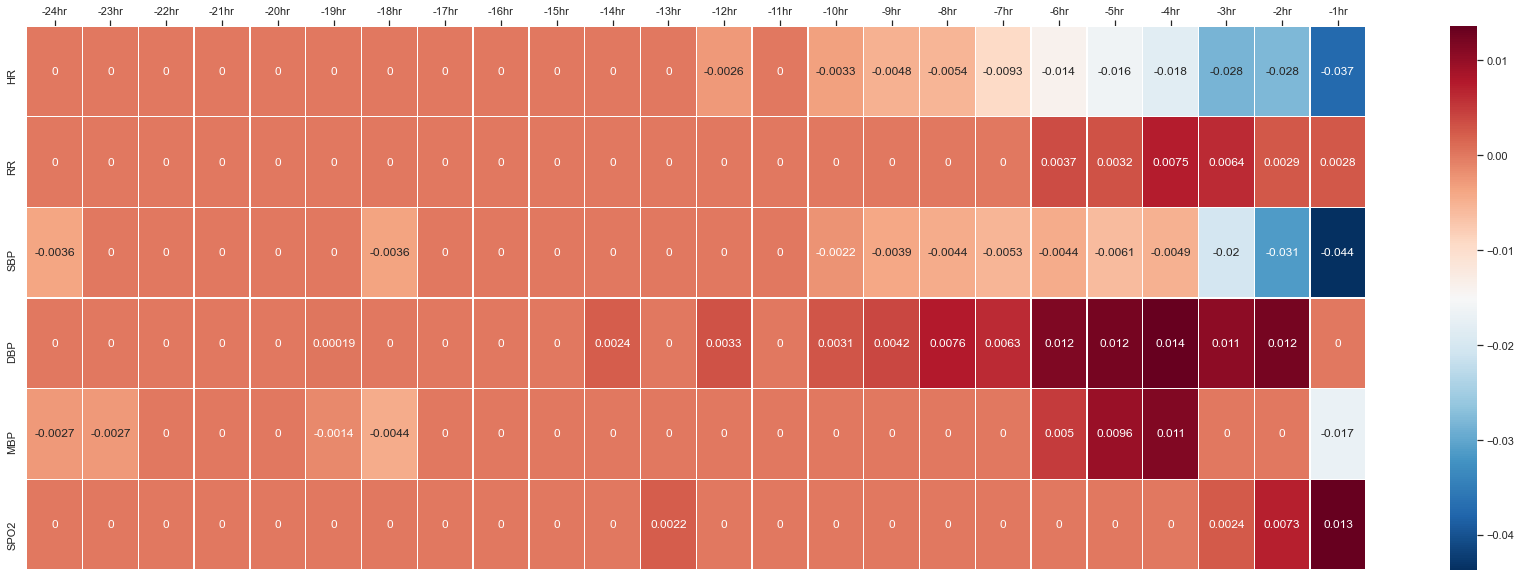

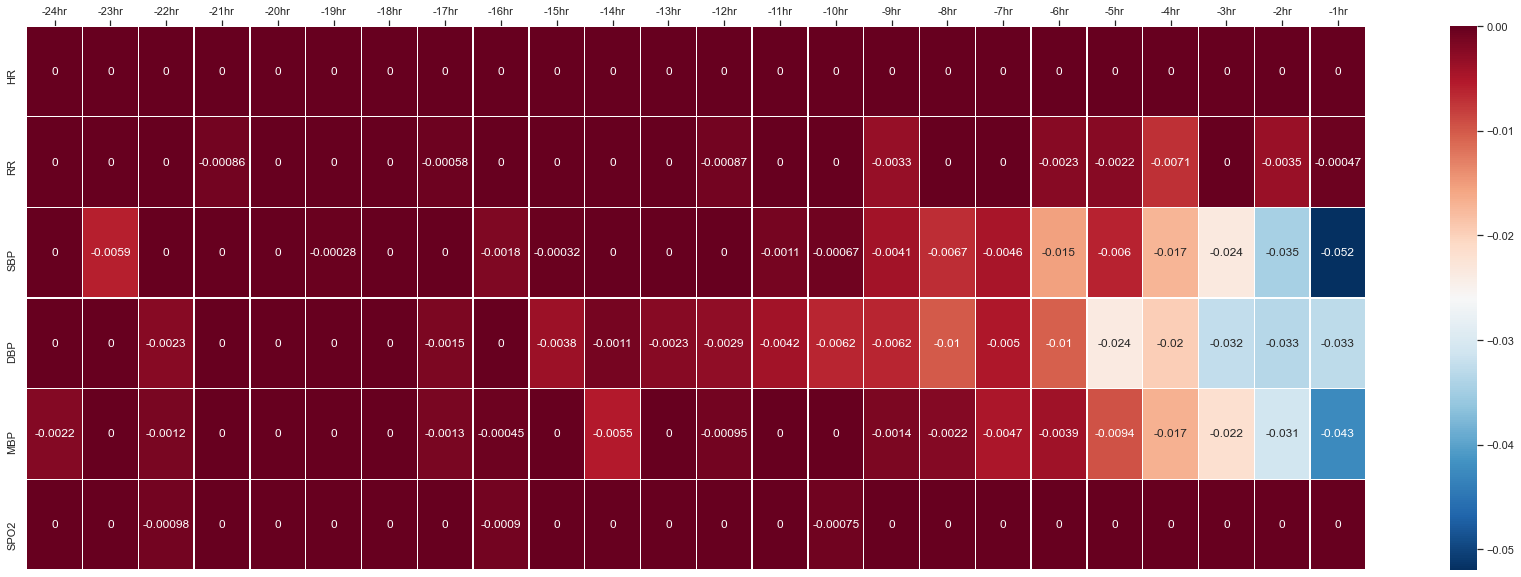

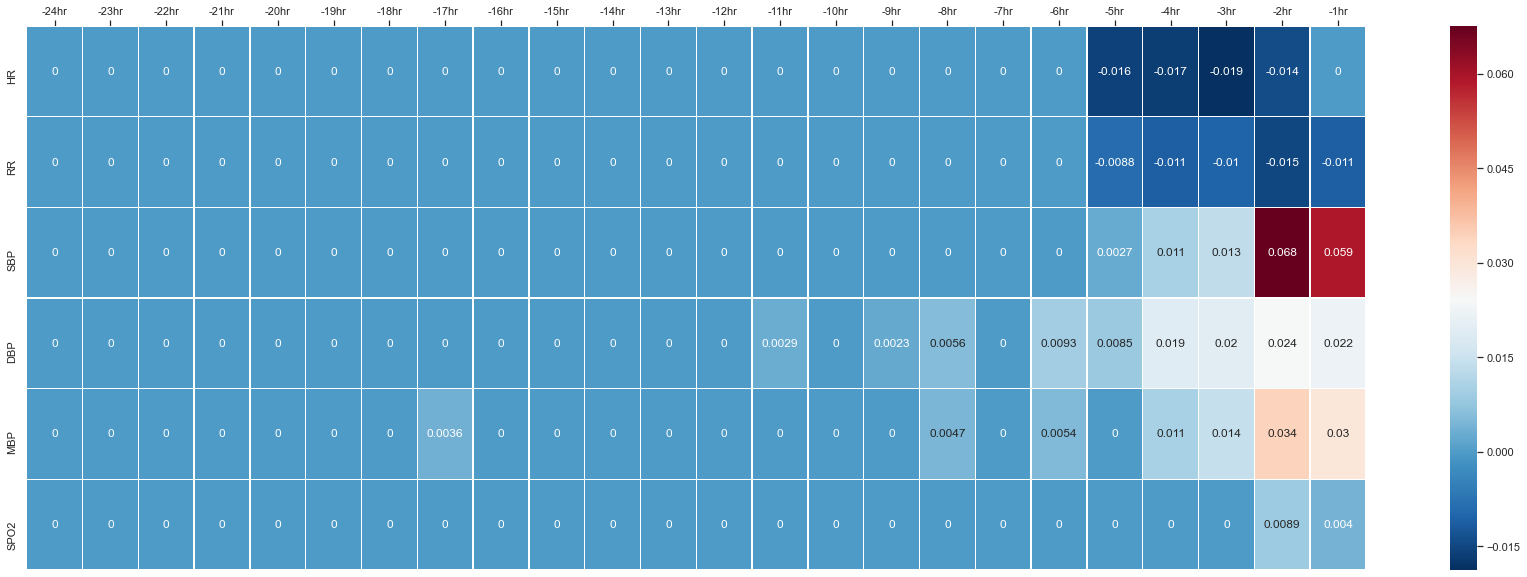

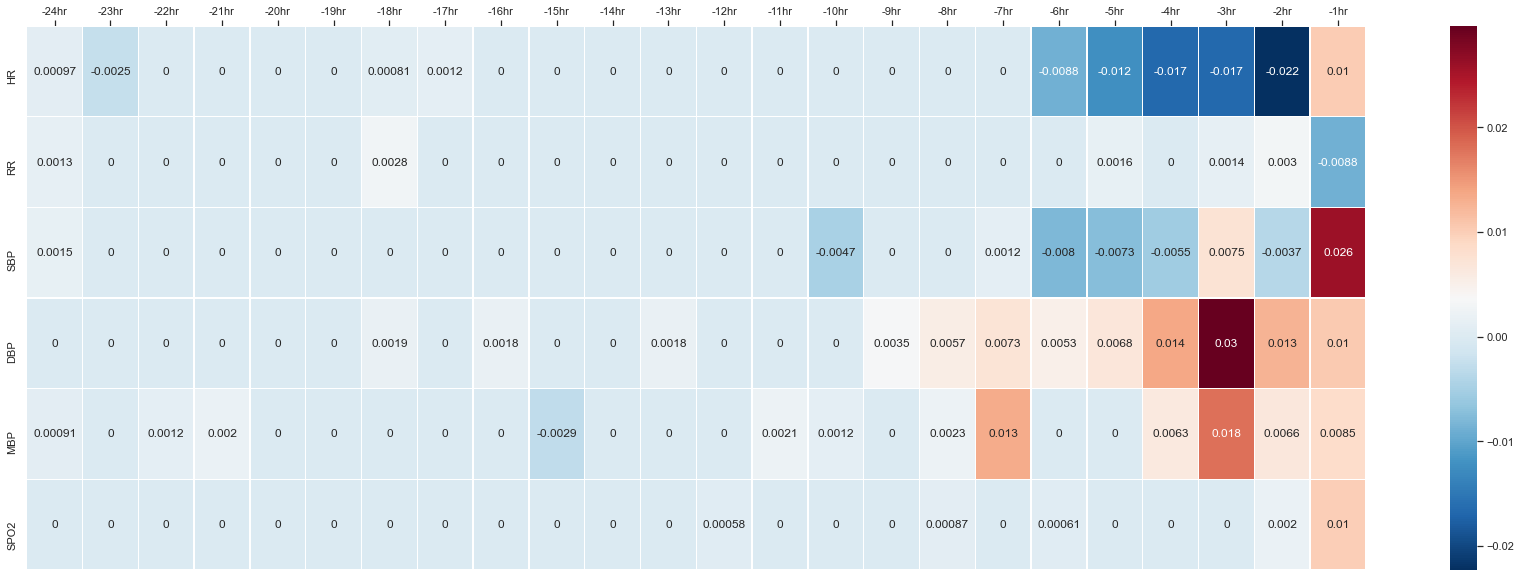

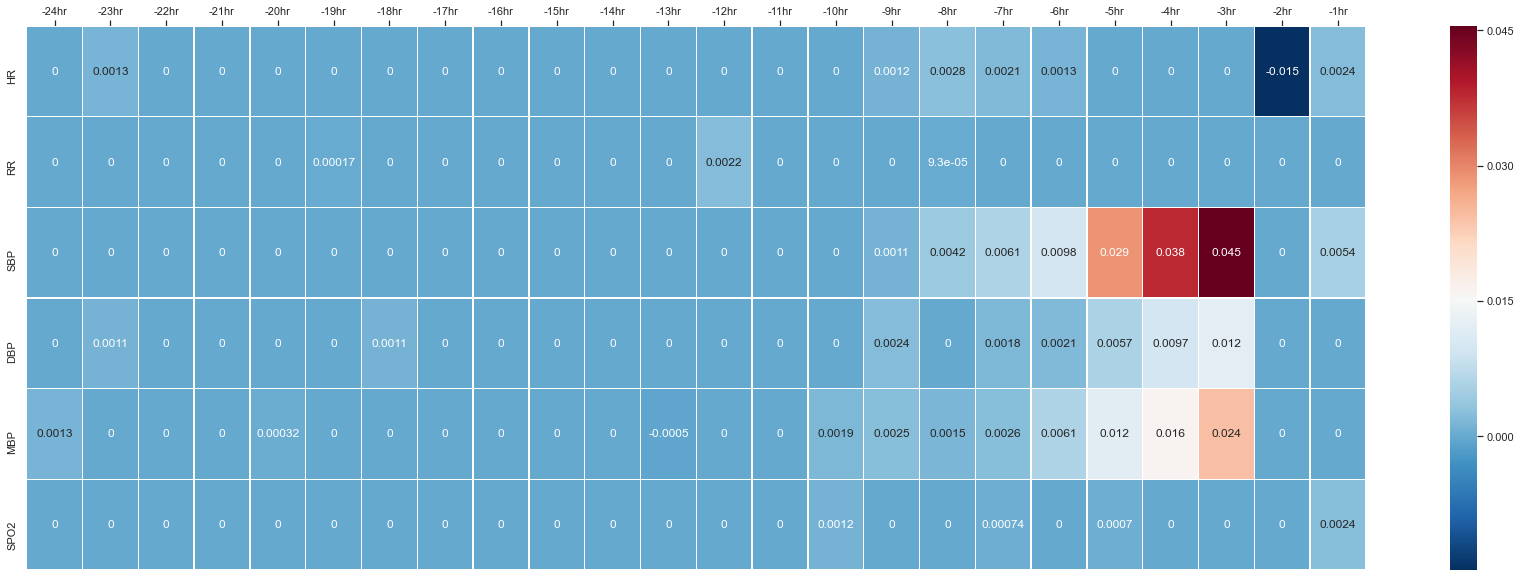

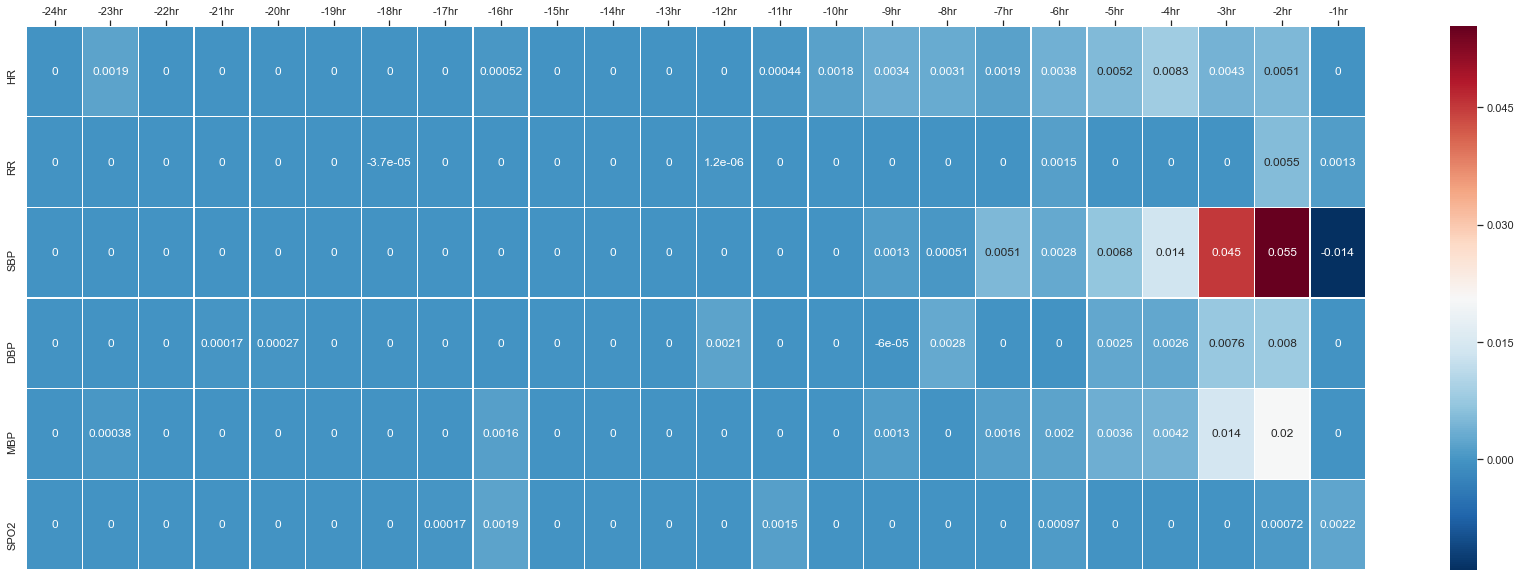

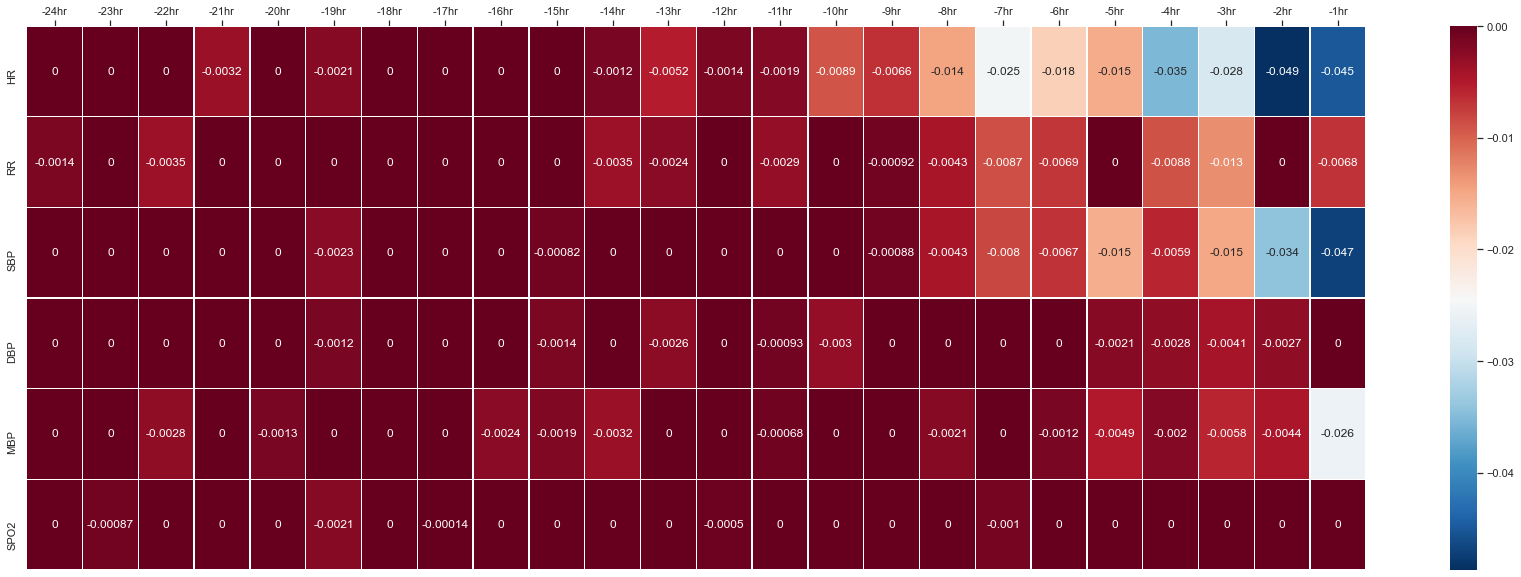

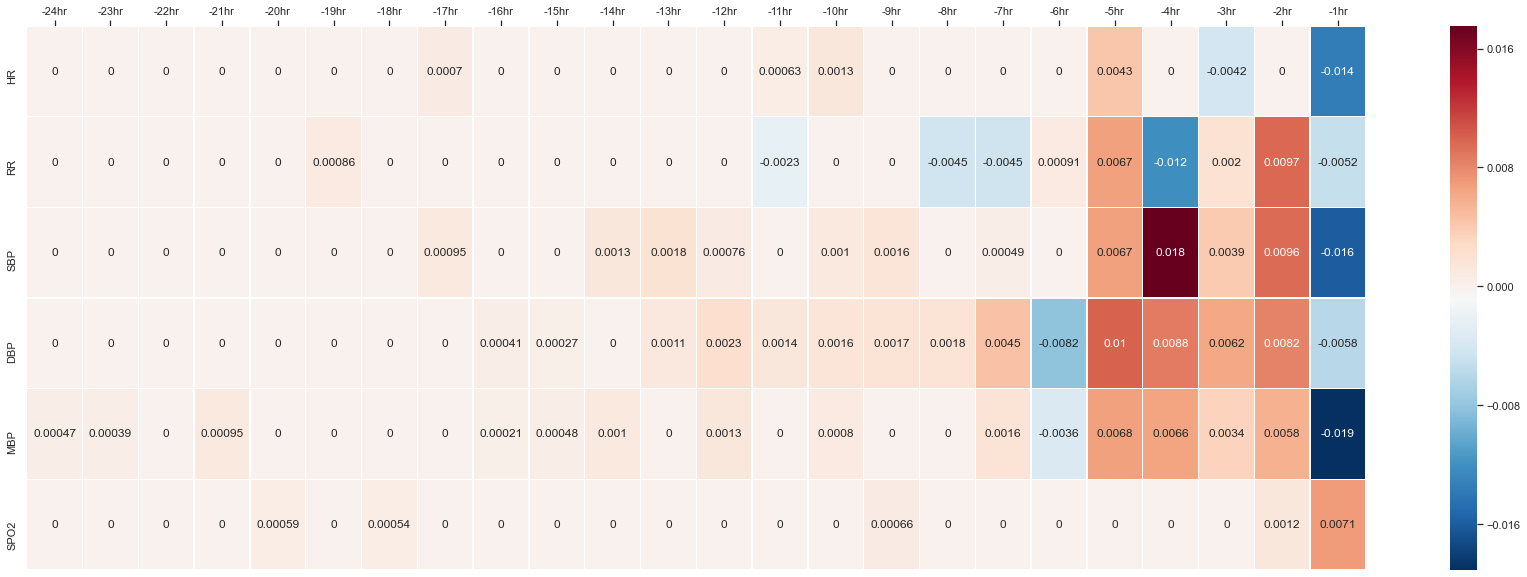

In [5]:
for i in shap_values_mimic_ca_95.index :
    # if i==0:
            test=shap_values_mimic_ca_95.iloc[i:i+1,:]            
        #    print(test.iloc[:1,:])
            trans=np.array(test)
            trans=trans.reshape(24,6)
       #     print(trans)
       #     print(trans.shape)
            trans_transposed=trans.transpose()
       #     print(trans_transposed)
       #     print(trans_transposed.shape)
            
           # x_axis_labels = ['1hr','2hr','3hr','4hr','5hr','6hr','7hr','8hr','9hr','10hr','11hr','12hr',
           #      '13hr','14hr','15hr','16hr','17hr','18hr','19hr','20hr','21hr','22hr','23hr','24hr'] # labels for x-axis
           # x_axis_labels = ['-24hr','-23hr','-22hr','-21hr','-20hr','-19hr','-18hr','-17hr','-16hr','-15hr','-14hr','-13hr',
           #      '-12hr','-11hr','-10hr','-9hr','-8hr','-7hr','-6hr','-5hr','-4hr','-3hr','-2hr','-1hr'] # labels for x-axis
            x_axis_labels = ['-24hr','-23hr','-22hr','-21hr','-20hr','-19hr','-18hr','-17hr','-16hr','-15hr','-14hr','-13hr',
                 '-12hr','-11hr','-10hr','-9hr','-8hr','-7hr','-6hr','-5hr','-4hr','-3hr','-2hr','-1hr'] # labels for x-axis

            y_axis_labels = ['HR','RR','SBP','DBP','MBP','SPO2'] # labels for x-axis

            #print(data)
            sns.set(rc = {'figure.figsize':(30,10)})
            ax =sns.heatmap(data=trans_transposed,annot=True,linewidths=0.3,cmap="RdBu_r" , yticklabels=y_axis_labels, xticklabels=x_axis_labels)

            ax.xaxis.tick_top() # x axis on top
            ax.xaxis.set_label_position('top')
            plt.show()
            
            ttt=ax.get_figure()
            ttt.savefig('ca_shap/mimic_ca'+str(i))
            
          #  np.savetxt('shap_values_mimic_92_0_test.csv', trans_transposed, delimiter=',')

0      0.000120
1      0.000161
2      0.000098
3      0.000046
4      0.000079
         ...   
139    0.026821
140    0.078171
141    0.029793
142    0.005381
143    0.006343
Length: 144, dtype: float64


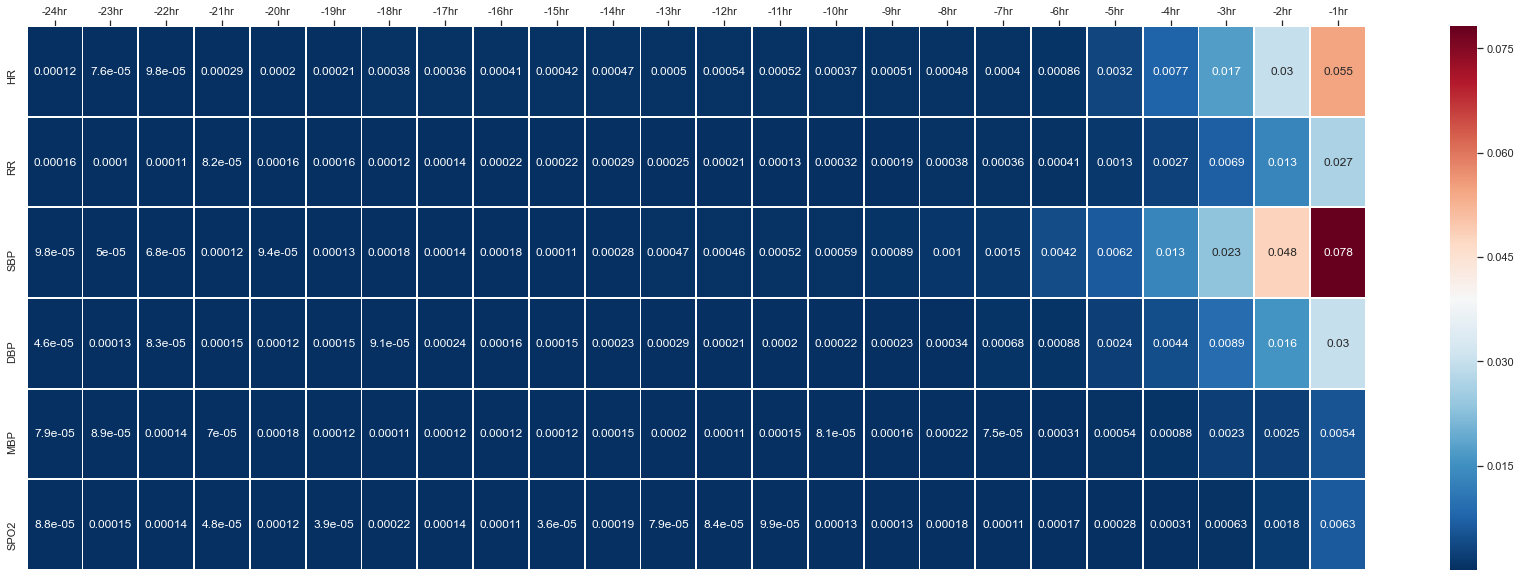

In [9]:
#print(shap_values_mimic_92.shape)
#print(shap_values_mimic_92.mean())

shap_mean=shap_values_mimic_92.abs()

shap_mean=shap_mean.mean()

shap_mean_trans=np.array(shap_mean)

print(shap_mean)

shap_mean_trans=shap_mean_trans.reshape(24,6)
shap_mean_transposed=shap_mean_trans.transpose()


#x_axis_labels = ['1hr','2hr','3hr','4hr','5hr','6hr','7hr','8hr','9hr','10hr','11hr','12hr',
#     '13hr','14hr','15hr','16hr','17hr','18hr','19hr','20hr','21hr','22hr','23hr','24hr'] # labels for x-axis

x_axis_labels = ['-24hr','-23hr','-22hr','-21hr','-20hr','-19hr','-18hr','-17hr','-16hr','-15hr','-14hr','-13hr',
                 '-12hr','-11hr','-10hr','-9hr','-8hr','-7hr','-6hr','-5hr','-4hr','-3hr','-2hr','-1hr'] # labels for x-axis

#x_axis_labels = ['-23hr','-22hr','-21hr','-20hr','-19hr','-18hr','-17hr','-16hr','-15hr','-14hr','-13hr',
#                 '-12hr','-11hr','-10hr','-9hr','-8hr','-7hr','-6hr','-5hr','-4hr','-3hr','-2hr','-1hr','0hr'] # labels for x-axis

y_axis_labels = ['HR','RR','SBP','DBP','MBP','SPO2'] # labels for x-axis

#print(data)
sns.set(rc = {'figure.figsize':(30,10)})
ax =sns.heatmap(data=shap_mean_transposed,annot=True,linewidths=1,cmap="RdBu_r" , yticklabels=y_axis_labels, xticklabels=x_axis_labels)

ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.show()

ttt=ax.get_figure()
ttt.savefig('mimic_mean')

#  np.savetxt('shap_values_mimic_92_0_test.csv', trans_transposed, delimiter=',')



In [7]:
print(shap_values_mimic_92.abs())

    0    1    2         3    4    5         6         7    8         9    ...  \
0   0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  0.0  0.000000  ...   
1   0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  0.0  0.000000  ...   
2   0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  0.0  0.000000  ...   
3   0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  0.0  0.000000  ...   
4   0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  0.0  0.000000  ...   
..  ...  ...  ...       ...  ...  ...       ...       ...  ...       ...  ...   
87  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  0.0  0.000000  ...   
88  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  0.0  0.000000  ...   
89  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000419  0.0  0.000000  ...   
90  0.0  0.0  0.0  0.002516  0.0  0.0  0.000866  0.001327  0.0  0.000595  ...   
91  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  0.0  0.000000  ...   

         134       135     